# Data-Driven Customer Segmentation and Targeting for A2Z Insurance.

#### Abstract

It's 2016.

>A2Z became one of the largest insurers in Portugal. However, the lack of a data driven culture in the company ultimately led to poorly maintained databases over the years.
A2Z is trying to make better use of the database it has regarding its customers. So far, it has simply mass-marketed everything.
All potential and existing customers get the same promotions, and there are no attempts to identify target markets for cross-selling opportunities.
Now, A2Z wants start differentiating customers, and developing more focused programs.

>A2Z provided you an ABT (Analytic Based Table) with data regarding a sample of 10.290 Customers from its active database.
These are customers that had at least one insurance service with the company at the time the dataset was extracted.

<div class="alert alert-block alert-warning">

<b>Objective.</b>
- **Segment the database and find the relevant clusters of customers.**
- **Segment the customers using different perspectives and approaches.**
- **Combine and analyze the results.**
A2Z would like to
- **Understand the value and demographics of each customer segment.**
- **Understand which types of insurance they will be more interested in buying.**

</div>

<div class="alert alert-block alert-warning">

<b>Simplification.</b>
- No further information provided about the meaning of the area codes
- Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
- Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
- Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current year, paid in previous one(s).

</div>



#### Dataset Metadata

| Variable 		      | Identifier    | Description                             | Additional Information |
|---------------------|---------------|-----------------------------------------|------------------------|
| ID 		          | CustID        | Customer Identifier                     |                        |
| First Policy 		  | FirstPolYear  | Year of the customer’s first policy     | (1)                    |
| Birthday            | BirthYear     | Customer’s Birthday Year                | (2)                    |
| Education           | EducDeg       | Academic Degree                         |                        |
| Salary              | MonSal        | Gross monthly salary (€) 		             |                        |
| Area 		          | GeoLivArea    | Living area 		                          | (3)                    |
| Children 		      | Children      | Binary variable (Y=1) 		                |                        |
| CMV 		          | CustMonVal    | Customer Monetary Value 		              | (4)                    |
| Claims 		      | ClaimsRate    | Claims Rate 		                          | (5)                    |
| Motor 		      | PremMotor     | Premiums (€) in LOB: Motor 		           | (6)                    |
| Household 		  | PremHousehold | Premiums (€) in LOB: Household 		       | (6)                    |
| Health 		      | PremHealth    | Premiums (€) in LOB: Health 		          | (6)                    |
| Life 		          | PremLife      | Premiums (€) in LOB: Life 		            | (6)                    |
| Work Compensation   | PremWork      | Premiums (€) in LOB: Work Compensations | (6)                    |

<br>

1. May be considered as the first year as a customer
2. The current year of the database is 2016
3. No further information provided about the meaning of the area codes
4. Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
5. Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
6. Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current
year, paid in previous one(s).

<div class="alert alert-block alert-info">

[1. Exploratory Data Analysis __(EDA)__](#exploratory-data-analysis)
- [1.1 Load datasets](#load-datasets)
- [1.2 Basic Data Exploration](#basic-data-exploration)
    - [Examining the Dataset]()
    - [Statistical Summary]()
    - [Inspect Categorical Values]()
- [1.3 Visual Data Exploration](#visual-data-exploration)
    - [Numeric Variables Frequencies]()
    - [Categorical Variables' Frequencies]()
    - [Data Distribution]()
- [1.4 Incoherence Check](#incoherence-check)
    - [Check for Missing & Duplicate Values]()
    - [Detect Outliers]()
    - [Inconsistent Values]()
    - [Initial Insights]()

[2. Data Pre-Processing](#data-pre-processing)
- [2.1 Data Cleansing](#data-cleansing)
    - [Data Imputation]()
    - [Data Wrangling]()
    - [Fix Inconsistent Values]()
    - [Outliers Removal]()
- [2.2 Feature Engineering](#feature-engineering)
    - [DataType Transformation]()
    - [Feature Extraction]()
    - [Feature Scaling]()
    - [Data Partitioning]()

[3. Dimensionality Reduction](#dimensionality-reduction)
- [3.1 Feature Selection]()
    - [Spearman Correlation]()
    - [Pearson Correlation]()
- [3.2 Manifold learning](#manifold-learning)
    - [Principal Component Analysis (PCA)]()

[4. Clustering](#clustering)
- [4.1 Agglomerative Clustering](#agglomerative-clustering)
    - [Agglomerative Hyperparameter Tuning]()
    - [Agglomerative Modeling]()
    - [Agglomerative Evaluation]()
- [4.2 K-Means Clustering](#K-Means-clustering)
    - [K-means Hyperparameter Tuning]()
    - [K-Means Modeling]()
    - [K-Means Evaluation]()
- [4.3 DBScan Clustering](#dbscan-clustering)
    - [DBScan Hyperparameter Tuning]()
    - [DBScan Modeling]()
    - [DBScan Evaluation]()
</div>

__Import required libraries__

In [1286]:
#libraries imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import sklearn.metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.stats as stats
from sklearn.decomposition import PCA
#from pandas_profiling import ProfileReport
import os
import sys

%reload_ext autoreload
%autoreload 2
module_path = os.path.abspath(os.path.join('..')) # or the path to your source code
sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")
from src.utils.helpers import *

__Load Config files__

In [1079]:
# Load the config file
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
figures_path = config['assets']['figures_path']
images_path = config['assets']['images_path']
current_year = 2016

helper = Helper()

<a class="anchor" id="exploratory-data-analysis">

## 1. Exploratory Data Analysis __(EDA)__

>Exploratory Data Analysis __(EDA)__, Process of examining and understanding the structure of a dataset. It's a critical part of any machine learning project, and helps to approach data and get comfortable with all sorts of its characteristics.
</a>

<a class="anchor" id="load-dataset">

### 1.1 Load Dataset
</a>

In [1080]:
# load train data sets
df = load_data(config['data']['train_path'])
original_df = df.copy()
original_features = original_df.columns.tolist()

In [1081]:
# Indexing
df['CustID'] = df.CustID.astype(int)
df.set_index('CustID', inplace=True)

<a class="anchor" id="basic-data-exploration">

### 1.2 Basic Data Exploration
</a>

>Understand the content and the distribution of the datasets we are using and data types of the variables of it and if there are any missing values.

- __Examining the DataSet__

__`head()`__ check first five rows of our dataset.
__`info()`__ check data types of the variables of our dataset and if there are any missing values.


In [1082]:
df.head(5)

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
CustID                                                                      
1             1985.0     1982.0  b'2 - High School'    2177.0         1.0   
2             1981.0     1995.0  b'2 - High School'     677.0         4.0   
3             1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
4             1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
5             1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   

        Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                               
1            1.0      380.97        0.39     375.85          79.45   
2            1.0     -131.13        1.12      77.46         416.20   
3            0.0      504.67        0.28     206.15         224.50   
4            1.0      -16.99        0.99     182.48          43.35   
5            1.0       35.23        0.90     338.62          47.80   

        PremHealth  PremLife  PremWork  
CustID                                  
1           146.36     47.01     16.89  
2           116.69    194.48    106.13  
3           124.58     86.35     99.02  
4           311.17     35.34     28.34  
5           182.59     18.78     41.45

In [1083]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 1 to 10296
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10279 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


- __Statistical Summary__

__`describe()`__ method give us a birds-eye view of our data. Get the main descriptive statistics for all the variables.

In [1084]:
df.describe(include="all").T

count unique             top  freq         mean          std  \
FirstPolYear   10266.0    NaN             NaN   NaN  1991.062634   511.267913   
BirthYear      10279.0    NaN             NaN   NaN  1968.007783    19.709476   
EducDeg          10279      4  b'3 - BSc/MSc'  4799          NaN          NaN   
MonthSal       10260.0    NaN             NaN   NaN  2506.667057  1157.449634   
GeoLivArea     10295.0    NaN             NaN   NaN     2.709859     1.266291   
Children       10275.0    NaN             NaN   NaN     0.706764     0.455268   
CustMonVal     10296.0    NaN             NaN   NaN   177.892605  1945.811505   
ClaimsRate     10296.0    NaN             NaN   NaN     0.742772     2.916964   
PremMotor      10262.0    NaN             NaN   NaN   300.470252   211.914997   
PremHousehold  10296.0    NaN             NaN   NaN   210.431192   352.595984   
PremHealth     10253.0    NaN             NaN   NaN   171.580833   296.405976   
PremLife       10192.0    NaN             NaN   NaN    41.855782    47.480632   
PremWork       10210.0    NaN             NaN   NaN    41.277514    51.513572   

                     min     25%     50%       75%       max  
FirstPolYear      1974.0  1980.0  1986.0    1992.0   53784.0  
BirthYear         1028.0  1953.0  1968.0    1983.0    2001.0  
EducDeg              NaN     NaN     NaN       NaN       NaN  
MonthSal           333.0  1706.0  2501.5   3290.25   55215.0  
GeoLivArea           1.0     1.0     3.0       4.0       4.0  
Children             0.0     0.0     1.0       1.0       1.0  
CustMonVal    -165680.42   -9.44  186.87  399.7775  11875.89  
ClaimsRate           0.0    0.39    0.72      0.98     256.2  
PremMotor          -4.11  190.59  298.61     408.3  11604.42  
PremHousehold      -75.0   49.45   132.8    290.05   25048.8  
PremHealth         -2.11   111.8  162.81    219.82   28272.0  
PremLife            -7.0    9.89   25.56     57.79     398.3  
PremWork           -12.0   10.67   25.67     56.79    1988.7

- __Inspect Categorical Values__

__`describe(include =['O'] `__ method give us the descriptive statistics for categorical data.

In [1085]:
df.describe(include=['O']).T

count unique             top  freq
EducDeg  10279      4  b'3 - BSc/MSc'  4799

<div class="alert alert-block alert-warning">

<b>Insights</b>

After the initially analyzing for the columns, we can conclude that:

- Missing values: Output shows that some columns have fewer non-null values than the total number of rows in the DataFrame. This suggests that there are missing values in some columns. We will need to decide how to handle missing values before performing any statistical analysis on the data.
- Data types: Output indicates that 11 columns having a data type of float64 (numerical data) and 1 column having a data type of object (categorical data). will need to ensure that you are using the appropriate techniques and tools for the data types of each column.
- `Children` A binary variable that can be treated as categorical as it represent two distinct categories or classes (e.g., "has children" and "does not have children").
- `GeoLivArea` Can be treated as categorical variable as well as it represent distinct categories or classes (e.g., 1, 2, 3, 4).
- Data distributions:  To understand the distribution of values in each column, We would need to visualize the data using histograms or other appropriate plots. These plots can give us a better understanding of the shape of the distribution and identify any outliers or anomalies in the data.

</div>

<a class="anchor" id="visual-data-exploration">

### 1.3 Visual Data Exploration
</a>

Visual data exploration is a process of using visualizations to gain insights into the characteristics and patterns of a dataset.

In [1086]:
# Define metric and non-metric features.
metric_features = ['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']
non_metric_features = ['GeoLivArea', 'Children', 'EducDeg']

- __Numeric Variables' Frequencies__

Let's start by looking at __`Numeric Variables' Uni-variate Distribution`__ in the dataset.

__`Box Plots`__
A box plot takes a single variable and displays information regarding how the data is distributed throughout its quartiles, which essentially means dividing the data into quarters.

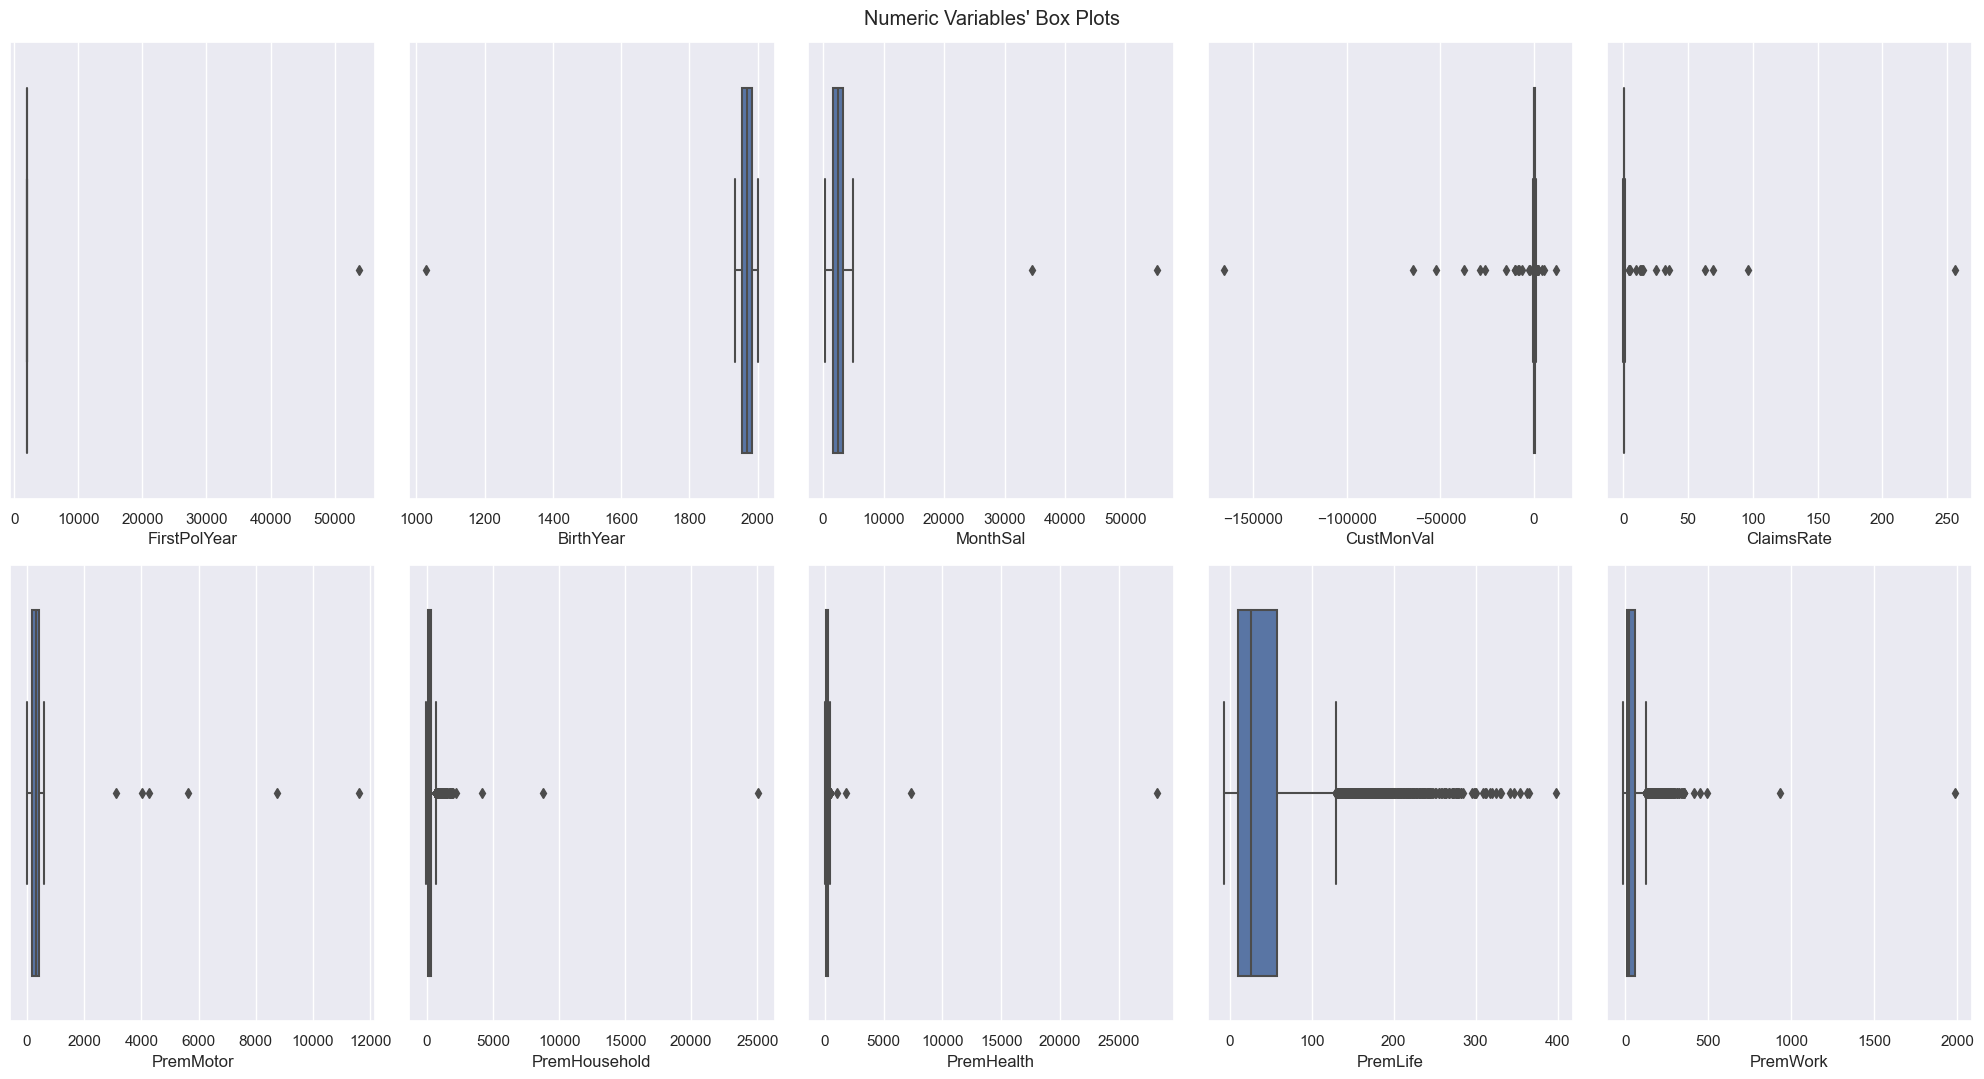

In [1087]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11), tight_layout=True)

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_frequencies_boxplots.png'), dpi=200)
plt.show()

__`Histograms`__
Histograms show the distribution of a single variable in "bins" or groups of data based on the frequency of the occurrence of the value.

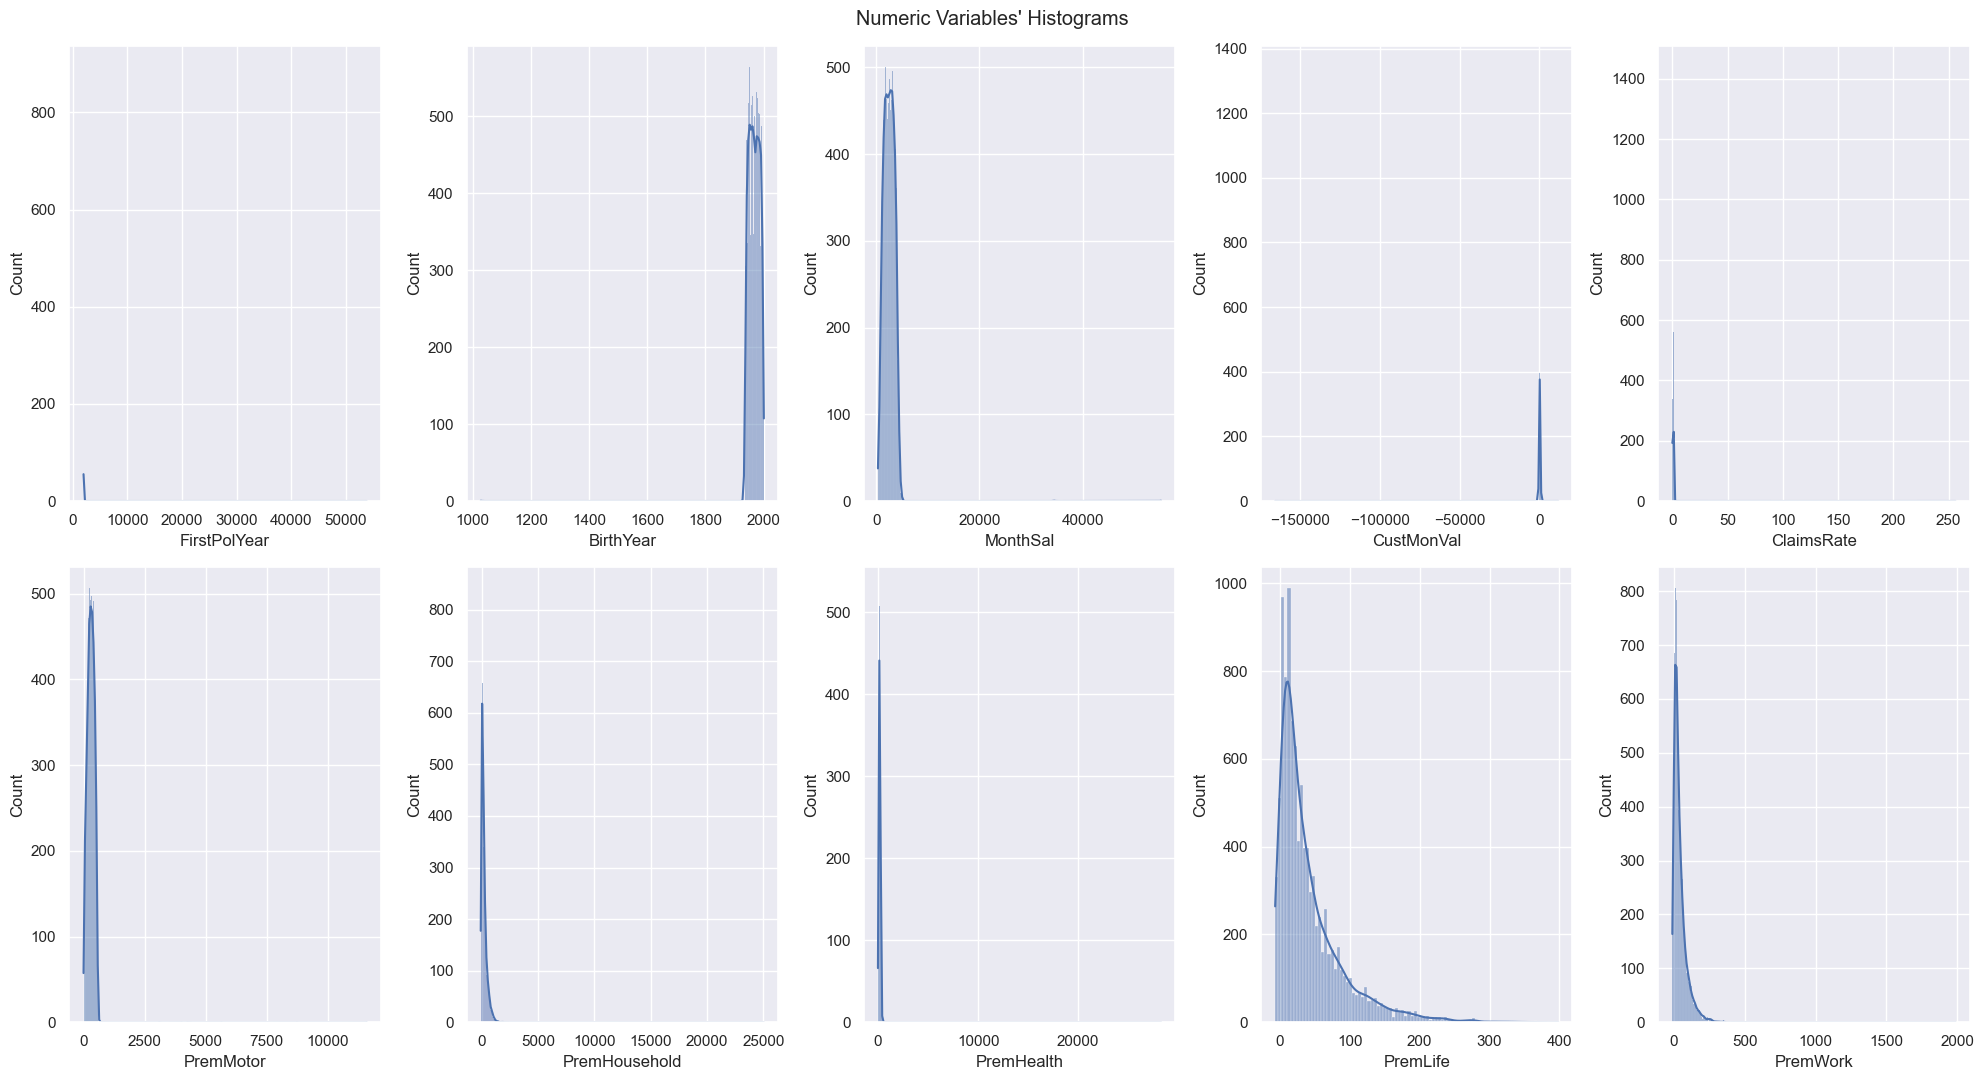

In [1088]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11), tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(x=df[feat], ax=ax, kde=True)
    #ax.hist(df[feat], bins="scott")
    #ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_frequencies_histograms.png'))
plt.show()

- __Categorical Variables' Frequencies__

Let's take a look on __Categorical Variables' Uni-variate Distribution__ in the dataset.

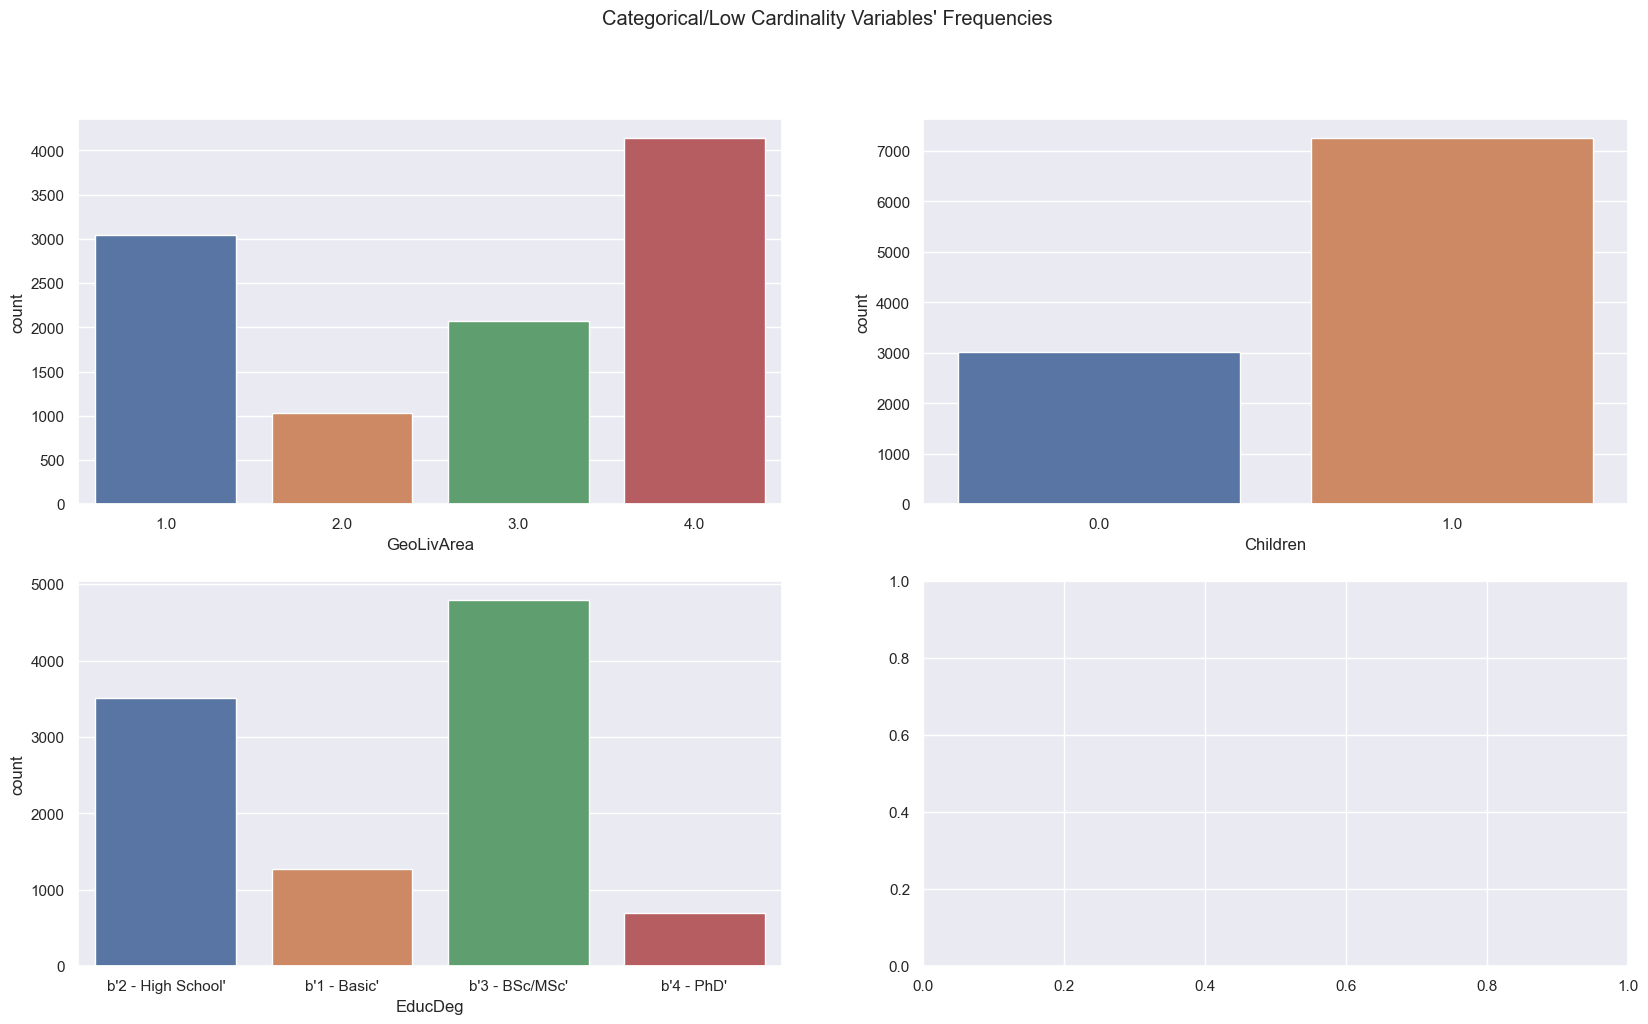

In [1089]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=df[feat].astype(object), ax=ax)

title = "Categorical/Low Cardinality Variables' Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'categorical_variables_frequencies_histograms.png'), dpi=200)
plt.show()

- __Data Distribution__

>Beside `Visual Inspection` above we still can use `Statistical tests` to detect the distribution of our dataset

- Statistical tests: There are various statistical tests that can be used to formally test the hypothesis that a dataset follows a certain distribution.
- Shapiro-Wilk Test: This test is also used to test for normality, but is more powerful than the D'Agostino's K^2 test and less sensitive than the Anderson-Darling test.

In [1090]:
df.head()

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
CustID                                                                      
1             1985.0     1982.0  b'2 - High School'    2177.0         1.0   
2             1981.0     1995.0  b'2 - High School'     677.0         4.0   
3             1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
4             1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
5             1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   

        Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                               
1            1.0      380.97        0.39     375.85          79.45   
2            1.0     -131.13        1.12      77.46         416.20   
3            0.0      504.67        0.28     206.15         224.50   
4            1.0      -16.99        0.99     182.48          43.35   
5            1.0       35.23        0.90     338.62          47.80   

        PremHealth  PremLife  PremWork  
CustID                                  
1           146.36     47.01     16.89  
2           116.69    194.48    106.13  
3           124.58     86.35     99.02  
4           311.17     35.34     28.34  
5           182.59     18.78     41.45

In [1091]:
# Use the Shapiro-Wilk test to check if the data is normally distributed
shapiro_results = stats.shapiro(df[metric_features])

# Print the test statistic and p-value
print("Test Statistic:", shapiro_results[0])
print("p-value:", shapiro_results[1])

# If the p-value is less than 0.05, we can reject the null hypothesis
# that the data is normally distributed and conclude that it is not
if shapiro_results[1] < 0.05:
    print("Data is not normally distributed")
else:
    print("Data is normally distributed")

Test Statistic: nan
p-value: 1.0
Data is normally distributed


<div class="alert alert-block alert-warning">

<b>Insights</b>
- uni-variate normal (Gaussian distribution)
- potential uni-variate outliers
</div>

<a class="anchor" id="incoherence-check">

### 1.4 Incoherence Check
</a>

>Process of identifying and resolving inconsistencies or discrepancies in data, information, or arguments.
It can occur when there is a lack of consistency or agreement in the data, such as errors, discrepancies, or contradictions in data values or data types.

- Missing Values
- Duplicates
- Outliers
- Find inconsistent values
- Any other problem you may find in your dataset

- __Check for Missing & Duplicate Values__

__`isnull`__ & __`isna`__ methods detects nullable and missing values.
__`duplicated`__ method returns boolean Series denoting duplicate rows

In [1092]:
# check for nan/null
df.isnull().values.any()

True

In [1093]:
# count of missing values
df.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [1094]:
# duplicated observations
df.duplicated().sum()

3

- __Detect Outliers__

>The most common methods for detecting outliers in a normal distribution:

- [__empirical rule / 68-95-99.7 rule__](https://en.wikipedia.org/wiki/68–95–99.7_rule) 99.7% of all data in a normal distribution lies within three standard deviations of the mean so any value lie outside +/- 3 standard deviations consider as outlier.

- [__IQR Rule__](https://en.wikipedia.org/wiki/Interquartile_range) For Any value that is 1.5 x IQR greater than the third quartile is designated as an outlier and any value that is 1.5 x IQR less than the first quartile is also designated as an outlier.+/- 3 standard deviations in our dataset.

- [__Z-Score__](https://en.wikipedia.org/wiki/Standard_score) Measure of how many standard deviations a data point is from the mean of a distribution. A z-score of 3 or more is generally considered an outlier. To use the z-score to identify outliers in a dataset, you can calculate the z-score for each data point and then use a threshold (such as 3) to determine which points are outliers.

In [1095]:
summary, outliers_zscore_df = detect_outliers(data=df, metrics=metric_features, method = 'z_score')
summary

{'CustMonVal': {'threshold': 3, 'count': 13},
 'ClaimsRate': {'threshold': 3, 'count': 12},
 'PremHousehold': {'threshold': 3, 'count': 36}}

In [1096]:
print('Percentage of data kept after removing Z-Score outliers will be: {} %'.format(np.round((df.shape[0] - outliers_zscore_df.shape[0]) / df.shape[0], 4) * 100))

Percentage of data kept after removing Z-Score outliers will be: 99.52 %


In [1097]:
summary, outliers_iqr_df = detect_outliers(data=df, metrics=metric_features, method='iqr')
summary

{'FirstPolYear': {'lower': 1962.0, 'upper': 2010.0, 'count': 1},
 'BirthYear': {'lower': 1908.0, 'upper': 2028.0, 'count': 1},
 'MonthSal': {'lower': -670.38, 'upper': 5666.62, 'count': 2},
 'CustMonVal': {'lower': -623.27, 'upper': 1013.6, 'count': 110},
 'ClaimsRate': {'lower': -0.5, 'upper': 1.86, 'count': 15},
 'PremMotor': {'lower': -135.98, 'upper': 734.86, 'count': 6},
 'PremHousehold': {'lower': -311.45, 'upper': 650.95, 'count': 633},
 'PremHealth': {'lower': -50.23, 'upper': 381.85, 'count': 24},
 'PremLife': {'lower': -61.96, 'upper': 129.64, 'count': 625},
 'PremWork': {'lower': -58.51, 'upper': 125.97, 'count': 621}}

In [1098]:
print('Percentage of data kept after removing IQR outliers will be: {} %'.format(np.round((df.shape[0] - outliers_iqr_df.shape[0]) / df.shape[0], 4) * 100))

Percentage of data kept after removing IQR outliers will be: 85.79 %


In [1099]:
outliers_iqr_df.head()

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
CustID                                                                      
2             1981.0     1995.0  b'2 - High School'     677.0         4.0   
14            1983.0     2000.0        b'1 - Basic'    1043.0         3.0   
41            1994.0     1995.0  b'2 - High School'    1177.0         4.0   
45            1985.0     1990.0      b'3 - BSc/MSc'    1065.0         1.0   
52            1982.0     1966.0      b'3 - BSc/MSc'    3234.0         4.0   

        Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                               
2            1.0     -131.13        1.12      77.46         416.20   
14           1.0      -75.12        1.06      44.34         342.85   
41           1.0      121.36        0.84      52.01         455.65   
45           1.0     -128.68        1.19     111.80         -35.00   
52           1.0   -14714.08       25.36     557.44          20.00   

        PremHealth  PremLife  PremWork  
CustID                                  
2           116.69    194.48    106.13  
14          127.69    267.94     94.46  
41          135.47    146.36    148.03  
45          208.26    224.71     44.23  
52           29.56      5.00     -9.00

<div class="alert alert-block alert-warning">

<b>Initial Insights</b>

> Determining whether a value is an outlier that should be removed or not is very subjective. And while there are certainly valid reasons for throwing away outliers if they are the result of a computer glitch or a human error, eliminating every extreme value is not always a good idea.

1. __First Policy__:
    - Apparently, the First Policy Year for a customer cannot be older than the customer or after 2016.
    - 1997 records found where First Policy Year older than Birth Year
        - Correct the values: We can't identify the correct values for that data field it may require some research or consultation with subject-matter experts.
                - It appears that two columns in our dataset were mixed up during data entry, causing incorrect values to be entered in the wrong columns for some rows.
                -  Swapping these columns can help to avoid reducing the reliability and robustness of our analysis if dropped.
        - Ignore the values: Inconsistent values not a small minority of the overall dataset (around 20%) it can have significantly impact on analysis if ignored.
        - Use imputation: Imputation method to estimate the values based on the rest of the data not possible as well.
        - Drop the values: W may need to consider dropping the rows containing the incorrect values from dataset. it is important to carefully consider the potential impact of dropping the values before proceeding.

2. __Birthday__:
    - According to Portuguese laws, the minimum age for obtaining different types of insurance policies may vary depending on the specific policy and the insurance provider. However, it appears that most insurance providers offer their insurance policies to individuals as young as 18 years old. The results from analyzing outliers in the dataset show that the lower value for BirthYear is 1908, so the BirthYear range is 1908 - 1998.
        - 117 records found where they still -18 year
                - By investigating more in these records to choose best approach to deal with it, noticed some rows have the above issue with First Policy Year

3. __Education__:
   Here are some general guidelines for the age ranges for different levels of education in Portugal:
    - Basic education (ensino básico): Children in Portugal typically start basic education at the age of 6 and complete it at the age of 16.
    - Secondary education (ensino secundário): Children in Portugal typically start secondary education at the age of 12 and complete it at the age of 18.
    - Undergraduate education (ensino superior): Students in Portugal typically start undergraduate education at the age of 18 or 19 and complete it at the age of 22 or 23.
    - Postgraduate education (ensino superior): Students in Portugal typically start postgraduate education at the age of 22 or 23 and complete it at the age of 25 or older.
    Considering the information provided above, we need to make sure to align the ages of customers with their academic degrees to avoid confusion or errors in the data. Any discrepancies between the ages of customers and their academic degrees may cause misunderstanding or confusion when analyzing the data.

4. __Salary__
    - A gross monthly salary is the total amount of money that an employee is paid before any deductions are made for taxes, insurance, or other benefits. In general, it is not possible for a gross monthly salary to be negative.

5. __CMV Customer Monetary Value__
In an insurance company, Customer Monetary Value (CMV) is a measure of the value that a customer brings to the company over a specific period of time. It is typically calculated as the total premium revenue generated by a customer during that time period, minus the costs associated with serving that customer.
`Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)`
    - `annual profit from the customer`: the sum of all Premiums Customer pay for.
    - `number of years that they are a customer`: the current year (2016) minus the first year of policy for the customer.
    - `acquisition cost`: the sum of all customer claims.
    - It is possible for Customer Monetary Value (CMV) to be negative, depending on the specific circumstances. CMV is calculated as the total premium revenue generated by a customer, minus the costs associated with serving that customer. If the costs associated with serving the customer exceed the total premium revenue generated by the customer, the CMV will be negative.
    - It is important to consider the factors that contribute to the CMV of a customer, as this can help a business understand the value that a customer brings over time and identify any opportunities for improving the customer experience or reducing costs.

6. __Claims__
    - Amount paid by the insurance company,  It is possible for the total claims amount for a customer to be negative if the coverage company has paid out more in claims to the customer than the customer has paid in premiums. In this case, the claims amount would be negative because it represents a net loss for the insurance company.
    - It is important for an insurance company to carefully manage its claims process to ensure that it is paying out appropriate amounts to policyholders and minimizing its overall claims costs.

7. __Motor, Household, Health, Life & Work Compensation__
    - Negative premiums may manifest as reversals that occurred in the current year but were paid in previous ones. This suggests that the negative premiums may be the result of premiums that were overpaid in a previous year and are now being refunded to the policyholder.
    - It is important for insurance companies to carefully manage their premium calculations and ensure that policyholders are only paying the correct amount for their coverage.

</div>

**Conclusion:** While some values will be dealt with due to inaccuracy, some extreme values will be kept to further investigate their meaning.

## 2. Data Pre-processing

Machine learning relies on data preprocessing to assess data quality and retrieves critical information that can influence the learning model’s performance.

<a class="anchor" id="data-cleansing">

### 2.1 Data Cleansing
</a>

`Cleansing` - Process of identifying and resolving corrupt, inaccurate, or irrelevant data.

- __Data Imputation__

>Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset.
`Mode Imputation` technique to replace the missing value with the variable with the highest frequency.

In [1100]:
df['FirstPolYear'].fillna(df['FirstPolYear'].median(), inplace=True)
df['BirthYear'].fillna(df['BirthYear'].median(), inplace=True)
df['EducDeg'].fillna(df['EducDeg'].mode()[0], inplace=True)
df['MonthSal'].fillna(df['MonthSal'].median(), inplace=True)
df['GeoLivArea'].fillna(df['GeoLivArea'].median(), inplace=True)

In [1101]:
df['Children'].fillna(0, inplace=True)
df['PremMotor'].fillna(0, inplace=True)
df['PremHealth'].fillna(0, inplace=True)
df['PremLife'].fillna(0, inplace=True)
df['PremWork'].fillna(0, inplace=True)

__Data Wrangling__

>Data wrangling is a process that involves gathering, organizing, and cleaning data for analysis. It typically involves tasks such as importing data from various sources, merging and reshaping datasets, and handling missing or incomplete data.

__Find inconsistent values__

>Finding inconsistent values, also known as data cleansing or data scrubbing, is the process of identifying and correcting errors or inconsistencies in a dataset. This can be done manually, by reviewing each value in the dataset and checking for errors, or automatically.

Different types of inconsistencies that can occur in a dataset, including:
- Typographical errors: Misspellings, incorrect punctuation, or other mistakes in the data.
- Out-of-range values: Values that fall outside of the expected range for a particular data field.
- Duplicate values: Multiple copies of the same value within the same dataset.
- Inconsistent formatting: Values that are not formatted consistently within the same data field.
- Incomplete or missing values: Values that are blank or incomplete within a data field.

- __Birth Year & First Policy Year Filters__

>It appears that two columns in our dataset were mixed up during data entry, causing incorrect values to be entered in the wrong columns for some rows.
Swapping these columns can help to avoid reducing the reliability and robustness of our analysis if dropped.

In [1102]:
filter_1 = ((df['FirstPolYear'] < df['BirthYear']) & ((df['BirthYear'] - df['FirstPolYear']) >= 18))
demographic_df_toSwap = df[filter_1]

# Identify the rows that need to be updated
rows = demographic_df_toSwap.index

# Swap the values in the two columns for the identified rows
df.loc[rows, ["FirstPolYear", "BirthYear"]] = df.loc[rows, ["BirthYear", "FirstPolYear"]].values
df.count()

FirstPolYear     10296
BirthYear        10296
EducDeg          10296
MonthSal         10296
GeoLivArea       10296
Children         10296
CustMonVal       10296
ClaimsRate       10296
PremMotor        10296
PremHousehold    10296
PremHealth       10296
PremLife         10296
PremWork         10296
dtype: int64

- __Drop inconsistent values__

In [1103]:
filter_2 = (
         ((df['BirthYear'] < 1908) | (df['BirthYear'] > 1998))
        | ((df['BirthYear'] > 1998) & (df['Children'] == 1))
        | (df['FirstPolYear'] > current_year)
)
demographic_df_outliers = df[filter_2]

# Remove outliers rows
df = df.drop(demographic_df_outliers.index, axis=0)
demographic_df_outliers.count()

FirstPolYear     85
BirthYear        85
EducDeg          85
MonthSal         85
GeoLivArea       85
Children         85
CustMonVal       85
ClaimsRate       85
PremMotor        85
PremHousehold    85
PremHealth       85
PremLife         85
PremWork         85
dtype: int64

In [1104]:
demographic_df_outliers

FirstPolYear  BirthYear       EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                          
14            1983.0     2000.0  b'1 - Basic'    1043.0         3.0       1.0   
187           1993.0     1999.0  b'1 - Basic'    1247.0         2.0       1.0   
398           1986.0     2000.0  b'1 - Basic'     415.0         1.0       1.0   
481           1984.0     1999.0  b'1 - Basic'    1581.0         4.0       1.0   
527           1982.0     1999.0  b'1 - Basic'     840.0         4.0       1.0   
...              ...        ...           ...       ...         ...       ...   
9679          1994.0     1999.0  b'1 - Basic'     608.0         2.0       0.0   
9937          1989.0     1999.0  b'1 - Basic'     918.0         3.0       1.0   
9948          1987.0     2000.0  b'1 - Basic'     422.0         1.0       1.0   
10044         1983.0     1999.0  b'1 - Basic'    1110.0         1.0       1.0   
10291         1994.0     1999.0  b'1 - Basic'     626.0         3.0       1.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
14          -75.12        1.06      44.34         342.85      127.69   
187        -128.24        1.07      33.23        1026.30       82.57   
398        -218.48        1.22      52.01         348.40       49.01   
481         866.27        0.21      30.34         683.45       98.13   
527         -23.54        1.00     132.69         165.60      137.36   
...            ...         ...        ...            ...         ...   
9679        227.27        0.67      40.23         221.15       72.68   
9937        738.24        0.20      29.45         457.85      117.69   
9948       -145.58        1.07      36.23        1409.15       66.68   
10044       907.28        0.34      25.56        1011.85      120.80   
10291       176.26        0.85       6.89         878.50      103.13   

        PremLife  PremWork  
CustID                      
14        267.94     94.46  
187        75.68    212.15  
398       193.48    225.82  
481        71.68    249.16  
527       129.69    164.14  
...          ...       ...  
9679      228.82    212.04  
9937      275.94     78.35  
9948       14.78    171.59  
10044     144.25    105.13  
10291     113.02    201.26  

[85 rows x 13 columns]

- __Fix First Policy Year For Some Customers__

In [1105]:
filter_3 = ((df['FirstPolYear'] - df['BirthYear']) < 18)

demographic_df_toFix = df[filter_3]

demographic_df_toFix['FirstPolYear'] = demographic_df_toFix['BirthYear']+18

df.loc[demographic_df_toFix.index, 'FirstPolYear'] = demographic_df_toFix['FirstPolYear'].values

demographic_df_toFix

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
CustID                                                                      
1             2000.0     1982.0  b'2 - High School'    2177.0         1.0   
2             2013.0     1995.0  b'2 - High School'     677.0         4.0   
4             1999.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
5             1991.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   
8             1992.0     1974.0  b'2 - High School'    1743.0         4.0   
...              ...        ...                 ...       ...         ...   
10284         1997.0     1979.0  b'2 - High School'    1219.0         4.0   
10285         2005.0     1987.0      b'3 - BSc/MSc'    1504.0         4.0   
10289         2011.0     1993.0  b'2 - High School'    1465.0         1.0   
10295         1995.0     1977.0        b'1 - Basic'    1971.0         2.0   
10296         1999.0     1981.0          b'4 - PhD'    2815.0         1.0   

        Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                               
1            1.0      380.97        0.39     375.85          79.45   
2            1.0     -131.13        1.12      77.46         416.20   
4            1.0      -16.99        0.99     182.48          43.35   
5            1.0       35.23        0.90     338.62          47.80   
8            1.0     -144.91        1.13     248.27         397.30   
...          ...         ...         ...        ...            ...   
10284        1.0      211.60        0.60     236.60          18.35   
10285        1.0       -1.55        0.96     390.63          29.45   
10289        1.0      795.15        0.35      67.79         820.15   
10295        1.0      250.05        0.65     188.59         211.15   
10296        1.0      463.75        0.27     414.08          94.45   

        PremHealth  PremLife  PremWork  
CustID                                  
1           146.36     47.01     16.89  
2           116.69    194.48    106.13  
4           311.17     35.34     28.34  
5           182.59     18.78     41.45  
8           144.36     66.68     53.23  
...            ...       ...       ...  
10284       162.81     76.57     90.35  
10285       179.70     -6.00      0.00  
10289       102.13    182.48     86.46  
10295       198.37     63.90    112.91  
10296       141.25      6.89     12.89  

[4817 rows x 13 columns]

In [1106]:
# Negative premiums reversals occurred in the current year, paid in previous one(s). set it to 0
df['PremWork'][df['PremWork'] <= 0] = 0
df['PremLife'][df['PremLife'] <= 0] = 0
df['PremHealth'][df['PremHealth'] <= 0] = 0
df['PremMotor'][df['PremMotor'] <= 0] = 0
df['PremHousehold'][df['PremHousehold'] <= 0] = 0

- __Outliers Removal__

As explained at point __Detect Outliers__ above we're going to process and drop outliers from IQR, Z-Score and Manual filters.

In [1107]:
summary, outliers_zscore_df = detect_outliers(data=df, metrics=metric_features, method = 'z_score')
summary

{'MonthSal': {'threshold': 3, 'count': 2},
 'CustMonVal': {'threshold': 3, 'count': 13},
 'ClaimsRate': {'threshold': 3, 'count': 12},
 'PremMotor': {'threshold': 3, 'count': 6},
 'PremHousehold': {'threshold': 3, 'count': 33},
 'PremHealth': {'threshold': 3, 'count': 3},
 'PremLife': {'threshold': 3, 'count': 218},
 'PremWork': {'threshold': 3, 'count': 152}}

In [1108]:
summary, outliers_iqr_df = detect_outliers(data=df, metrics=metric_features, method='iqr')
summary

{'MonthSal': {'lower': -614.5, 'upper': 5637.5, 'count': 2},
 'CustMonVal': {'lower': -621.65, 'upper': 1010.17, 'count': 105},
 'ClaimsRate': {'lower': -0.5, 'upper': 1.86, 'count': 15},
 'PremMotor': {'lower': -131.14, 'upper': 732.14, 'count': 6},
 'PremHousehold': {'lower': -305.33, 'upper': 639.28, 'count': 614},
 'PremHealth': {'lower': -51.6, 'upper': 382.04, 'count': 22},
 'PremLife': {'lower': -59.56, 'upper': 125.35, 'count': 632},
 'PremWork': {'lower': -57.96, 'upper': 122.96, 'count': 626}}

In [1109]:
# Combine the dataframes
outliers_df = pd.concat([outliers_iqr_df, outliers_zscore_df], axis=0, join="outer")

outliers_df

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
CustID                                                                      
2             2013.0     1995.0  b'2 - High School'     677.0         4.0   
17            2007.0     1989.0  b'2 - High School'    2437.0         1.0   
41            2013.0     1995.0  b'2 - High School'    1177.0         4.0   
45            2008.0     1990.0      b'3 - BSc/MSc'    1065.0         1.0   
52            1984.0     1966.0      b'3 - BSc/MSc'    3234.0         4.0   
...              ...        ...                 ...       ...         ...   
10153         1998.0     1978.0        b'1 - Basic'    1750.0         1.0   
10189         2011.0     1993.0        b'1 - Basic'     967.0         3.0   
10217         2014.0     1996.0        b'1 - Basic'     970.0         4.0   
10245         2012.0     1994.0        b'1 - Basic'    1297.0         1.0   
10289         2011.0     1993.0  b'2 - High School'    1465.0         1.0   

        Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                               
2            1.0     -131.13        1.12      77.46         416.20   
17           1.0      100.58        0.89     119.80         647.35   
41           1.0      121.36        0.84      52.01         455.65   
45           1.0     -128.68        1.19     111.80           0.00   
52           1.0   -14714.08       25.36     557.44          20.00   
...          ...         ...         ...        ...            ...   
10153        1.0      293.17        0.61     130.47         271.15   
10189        1.0      929.51        0.34      19.45        1085.20   
10217        1.0      901.95        0.36      39.23        1070.20   
10245        1.0      546.33        0.41      41.12         476.20   
10289        1.0      795.15        0.35      67.79         820.15   

        PremHealth  PremLife  PremWork  
CustID                                  
2           116.69    194.48    106.13  
17          168.92    125.58     37.23  
41          135.47    146.36    148.03  
45          208.26    224.71     44.23  
52           29.56      5.00      0.00  
...            ...       ...       ...  
10153       105.13    270.83     47.34  
10189        83.35     65.79    196.48  
10217        96.24    182.48     63.01  
10245       165.81    193.48     98.35  
10289       102.13    182.48     86.46  

[1865 rows x 13 columns]

In [1110]:
# Remove outliers rows
df = df.drop(outliers_df.index, axis=0)

In [1111]:
df

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
CustID                                                                      
1             2000.0     1982.0  b'2 - High School'    2177.0         1.0   
3             1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
4             1999.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
5             1991.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   
6             1986.0     1956.0  b'2 - High School'    2566.0         4.0   
...              ...        ...                 ...       ...         ...   
10290         1986.0     1943.0  b'2 - High School'    3498.0         4.0   
10292         1984.0     1949.0          b'4 - PhD'    3188.0         2.0   
10294         1994.0     1976.0      b'3 - BSc/MSc'    2918.0         1.0   
10295         1995.0     1977.0        b'1 - Basic'    1971.0         2.0   
10296         1999.0     1981.0          b'4 - PhD'    2815.0         1.0   

        Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                               
1            1.0      380.97        0.39     375.85          79.45   
3            0.0      504.67        0.28     206.15         224.50   
4            1.0      -16.99        0.99     182.48          43.35   
5            1.0       35.23        0.90     338.62          47.80   
6            1.0      -24.33        1.00     440.75          18.90   
...          ...         ...         ...        ...            ...   
10290        0.0      245.60        0.67     227.82         270.60   
10292        0.0       -0.11        0.96     393.74          49.45   
10294        1.0      524.10        0.21     403.63         132.80   
10295        1.0      250.05        0.65     188.59         211.15   
10296        1.0      463.75        0.27     414.08          94.45   

        PremHealth  PremLife  PremWork  
CustID                                  
1           146.36     47.01     16.89  
3           124.58     86.35     99.02  
4           311.17     35.34     28.34  
5           182.59     18.78     41.45  
6           114.80      7.00      7.67  
...            ...       ...       ...  
10290       160.92    100.13     69.90  
10292       173.81      9.78     14.78  
10294       142.25     12.67      4.89  
10295       198.37     63.90    112.91  
10296       141.25      6.89     12.89  

[8755 rows x 13 columns]

<a class="anchor" id="feature-engineering">

### 2.2 Feature Engineering
</a>

`Feature engineering` is the process that takes raw data and transforms it into features that can be used to create a predictive model

- __Data Type Transformation__

In [1112]:
# Converting float types to int.
df['FirstPolYear'] = df['FirstPolYear'].astype(int)
df['BirthYear'] = df['BirthYear'].astype(int)
df['GeoLivArea'] = df['GeoLivArea'].astype(int)
df['Children'] = df['Children'].astype(int)

In [1113]:
df.head()

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
CustID                                                                      
1               2000       1982  b'2 - High School'    2177.0           1   
3               1991       1970        b'1 - Basic'    2277.0           3   
4               1999       1981      b'3 - BSc/MSc'    1099.0           4   
5               1991       1973      b'3 - BSc/MSc'    1763.0           4   
6               1986       1956  b'2 - High School'    2566.0           4   

        Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                               
1              1      380.97        0.39     375.85          79.45   
3              0      504.67        0.28     206.15         224.50   
4              1      -16.99        0.99     182.48          43.35   
5              1       35.23        0.90     338.62          47.80   
6              1      -24.33        1.00     440.75          18.90   

        PremHealth  PremLife  PremWork  
CustID                                  
1           146.36     47.01     16.89  
3           124.58     86.35     99.02  
4           311.17     35.34     28.34  
5           182.59     18.78     41.45  
6           114.80      7.00      7.67

- __Encode/Rank categorical variables__

In [1114]:
df['EducDeg'] = df['EducDeg'].apply(get_education_rank)

In [1115]:
outliers_df['EducDeg'] = outliers_df['EducDeg'].apply(get_education_rank)

<div class="alert alert-block alert-warning">

<b>Customer Education Inaccurate !</b>

If a customer's age is 23 or older, and their education level still as basic level or high school of education, this may be an indication of an error or inconsistency in the data. It is possible that the customer's education level was recorded incorrectly.

We may need to consider whether it is appropriate to consider the customer as having stopped their education at that that level. This will depend on the specific goals of your analysis and the information available in our dataset. We may consider income information to make an informed decision about whether to consider them as having stopped their education at the basic level. For example, if the customer has a high-paying job that does not require a higher level of education, we may decide to fix their education and update it with education mode.
</div>


In [1116]:
# Customer with age 23+ and still in basic or high school
income_mean = df['MonthSal'].mean()
filter_4 = (
        (current_year - df['BirthYear'] > 23)
        & (df['EducDeg'] < 3) & (df['MonthSal'] > income_mean)
)
df_education_incorrect = df[filter_4]
df_education_incorrect

FirstPolYear  BirthYear  EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                     
7               1979       1943        2    4103.0           4         0   
24              1998       1961        2    2870.0           4         1   
32              1984       1953        2    3490.0           4         0   
38              1976       1955        2    3343.0           1         0   
39              1985       1941        2    3985.0           3         0   
...              ...        ...      ...       ...         ...       ...   
10257           1985       1936        2    3812.0           1         0   
10259           1974       1956        2    3471.0           3         1   
10267           1982       1937        2    3694.0           4         0   
10282           1996       1945        2    3670.0           3         1   
10290           1986       1943        2    3498.0           4         0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
7           -66.01        1.05     156.92         295.60      317.95   
24          290.05        0.64     222.04         329.50      248.38   
32          240.16        0.69     320.95         335.05      146.25   
38          -31.78        1.01     495.87          68.90       68.57   
39          -14.22        0.98     104.02         142.80      357.18   
...            ...         ...        ...            ...         ...   
10257       166.27        0.74     237.71         210.05      222.71   
10259       186.26        0.76     228.82         349.50      190.48   
10267       649.90        0.25     269.94         378.40      187.37   
10282       -54.67        1.04     381.96         167.80      148.25   
10290       245.60        0.67     227.82         270.60      160.92   

        PremLife  PremWork  
CustID                      
7          14.67     26.34  
24         48.01     33.56  
32         46.12      9.67  
38          3.00      9.78  
39         53.01     40.23  
...          ...       ...  
10257      60.79     18.78  
10259      90.35     17.56  
10267      33.34     26.56  
10282       7.78     37.45  
10290     100.13     69.90  

[1676 rows x 13 columns]

In [1117]:
educ_mode = df[(current_year - df['BirthYear']) > 23 ]['EducDeg'].mode()
df_education_incorrect['EducDeg'] = educ_mode.values[0]
df.loc[df_education_incorrect.index, 'EducDeg'] = df_education_incorrect['EducDeg'].values
df

FirstPolYear  BirthYear  EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                     
1               2000       1982        2    2177.0           1         1   
3               1991       1970        1    2277.0           3         0   
4               1999       1981        3    1099.0           4         1   
5               1991       1973        3    1763.0           4         1   
6               1986       1956        2    2566.0           4         1   
...              ...        ...      ...       ...         ...       ...   
10290           1986       1943        3    3498.0           4         0   
10292           1984       1949        4    3188.0           2         0   
10294           1994       1976        3    2918.0           1         1   
10295           1995       1977        1    1971.0           2         1   
10296           1999       1981        4    2815.0           1         1   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
1           380.97        0.39     375.85          79.45      146.36   
3           504.67        0.28     206.15         224.50      124.58   
4           -16.99        0.99     182.48          43.35      311.17   
5            35.23        0.90     338.62          47.80      182.59   
6           -24.33        1.00     440.75          18.90      114.80   
...            ...         ...        ...            ...         ...   
10290       245.60        0.67     227.82         270.60      160.92   
10292        -0.11        0.96     393.74          49.45      173.81   
10294       524.10        0.21     403.63         132.80      142.25   
10295       250.05        0.65     188.59         211.15      198.37   
10296       463.75        0.27     414.08          94.45      141.25   

        PremLife  PremWork  
CustID                      
1          47.01     16.89  
3          86.35     99.02  
4          35.34     28.34  
5          18.78     41.45  
6           7.00      7.67  
...          ...       ...  
10290     100.13     69.90  
10292       9.78     14.78  
10294      12.67      4.89  
10295      63.90    112.91  
10296       6.89     12.89  

[8755 rows x 13 columns]

__Feature Extraction__

>This involves transforming the original features into a new set of features that capture the most important information in the data.

<div class="alert alert-block alert-warning">

<b>Insights !</b>

- __Age__: more relevant than birth year in this context because it reflects the current age of the customer.
- __LoyaltyYears__: more relevant than first policy year because it reflects the length of time the customer has been with the company.
- __TotalPremium__: It represents the total amount of premiums paid by a customer, can be more relevant for predicting customer behavior or identifying patterns within the data.
- __ClaimsAmount__: The actual claims amount paid by the insurance company.
- __AnnualProfit__: Annual Profit = Total Premiums paid by user(TotalPremium) - Amount paid by the insurance company (ClaimsAmount).
- __AcquisitionCost__: refers to the cost of acquiring new customer important factor to consider when analyzing the profitability of an insurance business, as it can have a significant impact on the overall profitability of the company.
- __LifeTimeValue__: Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)

</div>

In [1118]:
# inserting new column 'Age' to carry customer age.
df.insert(len(df.columns), 'Age', current_year - df['BirthYear'])

# Number of Years of Loyalty
df.insert(len(df.columns), 'LoyaltyYears', current_year - df['FirstPolYear'])

# Summing All premiums
df.insert(len(df.columns), 'TotalPremium',  df['PremLife'] + df['PremWork'] + df['PremMotor'] + df['PremHealth'] + df['PremHousehold'])

# As ClaimsRate = Amount paid by the insurance company / Premium then  **in the last 2 years**
df.insert(len(df.columns), 'ClaimsAmount',  df['ClaimsRate'] * df['TotalPremium'])

# Annual Profit = Total Premiums paid by user **Annual Premiums (2016).** - Amount paid by the insurance company
df.insert(len(df.columns), 'AnnualProfit',  df['TotalPremium'] - df['ClaimsAmount'])

# Acquisition Cost = (annual profit from the customer) X 1 - customer Monetary amount
df.insert(len(df.columns), 'AcquisitionCost',  (df['AnnualProfit'] * 1) - df['CustMonVal'])

__Same Steps Applying OnOutliers__

In [1119]:
# inserting new column 'Age' to carry customer age.
outliers_df.insert(len(outliers_df.columns), 'Age', current_year - outliers_df['BirthYear'])

# Number of Years of Loyalty
outliers_df.insert(len(outliers_df.columns), 'LoyaltyYears', current_year - outliers_df['FirstPolYear'])

# Summing All premiums
outliers_df.insert(len(outliers_df.columns), 'TotalPremium',  outliers_df['PremLife'] +
                   outliers_df['PremWork'] + outliers_df['PremMotor'] + outliers_df['PremHealth'] + outliers_df['PremHousehold'])

# As ClaimsRate = Amount paid by the insurance company / Premium then  **in the last 2 years**
outliers_df.insert(len(outliers_df.columns), 'ClaimsAmount',  outliers_df['ClaimsRate'] * outliers_df['TotalPremium'])

# Annual Profit = Total Premiums paid by user **Annual Premiums (2016).** - Amount paid by the insurance company
outliers_df.insert(len(outliers_df.columns), 'AnnualProfit',  outliers_df['TotalPremium'] - outliers_df['ClaimsAmount'])

# Acquisition Cost = (annual profit from the customer) X 1 - customer Monetary amount
outliers_df.insert(len(outliers_df.columns), 'AcquisitionCost',  (outliers_df['AnnualProfit'] * 1) - outliers_df['CustMonVal'])

In [1120]:
df.drop(columns=['FirstPolYear', 'BirthYear'], inplace=True)
outliers_df.drop(columns=['FirstPolYear', 'BirthYear'], inplace=True)

In [1121]:
metric_features.extend(['Age', 'LoyaltyYears', 'TotalPremium', 'ClaimsAmount', 'AnnualProfit', 'AcquisitionCost'])
metric_features.remove('FirstPolYear')
metric_features.remove('BirthYear')

In [1122]:
metric_features

['MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'Age',
 'LoyaltyYears',
 'TotalPremium',
 'ClaimsAmount',
 'AnnualProfit',
 'AcquisitionCost']

__Feature Scaling__

`Scaling` is a method used to normalize the range of independent variables or features of data.

- __Data Normalization__
`Normalization` is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [1123]:
df_copy = df.copy()
df_copy.head(5)

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                    
1             2    2177.0           1         1      380.97        0.39   
3             1    2277.0           3         0      504.67        0.28   
4             3    1099.0           4         1      -16.99        0.99   
5             3    1763.0           4         1       35.23        0.90   
6             2    2566.0           4         1      -24.33        1.00   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork  Age  \
CustID                                                                  
1          375.85          79.45      146.36     47.01     16.89   34   
3          206.15         224.50      124.58     86.35     99.02   46   
4          182.48          43.35      311.17     35.34     28.34   35   
5          338.62          47.80      182.59     18.78     41.45   43   
6          440.75          18.90      114.80      7.00      7.67   60   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
1                 16        665.56      259.5684      405.9916   
3                 25        740.60      207.3680      533.2320   
4                 17        600.68      594.6732        6.0068   
5                 25        629.24      566.3160       62.9240   
6                 30        589.12      589.1200        0.0000   

        AcquisitionCost  
CustID                   
1               25.0216  
3               28.5620  
4               22.9968  
5               27.6940  
6               24.3300

In [1124]:
# Use MinMaxScaler to scale the data
minMax_scaler = MinMaxScaler()

# Fit scaler & transform training data
df_norm_data = minMax_scaler.fit_transform(df_copy)
df_norm_scaled = pd.DataFrame(df_norm_data, index=df.index, columns=df_copy.columns)

df_norm_scaled.head()

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                     
1       0.333333  0.393345    0.000000       1.0    0.521961    0.253247   
3       0.000000  0.414676    0.666667       0.0    0.616928    0.181818   
4       0.666667  0.163396    1.000000       1.0    0.216437    0.642857   
5       0.666667  0.305034    1.000000       1.0    0.256528    0.584416   
6       0.333333  0.476323    1.000000       1.0    0.210802    0.649351   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork       Age  \
CustID                                                                       
1        0.642237       0.124335    0.383181  0.376683  0.137418  0.253968   
3        0.352261       0.351330    0.326160  0.691907  0.805630  0.444444   
4        0.311814       0.067840    0.814666  0.283173  0.230575  0.269841   
5        0.578620       0.074804    0.478034  0.150481  0.337239  0.396825   
6        0.753136       0.029577    0.300555  0.056090  0.062403  0.666667   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
1           0.380952      0.588715      0.206846      0.537298   
3           0.595238      0.655091      0.165248      0.631853   
4           0.404762      0.531326      0.473885      0.240062   
5           0.595238      0.556589      0.451288      0.282358   
6           0.714286      0.521101      0.469460      0.235598   

        AcquisitionCost  
CustID                   
1              0.385420  
3              0.417042  
4              0.367335  
5              0.409290  
6              0.379243

In [1125]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", minMax_scaler.data_min_, "\n", minMax_scaler.data_max_)

Parameters fitted:
 [   1.      333.        1.        0.     -298.91      0.        0.
    0.        0.        0.        0.       18.        0.        0.
    0.     -317.0394  -18.1294] 
 [4.0000000e+00 5.0210000e+03 4.0000000e+00 1.0000000e+00 1.0036400e+03
 1.5400000e+00 5.8522000e+02 6.3900000e+02 3.8196000e+02 1.2480000e+02
 1.2291000e+02 8.1000000e+01 4.2000000e+01 1.1305300e+03 1.2548883e+03
 1.0286400e+03 9.3829000e+01]


In [1126]:
# Checking max and min of df_norm variables
df_norm_scaled.describe().round(2)

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
count  8755.00   8755.00     8755.00   8755.00     8755.00     8755.00   
mean      0.61      0.49        0.57      0.72        0.39        0.44   
std       0.21      0.19        0.42      0.45        0.17        0.20   
min       0.00      0.00        0.00      0.00        0.00        0.00   
25%       0.67      0.33        0.00      0.00        0.22        0.25   
50%       0.67      0.49        0.67      1.00        0.37        0.46   
75%       0.67      0.64        1.00      1.00        0.53        0.64   
max       1.00      1.00        1.00      1.00        1.00        1.00   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork      Age  \
count    8755.00        8755.00     8755.00   8755.00   8755.00  8755.00   
mean        0.56           0.24        0.44      0.24      0.24     0.51   
std         0.21           0.23        0.20      0.23      0.23     0.25   
min         0.00           0.00        0.00      0.00      0.00     0.00   
25%         0.41           0.06        0.29      0.06      0.07     0.30   
50%         0.57           0.17        0.43      0.17      0.18     0.51   
75%         0.72           0.35        0.58      0.35      0.36     0.73   
max         1.00           1.00        1.00      1.00      1.00     1.00   

       LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  AcquisitionCost  
count       8755.00       8755.00       8755.00       8755.00          8755.00  
mean           0.57          0.63          0.38          0.41             0.40  
std            0.21          0.11          0.18          0.17             0.06  
min            0.00          0.00          0.00          0.00             0.00  
25%            0.45          0.55          0.22          0.25             0.37  
50%            0.57          0.60          0.43          0.39             0.39  
75%            0.71          0.68          0.51          0.55             0.41  
max            1.00          1.00          1.00          1.00             1.00

- __Data Standardization__

`Standardization` is the process of placing dissimilar features on the same scale. Standardized data in other words can be defined as rescaling the attributes in such a way that their mean is 0 and standard deviation becomes 1.

In [1127]:
df_copy = df.copy()
df_copy.head(20)

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                    
1             2    2177.0           1         1      380.97        0.39   
3             1    2277.0           3         0      504.67        0.28   
4             3    1099.0           4         1      -16.99        0.99   
5             3    1763.0           4         1       35.23        0.90   
6             2    2566.0           4         1      -24.33        1.00   
7             3    4103.0           4         0      -66.01        1.05   
8             2    1743.0           4         1     -144.91        1.13   
9             3    1862.0           1         1      356.53        0.36   
10            3    3842.0           1         0     -119.35        1.12   
11            3    3995.0           4         0      290.17        0.53   
12            3    2834.0           3         1      405.74        0.46   
13            3    3757.0           1         0        2.34        0.97   
15            2    1981.0           1         1      -89.00        1.12   
16            3     974.0           4         1      290.06        0.53   
18            3    2728.0           4         1       78.91        0.85   
19            1    1414.0           3         1      230.38        0.71   
20            4    2751.0           1         1      352.96        0.36   
21            4    1704.0           4         1      373.73        0.39   
22            2    2501.5           3         1      111.37        0.80   
23            2    1495.0           1         1      -89.79        1.08   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork  Age  \
CustID                                                                  
1          375.85          79.45      146.36     47.01     16.89   34   
3          206.15         224.50      124.58     86.35     99.02   46   
4          182.48          43.35      311.17     35.34     28.34   35   
5          338.62          47.80      182.59     18.78     41.45   43   
6          440.75          18.90      114.80      7.00      7.67   60   
7          156.92         295.60      317.95     14.67     26.34   73   
8          248.27         397.30      144.36     66.68     53.23   42   
9          344.51          18.35      210.04      8.78      9.89   38   
10         209.26         182.25      271.94     39.23     55.12   68   
11         296.50         116.70      227.71     18.67     10.89   71   
12         249.49         216.70      252.38     36.34     35.45   58   
13         206.04         340.05      257.05     43.12     15.78   67   
15         504.43           0.00       72.79     10.89     16.89   41   
16         318.06          93.90      247.49      0.00     19.67   37   
18         446.64         107.80       86.35      3.89     27.56   46   
19         313.17         373.40      121.80     14.78     72.57   34   
20         402.41           9.45      125.69     24.45     30.56   54   
21         329.84          65.00      221.93      3.89     33.34   30   
22         407.52         111.70      100.13     24.67     30.34   58   
23         209.04         308.95      192.48     64.79     54.90   30   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
1                 16        665.56      259.5684      405.9916   
3                 25        740.60      207.3680      533.2320   
4                 17        600.68      594.6732        6.0068   
5                 25        629.24      566.3160       62.9240   
6                 30        589.12      589.1200        0.0000   
7                 37        811.48      852.0540      -40.5740   
8                 24        909.84     1028.1192     -118.2792   
9                 20        591.57      212.9652      378.6048   
10                40        757.80      848.7360      -90.9360   
11                26    

In [1128]:
# Use StandardScaler to scale the data
stand_scaler = StandardScaler()

# Fit scaler & transform training data
df_stand_data = stand_scaler.fit_transform(df_copy)
df_stand_scaled = pd.DataFrame(df_stand_data, index=df_copy.index, columns=df_copy.columns)
df_stand_scaled.head()

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                     
1      -1.353420 -0.491930   -1.352432  0.631318    0.799582   -0.909584   
3      -2.978823 -0.381743    0.228520 -1.583988    1.358081   -1.258821   
4       0.271984 -1.679737    1.018996  0.631318   -0.997189    0.995347   
5       0.271984 -0.948100    1.018996  0.631318   -0.761418    0.709608   
6      -1.353420 -0.063305    1.018996  0.631318   -1.030329    1.027096   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork       Age  \
CustID                                                                       
1        0.389946      -0.509198   -0.288371  0.602970 -0.463164 -1.039087   
3       -1.015301       0.483708   -0.573783  1.991797  2.473060 -0.276725   
4       -1.211306      -0.756313    1.871355  0.190982 -0.053816 -0.975557   
5        0.081653      -0.725851    0.186399 -0.393639  0.414879 -0.467315   
6        0.927368      -0.923679   -0.701944 -0.809510 -0.792787  0.612698   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
1          -0.876849     -0.363640     -0.952499      0.788106   
3           0.120571      0.240365     -1.177447      1.358342   
4          -0.766024     -0.885867      0.491572     -1.004452   
5           0.120571     -0.655984      0.369372     -0.749374   
6           0.674694     -0.978914      0.467642     -1.031372   

        AcquisitionCost  
CustID                   
1             -0.179628  
3              0.332697  
4             -0.472633  
5              0.207091  
6             -0.279708

In [1129]:
# Use StandardScaler to scale outliers
stand_scaler = StandardScaler()

# Fit scaler & transform training outliers data
outliers_stand_data = stand_scaler.fit_transform(outliers_df)
outliers_scaled = pd.DataFrame(outliers_stand_data, index=outliers_df.index, columns=outliers_df.columns)
outliers_scaled.head()

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                     
2       0.382785 -0.511929    1.018625  0.737478    0.002893   -0.028308   
17      0.382785  0.248854   -1.342272  0.737478    0.039032   -0.052230   
41      0.382785 -0.295797    1.018625  0.737478    0.042273   -0.057430   
45      1.785329 -0.344211   -1.342272  0.737478    0.003275   -0.021028   
52      1.785329  0.593368    1.018625  0.737478   -2.271539    2.492827   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork       Age  \
CustID                                                                       
2       -0.123625      -0.149424   -0.082554  1.006313 -0.058350 -0.831488   
17      -0.046731       0.098902   -0.027775  0.129265 -0.720304 -0.506082   
41      -0.169845      -0.107043   -0.062858  0.393780  0.344202 -0.831488   
45      -0.061260      -0.596550    0.013484  1.391120 -0.653052 -0.560316   
52       0.748067      -0.575064   -0.173935 -1.405633 -1.077990  0.741311   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
2          -0.919587     -0.148274     -0.035395      0.002729   
17         -0.395967     -0.017393     -0.041889      0.038566   
41         -0.919587     -0.129776     -0.071149      0.043100   
45         -0.483237     -0.372511     -0.084452      0.002326   
52          1.611242     -0.356492      2.191934     -2.301183   

        AcquisitionCost  
CustID                   
2             -0.017691  
17            -0.044064  
41             0.100942  
45            -0.105337  
52            -3.771325

In [1130]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", stand_scaler.mean_, "\n", stand_scaler.var_)

Parameters fitted:
 [ 1.72707775e+00  1.86129866e+03  2.70563003e+00  6.47721180e-01
 -1.49680912e+02  1.39217694e+00  1.45531759e+02  5.55288794e+02
  1.95403340e+02  1.15425072e+02  1.12203448e+02  3.63313673e+01
  1.35372654e+01  1.12385241e+03  1.25070024e+03 -1.26847830e+02
  2.28330815e+01] 
 [5.08355267e-01 5.35184529e+06 1.61468680e+00 2.28178453e-01
 4.11097580e+07 9.24427852e+01 3.03193644e+05 8.66450851e+05
 9.09122122e+05 6.17151231e+03 1.08338620e+04 3.39977059e+02
 1.31301694e+02 2.06153420e+06 4.23808658e+07 4.12603715e+07
 3.31301912e+03]


In [1131]:
df_stand_scaled.head()

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                     
1      -1.353420 -0.491930   -1.352432  0.631318    0.799582   -0.909584   
3      -2.978823 -0.381743    0.228520 -1.583988    1.358081   -1.258821   
4       0.271984 -1.679737    1.018996  0.631318   -0.997189    0.995347   
5       0.271984 -0.948100    1.018996  0.631318   -0.761418    0.709608   
6      -1.353420 -0.063305    1.018996  0.631318   -1.030329    1.027096   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork       Age  \
CustID                                                                       
1        0.389946      -0.509198   -0.288371  0.602970 -0.463164 -1.039087   
3       -1.015301       0.483708   -0.573783  1.991797  2.473060 -0.276725   
4       -1.211306      -0.756313    1.871355  0.190982 -0.053816 -0.975557   
5        0.081653      -0.725851    0.186399 -0.393639  0.414879 -0.467315   
6        0.927368      -0.923679   -0.701944 -0.809510 -0.792787  0.612698   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
1          -0.876849     -0.363640     -0.952499      0.788106   
3           0.120571      0.240365     -1.177447      1.358342   
4          -0.766024     -0.885867      0.491572     -1.004452   
5           0.120571     -0.655984      0.369372     -0.749374   
6           0.674694     -0.978914      0.467642     -1.031372   

        AcquisitionCost  
CustID                   
1             -0.179628  
3              0.332697  
4             -0.472633  
5              0.207091  
6             -0.279708

In [1132]:
# Checking mean and variance of standardized variables
df_stand_scaled.describe().round(2)

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
count  8755.00   8755.00     8755.00   8755.00     8755.00     8755.00   
mean      0.00     -0.00        0.00     -0.00       -0.00       -0.00   
std       1.00      1.00        1.00      1.00        1.00        1.00   
min      -2.98     -2.52       -1.35     -1.58       -2.27       -2.15   
25%       0.27     -0.79       -1.35     -1.58       -0.96       -0.91   
50%       0.27     -0.01        0.23      0.63       -0.08        0.11   
75%       0.27      0.79        1.02      0.63        0.84        0.96   
max       1.90      2.64        1.02      0.63        3.61        2.74   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork      Age  \
count    8755.00        8755.00     8755.00   8755.00   8755.00  8755.00   
mean        0.00           0.00       -0.00      0.00      0.00    -0.00   
std         1.00           1.00        1.00      1.00      1.00     1.00   
min        -2.72          -1.05       -2.21     -1.06     -1.07    -2.06   
25%        -0.75          -0.78       -0.76     -0.78     -0.76    -0.85   
50%         0.02          -0.29       -0.06     -0.33     -0.29    -0.02   
75%         0.79           0.50        0.70      0.50      0.52     0.87   
max         2.12           3.32        2.80      3.35      3.33     1.95   

       LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  AcquisitionCost  
count       8755.00       8755.00       8755.00       8755.00          8755.00  
mean          -0.00         -0.00          0.00         -0.00            -0.00  
std            1.00          1.00          1.00          1.00             1.00  
min           -2.65         -5.72         -2.07         -2.45            -6.42  
25%           -0.54         -0.74         -0.89         -0.96            -0.43  
50%            0.01         -0.24          0.25         -0.08            -0.16  
75%            0.67          0.51          0.67          0.84             0.14  
max            2.00          3.38          3.34          3.58             9.78

- __Comparing unscaled, normalized and standardized data__

It is always great to visualize your data to understand the distribution present. We can see the comparison between our unscaled and scaled data using boxplots.

__`Original Data`__

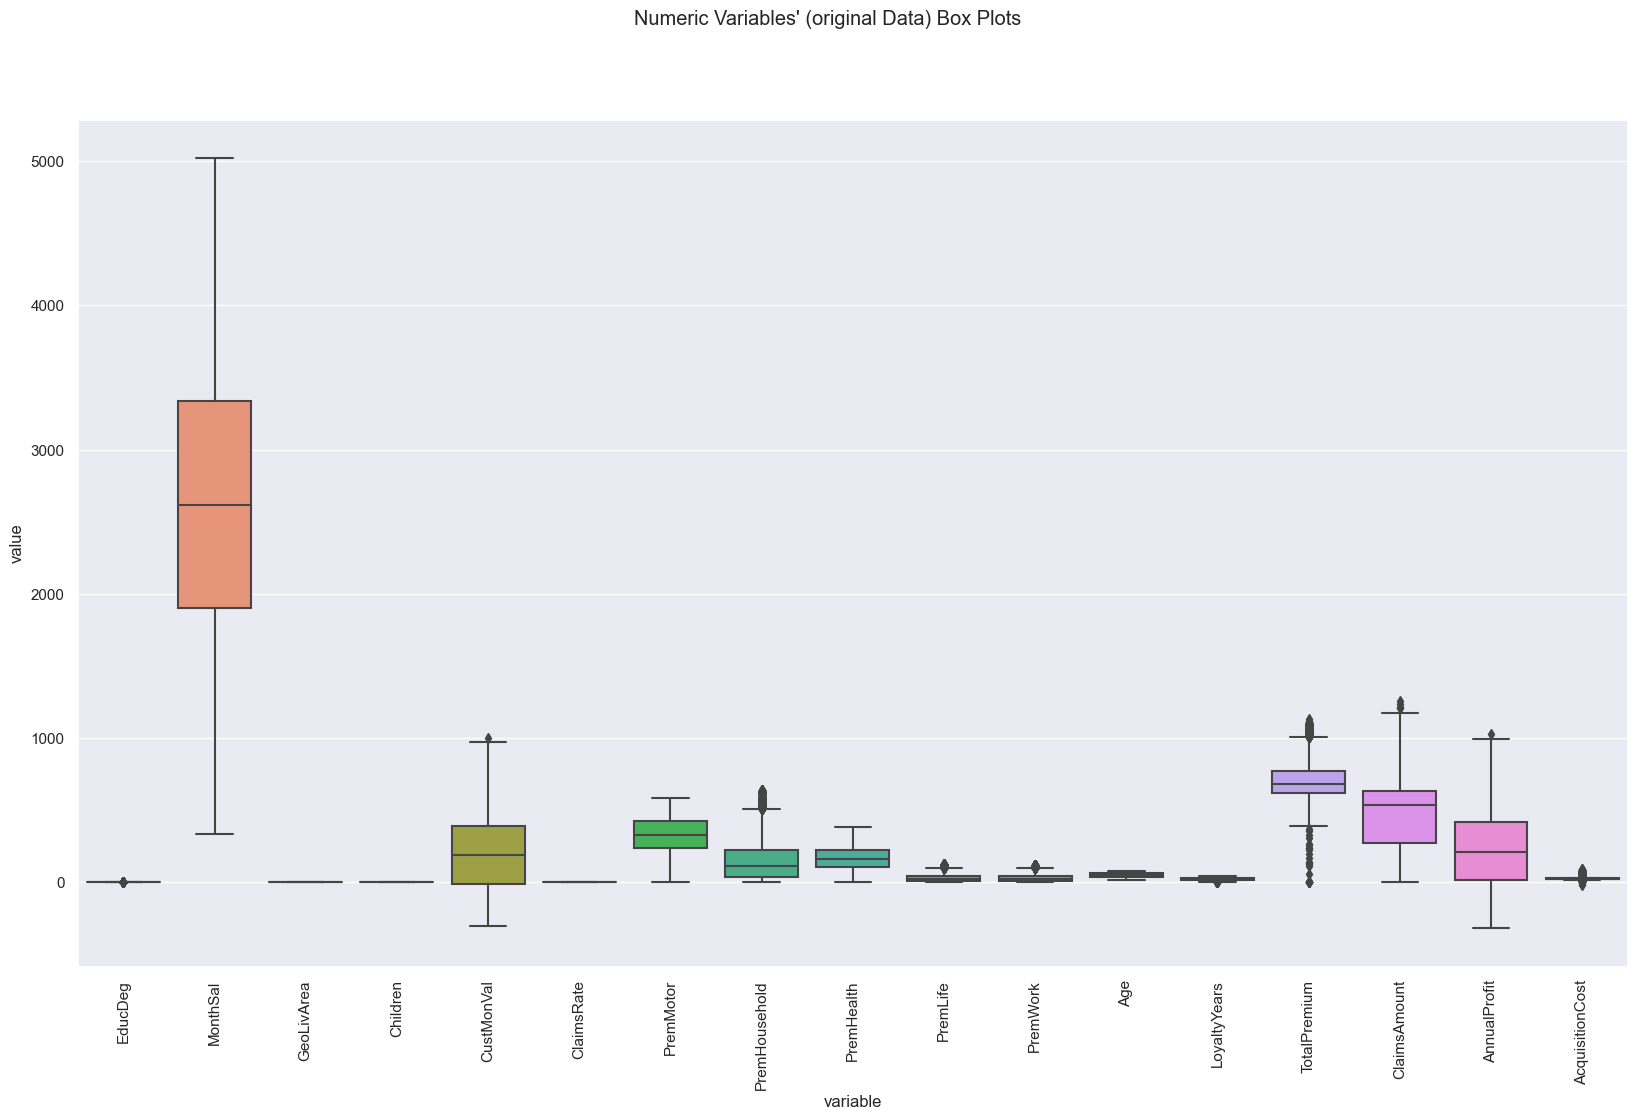

In [1133]:
# All Numeric Variables' Box Plots
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(figsize=(20, 11))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.xticks(rotation=90)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (original Data) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_original_data_boxplots.png'), dpi=200)
plt.show()

__`Normalized Data`__

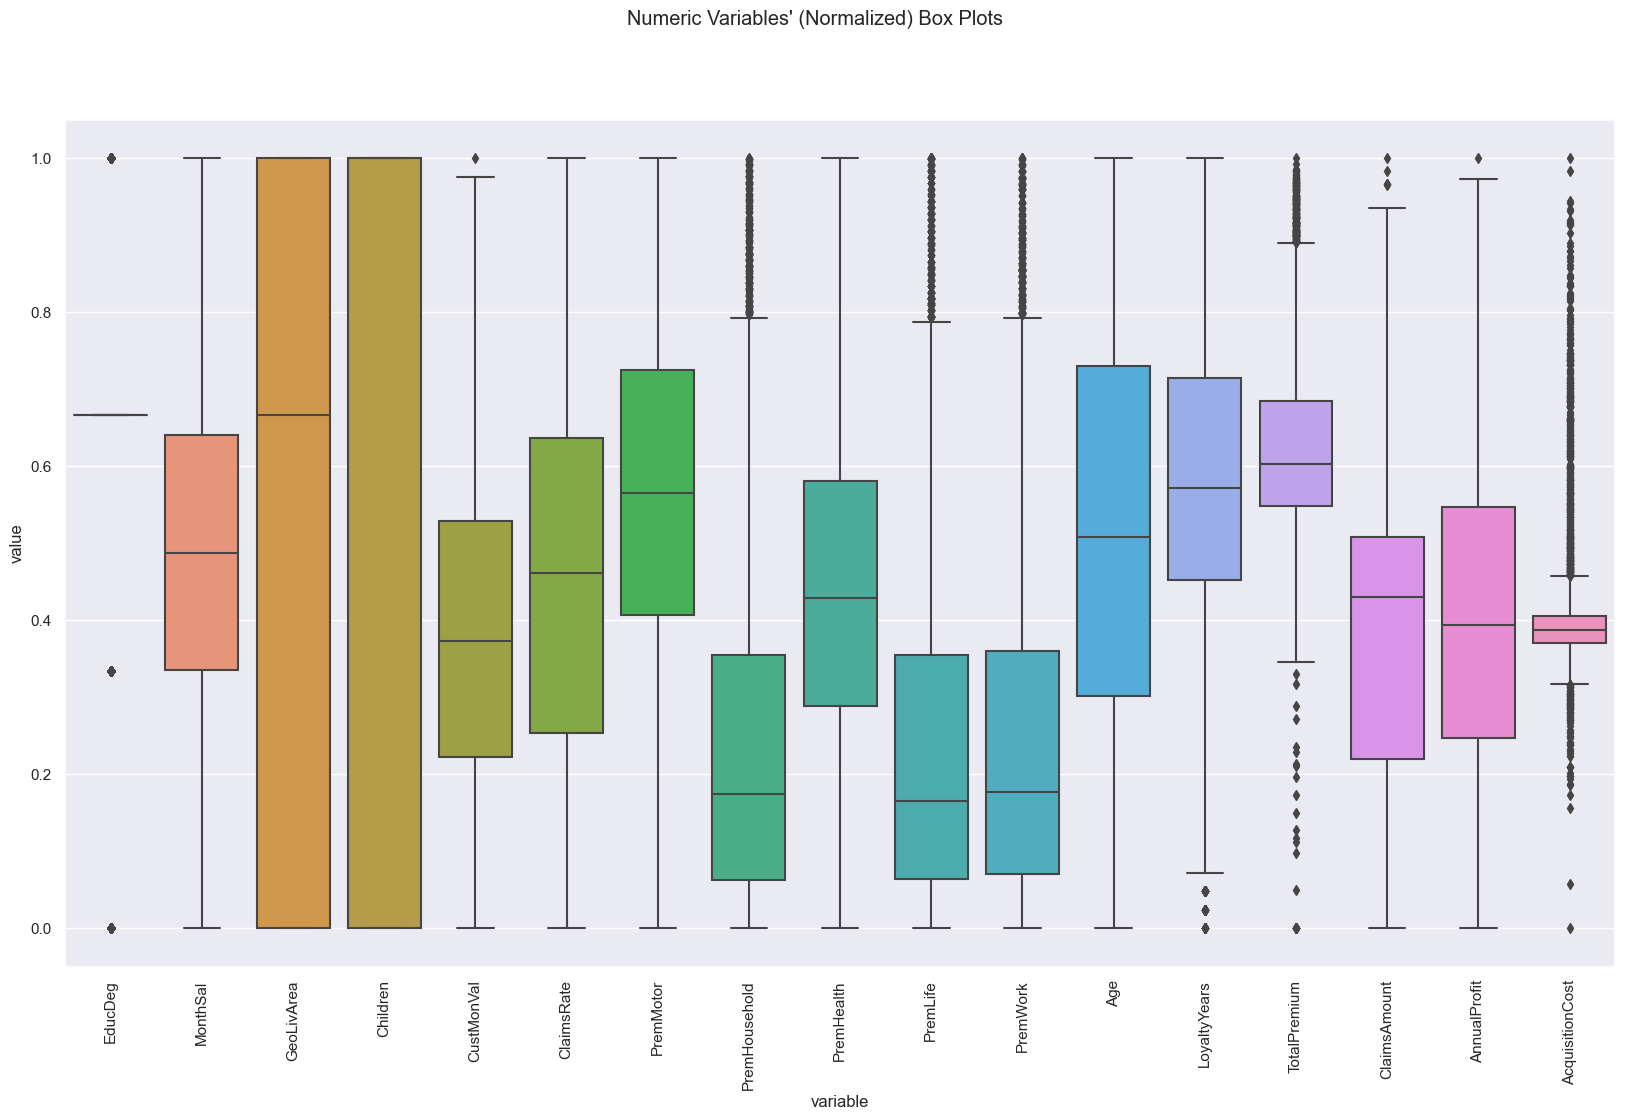

In [1134]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
plt.subplots(figsize=(20, 11))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(df_norm_scaled))
plt.xticks(rotation=90)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (Normalized) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_normalized_data_boxplots.png'), dpi=200)
plt.show()

__`Standardized Data`__

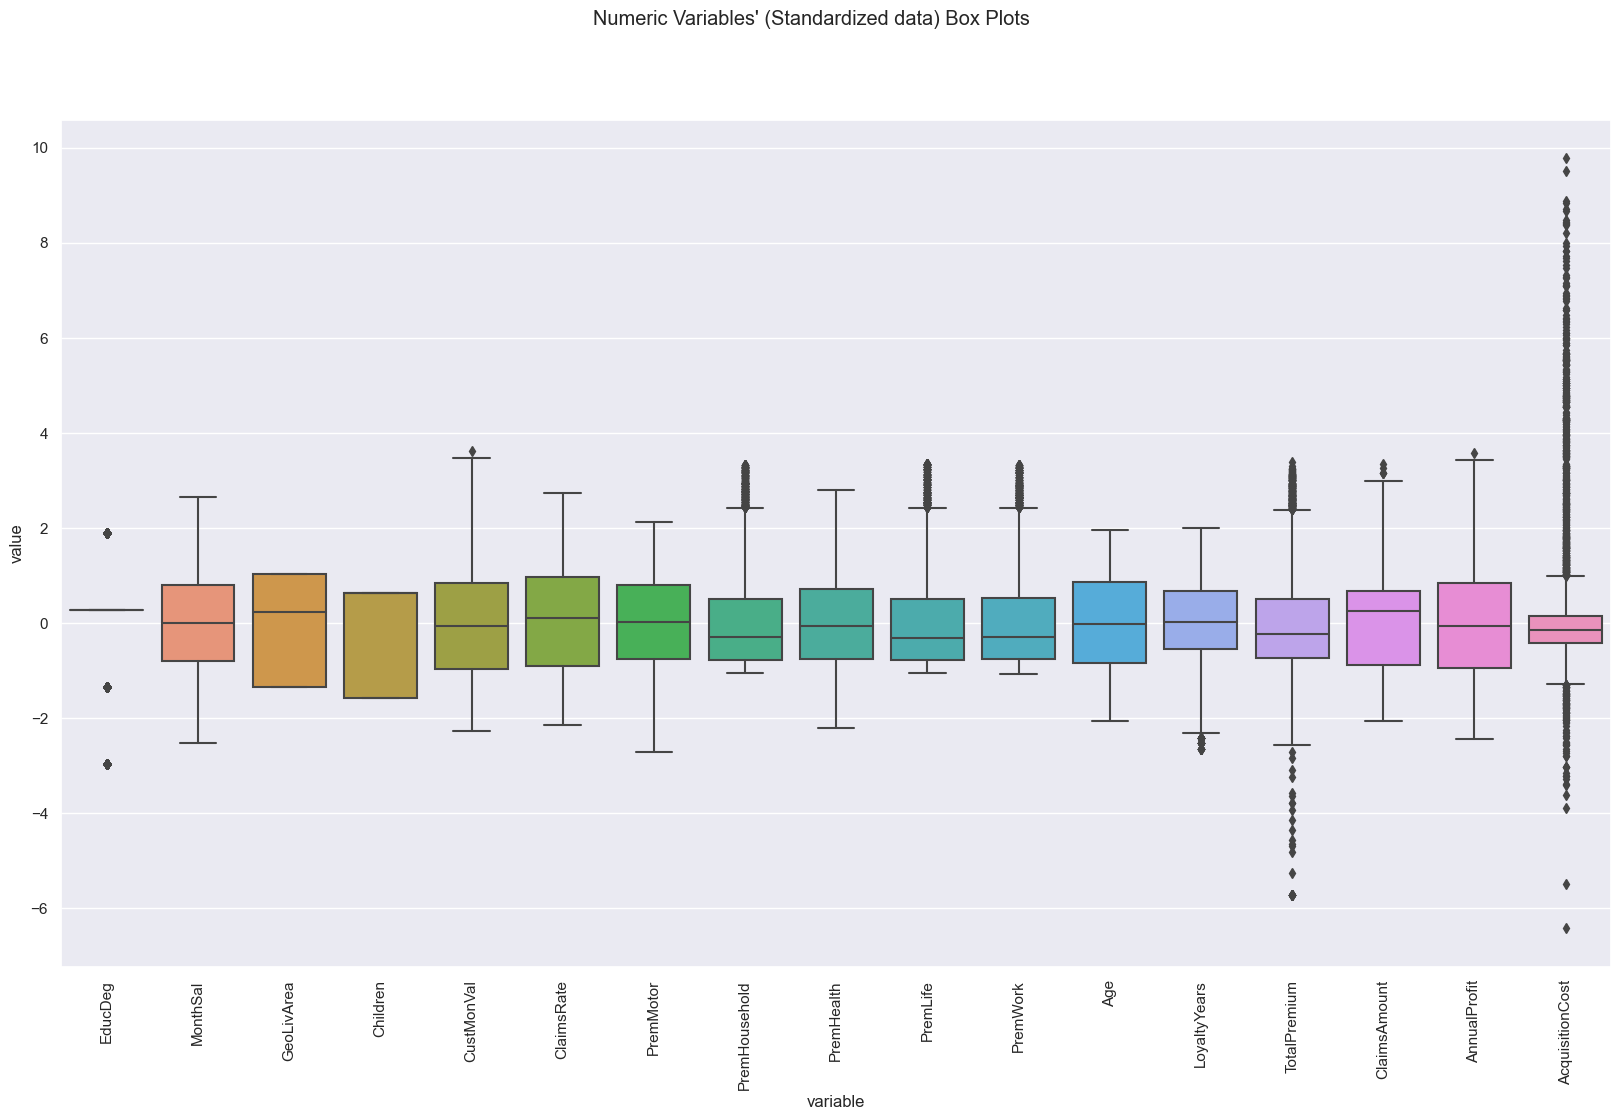

In [1135]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
plt.subplots(figsize=(20, 11))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(df_stand_scaled))
plt.xticks(rotation=90)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (Standardized data) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_standarized_boxplots.png'), dpi=200)
plt.show()

In [1136]:
df_scaled = df_stand_scaled
df_scaled.head()

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                     
1      -1.353420 -0.491930   -1.352432  0.631318    0.799582   -0.909584   
3      -2.978823 -0.381743    0.228520 -1.583988    1.358081   -1.258821   
4       0.271984 -1.679737    1.018996  0.631318   -0.997189    0.995347   
5       0.271984 -0.948100    1.018996  0.631318   -0.761418    0.709608   
6      -1.353420 -0.063305    1.018996  0.631318   -1.030329    1.027096   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork       Age  \
CustID                                                                       
1        0.389946      -0.509198   -0.288371  0.602970 -0.463164 -1.039087   
3       -1.015301       0.483708   -0.573783  1.991797  2.473060 -0.276725   
4       -1.211306      -0.756313    1.871355  0.190982 -0.053816 -0.975557   
5        0.081653      -0.725851    0.186399 -0.393639  0.414879 -0.467315   
6        0.927368      -0.923679   -0.701944 -0.809510 -0.792787  0.612698   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
1          -0.876849     -0.363640     -0.952499      0.788106   
3           0.120571      0.240365     -1.177447      1.358342   
4          -0.766024     -0.885867      0.491572     -1.004452   
5           0.120571     -0.655984      0.369372     -0.749374   
6           0.674694     -0.978914      0.467642     -1.031372   

        AcquisitionCost  
CustID                   
1             -0.179628  
3              0.332697  
4             -0.472633  
5              0.207091  
6             -0.279708

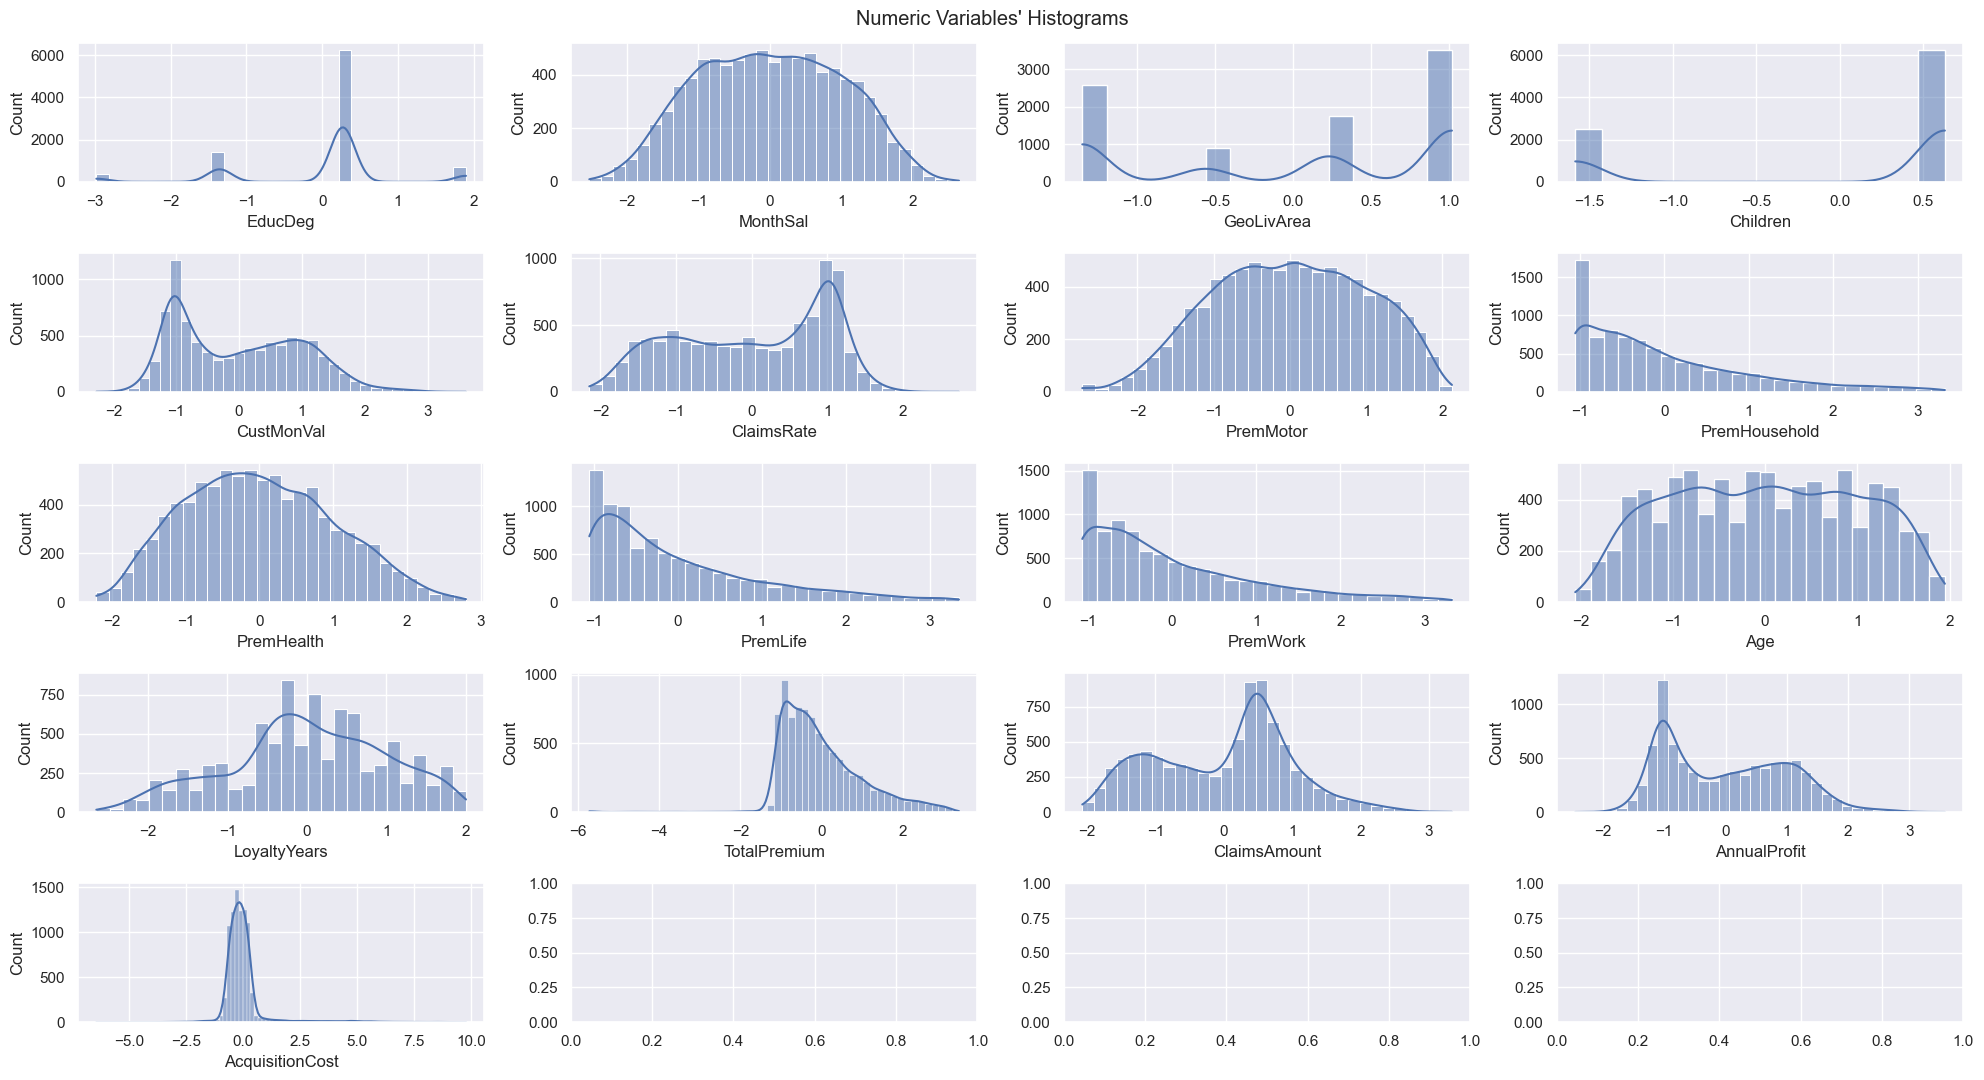

In [1137]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig_, axes_ = plt.subplots(5, ceil(len(df_scaled.columns) / 5), figsize=(20, 11), tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes_.flatten(), df_scaled.columns): # Notice the zip() function and flatten() method
    sns.histplot(x=df_scaled[feat], ax=ax, kde=True, bins="scott")
    #ax.hist(df[feat], bins="scott", density=True)
    #ax.plot(kde=True)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_frequencies_histograms.png'))
plt.show()

<div class="alert alert-block alert-warning">

<b>Insights</b>
We can notice how scaling the features brings everything into perspective. The features are now more comparable and will have a similar effect on the learning models. After evaluating each method we decided to go with StandardScaler because the use of it brings more advantages
</div>

- __Data Partitioning__

As A2Z would like to Understand the value and demographics of each customer segment,
as well as Understand which types of insurance they will be more interested in buying..

- Better to Split data set into customer demographics data and insurance related data.

In [1138]:
demographic_features = ['Age', 'EducDeg', 'MonthSal', 'GeoLivArea','Children']
demographic_df = pd.DataFrame(df_scaled, columns=demographic_features)

In [1139]:
coverage_features = ['LoyaltyYears', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth',
                                                'PremLife', 'PremWork', 'TotalPremium', 'ClaimsAmount', 'AnnualProfit', 'AcquisitionCost']
coverage_df = pd.DataFrame(df_scaled, columns=coverage_features)

In [1140]:
coverage_df.head()

LoyaltyYears  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                                   
1          -0.876849    0.799582   -0.909584   0.389946      -0.509198   
3           0.120571    1.358081   -1.258821  -1.015301       0.483708   
4          -0.766024   -0.997189    0.995347  -1.211306      -0.756313   
5           0.120571   -0.761418    0.709608   0.081653      -0.725851   
6           0.674694   -1.030329    1.027096   0.927368      -0.923679   

        PremHealth  PremLife  PremWork  TotalPremium  ClaimsAmount  \
CustID                                                               
1        -0.288371  0.602970 -0.463164     -0.363640     -0.952499   
3        -0.573783  1.991797  2.473060      0.240365     -1.177447   
4         1.871355  0.190982 -0.053816     -0.885867      0.491572   
5         0.186399 -0.393639  0.414879     -0.655984      0.369372   
6        -0.701944 -0.809510 -0.792787     -0.978914      0.467642   

        AnnualProfit  AcquisitionCost  
CustID                                 
1           0.788106        -0.179628  
3           1.358342         0.332697  
4          -1.004452        -0.472633  
5          -0.749374         0.207091  
6          -1.031372        -0.279708

<a class="anchor" id="dimensionality-reduction">

## 3. Dimensionality Reduction
</a>

>Dimensionality reduction is the process of reducing the number of dimensions or features in a dataset while minimizing the loss of information. It can help to reduce the complexity of the model, improve the interpretability of the results, and speed up the training and evaluation process.


<a class="anchor" id="feature-selection">

### 3.1 Feature Selection
</a>

Feature Selection is the process of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

- __Spearman Correlation__

Spearman correlation: This method measures the monotonic relationship between two variables. It is calculated as the Pearson correlation between the ranked values of the two variables.

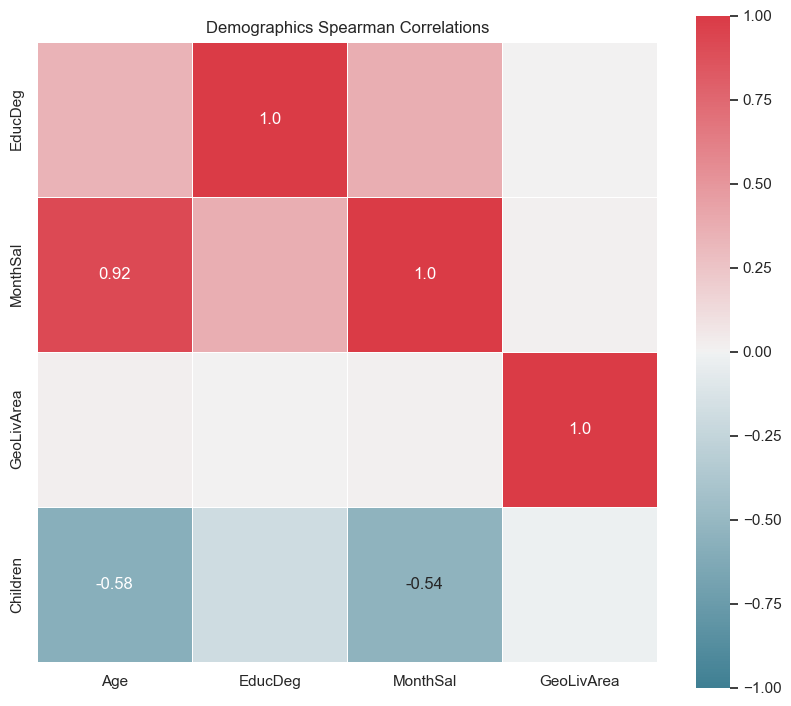

In [1141]:
cor_spearman_demo = demographic_df.corr(method ='spearman')
heatmap_corr(cor= cor_spearman_demo, title="Demographics Spearman Correlations")

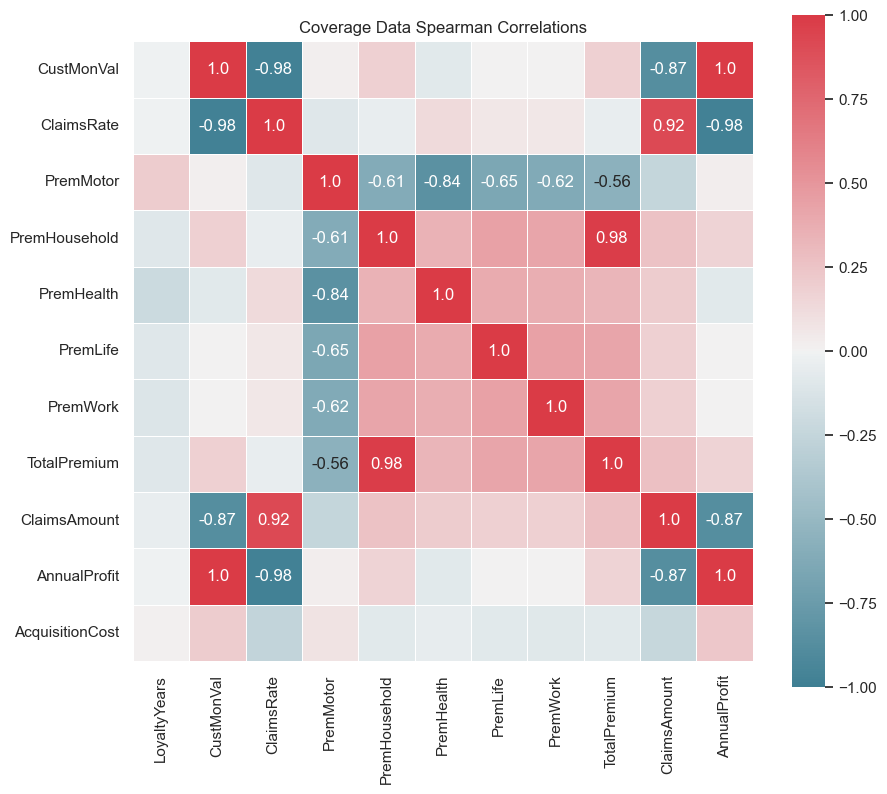

In [1142]:
cor_spearman_coverage = coverage_df.corr(method ='spearman')
heatmap_corr(cor= cor_spearman_coverage, title="Coverage Data Spearman Correlations")

- __Pearson Correlation__

This method measures the linear relationship between two variables. It is calculated as the covariance of the two variables divided by the product of their standard deviations.

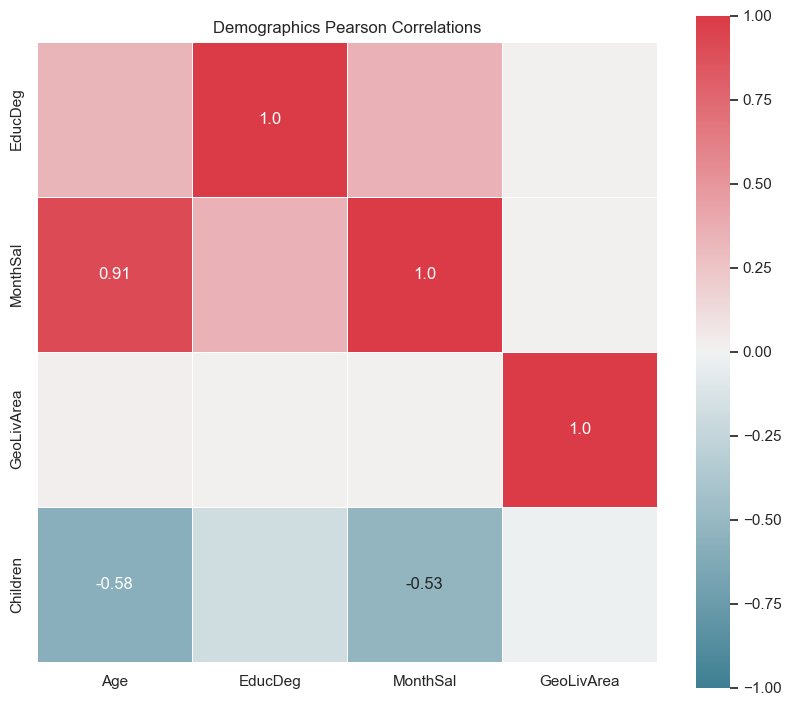

In [1143]:
cor_pearson_demo = demographic_df.corr(method ='pearson')
heatmap_corr(cor= cor_pearson_demo, title="Demographics Pearson Correlations")

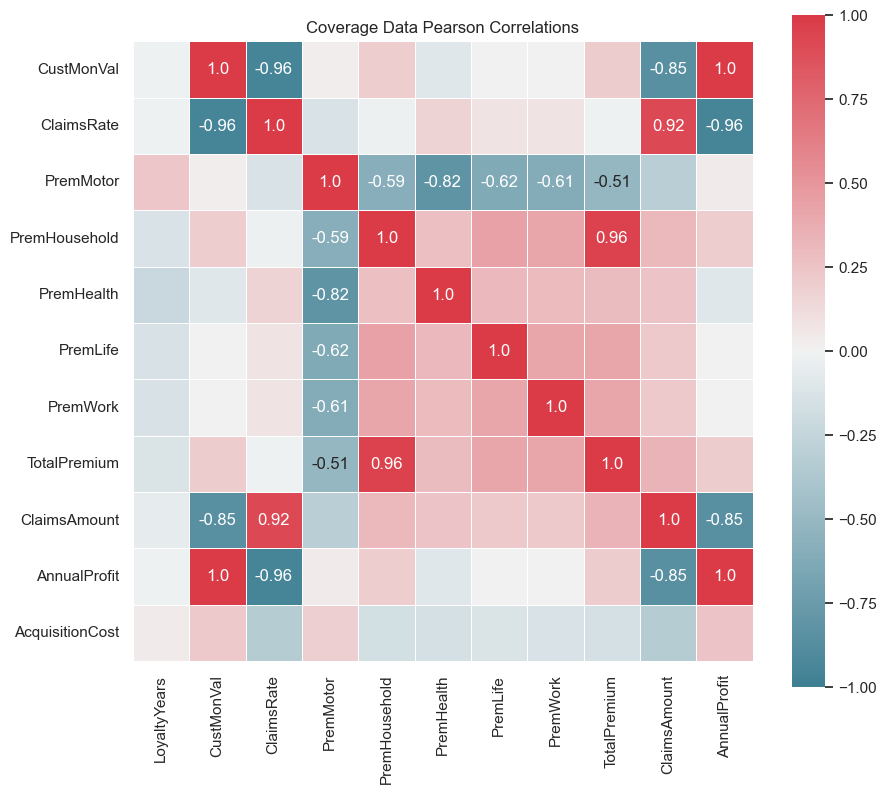

In [1144]:
cor_pearson_coverage = coverage_df.corr(method ='pearson')
heatmap_corr(cor= cor_pearson_coverage, title="Coverage Data Pearson Correlations")

<div class="alert alert-block alert-warning">

<b>Correlated Features !</b>

> After applying correlation methods above to measure the strength and direction of the relationship between variables.

We can define lowest corr variables in Demographics:
- Demographics: `EducDeg` and `GeoLivArea`.

On the hand features in Insurance that are strongly correlated with each other can be redundant and may not provide additional information or predictive power to the model,
 In such cases, it may be beneficial to remove one of the highly correlated features to avoid overfitting and to improve the interpretability of the model.
- Insurance: `LoyaltyYears`, `PremWork`, `PremLife`, `PremHealth`, `TotalPremium`, `ClaimsAmount`, `AcquisitionCost`, `AnnualProfit`.

**We can drop these variables as they may not contribute much to the analysis and may even cause problems with certain algorithms.**

</div>

In [1145]:
df_scaled.drop(columns=['EducDeg', 'GeoLivArea'], inplace=True)

In [1146]:
df_scaled.drop(columns=['PremWork', 'PremLife', 'PremHealth', 'PremHousehold', 'TotalPremium', 'AcquisitionCost'], inplace=True)

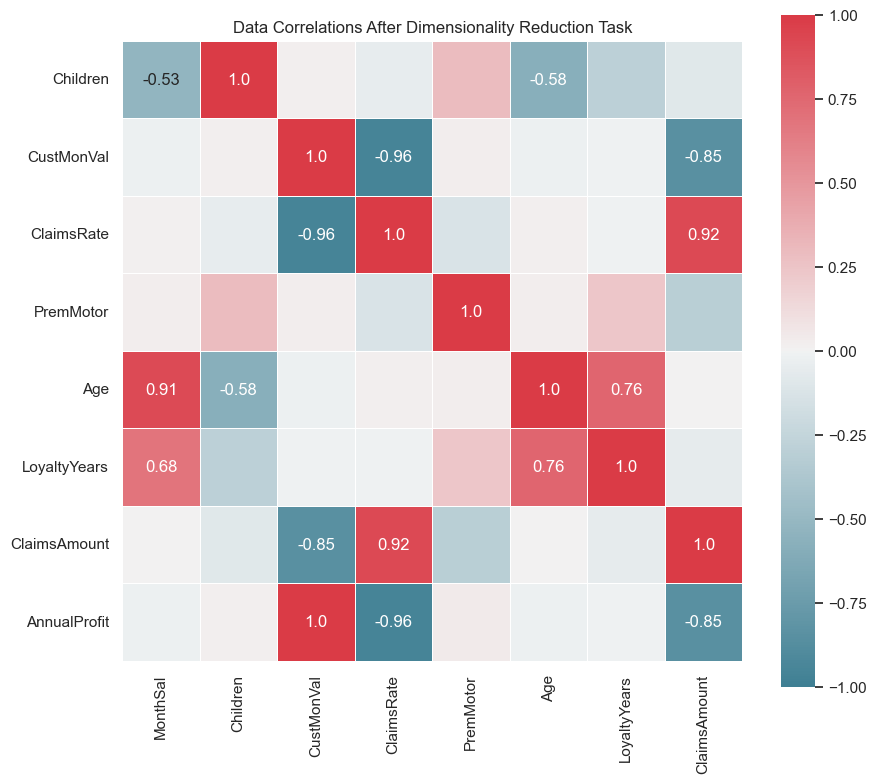

In [1147]:
corr_pearson = df_scaled.corr(method ='pearson')
heatmap_corr(cor= corr_pearson, title="Data Correlations After Dimensionality Reduction Task")

<a class="anchor" id="manifold-learning">

### 3.2 Manifold learning

This involves projecting the data onto a lower-dimensional manifold, or curved surface, that captures the structure of the data. Manifold learning techniques include methods such as __principal component analysis (PCA)__ and __t-distributed stochastic neighbor embedding (t-SNE)__.

__Principal Component Analysis (PCA)__

Principal Component Analysis (PCA) is a dimensionality reduction technique that projects the data onto a lower-dimensional space while preserving as much of the variance in the data as possible. It is commonly used to visualize high-dimensional data, to identify patterns and trends in the data, and to reduce the complexity of the data for further analysis.

<div class="alert alert-block alert-info">

<b>How To PCA !</b>
- To perform PCA, we start by standardizing the data by subtracting the mean and dividing by the standard deviation for each feature. This ensures that the features are on the same scale and have equal weight in the analysis. This step already done
- Next, we calculate the covariance matrix of the standardized data, which is a measure of the relationships between the features. The eigenvectors of the covariance matrix are the principal components, and the corresponding eigenvalues are the variances explained by each component.
- The number of principal components is equal to the number of original features, but you can select a smaller number of components that capture the most variance in the data. This is done by ranking the components by the eigenvalues and selecting the top N components, where N is the desired number of dimensions.
- The loadings of the original features on each component represent the degree to which each feature contributes to the variance explained by the component. A high loading for a feature indicates that it is important for that component, while a low loading indicates that it is not as important.
- The transformed data in the new component space can be used for further analysis, such as clustering or classification. We can also use the loadings of the original features on the components to interpret the patterns and trends in the data.
</div>

In [1148]:
#df_scaled = df_scaled[coverage_df.columns.tolist() + ['Age', 'MonthSal']]
pca_data = df_scaled.copy()
scaled_df_copy = df_scaled.copy()
pca_data.head()

MonthSal  Children  CustMonVal  ClaimsRate  PremMotor       Age  \
CustID                                                                    
1      -0.491930  0.631318    0.799582   -0.909584   0.389946 -1.039087   
3      -0.381743 -1.583988    1.358081   -1.258821  -1.015301 -0.276725   
4      -1.679737  0.631318   -0.997189    0.995347  -1.211306 -0.975557   
5      -0.948100  0.631318   -0.761418    0.709608   0.081653 -0.467315   
6      -0.063305  0.631318   -1.030329    1.027096   0.927368  0.612698   

        LoyaltyYears  ClaimsAmount  AnnualProfit  
CustID                                            
1          -0.876849     -0.952499      0.788106  
3           0.120571     -1.177447      1.358342  
4          -0.766024      0.491572     -1.004452  
5           0.120571      0.369372     -0.749374  
6           0.674694      0.467642     -1.031372

In [1149]:
# Fit the PCA to the data and transform the data onto the new component space
pca = PCA()
pca.fit_transform(pca_data)

array([[ 1.83223980e+00,  1.41584665e+00, -1.75867763e-01, ...,
        -2.98163512e-01,  2.92441487e-02, -1.26173265e-02],
       [ 2.40089312e+00, -4.22840438e-01,  1.78888820e+00, ...,
        -1.77965503e-01, -7.61359877e-02,  4.23150594e-03],
       [-1.73625703e+00,  2.20008012e+00,  7.00306418e-01, ...,
         3.90060550e-01, -1.77252471e-01,  6.53340604e-04],
       ...,
       [ 2.98458020e+00,  3.67786447e-01, -4.42824121e-01, ...,
        -5.95765589e-01,  9.42011750e-03, -1.22334648e-02],
       [ 1.61577264e-01,  1.21784728e+00,  8.27258280e-01, ...,
        -4.78270530e-02, -2.03073099e-02, -1.25745019e-02],
       [ 2.56699930e+00,  8.96025537e-01, -3.99009296e-01, ...,
        -6.71606313e-01,  4.83003626e-02, -1.59717586e-02]])

**The eigenvectors of the covariance matrix are the principal components, and the corresponding eigenvalues are the variances**

 `components_` attribute of the PCA object contains the loadings of the original features on the components,
 `explained_variance_` attribute contains the variances explained by each component.

In [1150]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue  Difference  Proportion  Cumulative
1    3.803567    0.000000    0.422570    0.422570
2    2.914244   -0.889323    0.323768    0.746338
3    1.290567   -1.623678    0.143380    0.889718
4    0.474462   -0.816105    0.052712    0.942430
5    0.276580   -0.197882    0.030728    0.973158
6    0.136396   -0.140184    0.015153    0.988311
7    0.078252   -0.058144    0.008694    0.997005
8    0.026580   -0.051672    0.002953    0.999958
9    0.000380   -0.026200    0.000042    1.000000

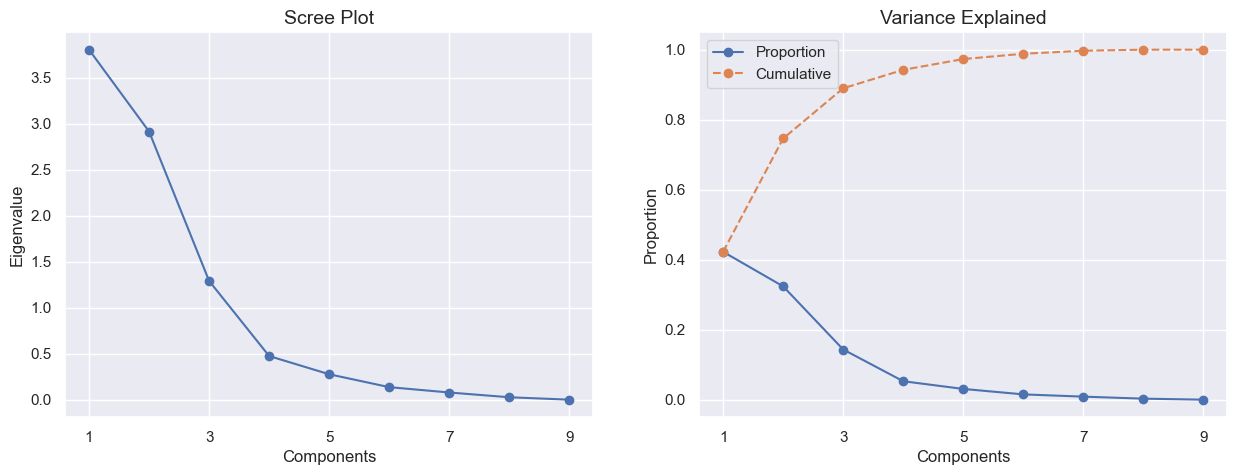

In [1151]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.savefig(os.path.join(figures_path, 'pca_eigenvalues_plot.png'), dpi=200)
plt.show()

In [1152]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Select the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
n_components # Output 6

5

<div class="alert alert-block alert-info">

<b>Number Of Components !</b>

- Scree plot: The "elbow" of the plot above, where the rate of change in the variances decreases sharply give us a guideline for selecting the number of components.
- Cumulative explained variance: It's the sum of the variances explained by each component up to a certain number of components. it gives minimum number of components that explain at least 95% of the variance in the data.

**We can conclude that based on results of both methods for selecting right components number gives the best performance.**

</div>

In [1153]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=n_components)
pca_feat = pca.fit_transform(pca_data)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_all_df = pd.DataFrame(pca_feat, index=pca_data.index, columns=pca_feat_names)
pca_all_df
# The loadings of the original features on each component are:

PC0       PC1       PC2       PC3       PC4
CustID                                                  
1       1.832240  1.415847 -0.175868  0.234250  0.305518
3       2.400893 -0.422840  1.788888  0.567665 -0.943613
4      -1.736257  2.200080  0.700306 -0.431428 -0.532782
5      -1.208779  1.034651 -0.560595 -0.250692 -0.533443
6      -1.675273 -0.318109 -1.512587 -0.180392 -0.089455
...          ...       ...       ...       ...       ...
10290  -0.191563 -2.254956  1.247700  0.140972 -0.135829
10292  -1.743585 -1.904172 -0.214762  0.988854 -0.473534
10294   2.984580  0.367786 -0.442824 -0.062004  0.424070
10295   0.161577  1.217847  0.827258 -0.844553 -0.241277
10296   2.566999  0.896026 -0.399009  0.266784  0.677518

[8755 rows x 5 columns]

In [1154]:
# Reassigning df to contain pca variables
df_pca = pd.concat([pca_data, pca_all_df], axis=1)
df_pca.head()

MonthSal  Children  CustMonVal  ClaimsRate  PremMotor       Age  \
CustID                                                                    
1      -0.491930  0.631318    0.799582   -0.909584   0.389946 -1.039087   
3      -0.381743 -1.583988    1.358081   -1.258821  -1.015301 -0.276725   
4      -1.679737  0.631318   -0.997189    0.995347  -1.211306 -0.975557   
5      -0.948100  0.631318   -0.761418    0.709608   0.081653 -0.467315   
6      -0.063305  0.631318   -1.030329    1.027096   0.927368  0.612698   

        LoyaltyYears  ClaimsAmount  AnnualProfit       PC0       PC1  \
CustID                                                                 
1          -0.876849     -0.952499      0.788106  1.832240  1.415847   
3           0.120571     -1.177447      1.358342  2.400893 -0.422840   
4          -0.766024      0.491572     -1.004452 -1.736257  2.200080   
5           0.120571      0.369372     -0.749374 -1.208779  1.034651   
6           0.674694      0.467642     -1.031372 -1.675273 -0.318109   

             PC2       PC3       PC4  
CustID                                
1      -0.175868  0.234250  0.305518  
3       1.788888  0.567665 -0.943613  
4       0.700306 -0.431428 -0.532782  
5      -0.560595 -0.250692 -0.533443  
6      -1.512587 -0.180392 -0.089455

In [1155]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
features = list(df_scaled.columns)
loadings = df_pca[features + pca_feat_names].corr().loc[features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

In [1156]:
# Get the indices of the best loadings in the loadings matrix
pca_components = pca.components_
best_loadings_indices = np.argmax(np.abs(pca.components_), axis=1)

# Get the columns of the best loadings in the original data
best_columns = df_pca.columns[best_loadings_indices]
best_columns.values

array(['ClaimsRate', 'Age', 'PremMotor', 'Children', 'LoyaltyYears'],
      dtype=object)

In [1157]:
pca.explained_variance_ratio_

array([0.4225703 , 0.32376795, 0.14337994, 0.05271198, 0.03072759])

<div class="alert alert-block alert-warning">

<b>Best Components !</b>

    There are several factors to consider when deciding which components to keep or discard in PCA.
    Some common considerations include the explained variance, the loadings, and the interpretability of the components.
- Explained variance: It is the percentage of the total variance in the data that is explained by each component. it is recommended to keep the components that explain a significant portion of the variance in the data, as they capture the most important patterns in the data.
- Loadings: Correlations between the original features and the components. Components with high loadings on a particular feature are likely to capture important patterns in that feature. We can use the loadings to identify which features are most important for each component.
- Interpretability: It is easier to interpret and communicate the meaning of components that are composed of a small number of features with high loadings, rather than components that are composed of many features with low loadings.
</div>

In [1158]:
#
# ProfileReport(
#     df_pca,
#     title='A2Z Insurance Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

<div class="alert alert-block alert-warning">

<b>Drop Low Variance Components!</b>

**It is worth noting that selecting the number of components is often a trade-off between complexity and performance. A larger number of components may capture more variance in the data, but may also increase the complexity of the data and may not necessarily improve the performance of a machine learning model. On the other hand, a smaller number of components may reduce the complexity of the data, but may also limit the ability to capture important patterns and trends in the data.**

It is generally a good idea to drop components that have low variance, as they may not contribute much to the analysis and may even cause problems with certain algorithms. After considering these factors and checking the profile report, I have decided to drop components with the lowest variances.

</div>

In [1159]:
pca_df = pca_all_df[['PC0', 'PC1']].copy()

In [1160]:
pca_features = pca_df.columns.tolist()
pca_features

['PC0', 'PC1']

In [1161]:
#selected_features = best_columns.tolist()
selected_features = ['ClaimsRate', 'PremMotor', 'CustMonVal', 'Age', 'Children', 'AnnualProfit']

In [1162]:
a2z_scaled_df = df_scaled[selected_features]
a2z_scaled_pca_df = pd.concat([a2z_scaled_df, pca_df], axis=1)

In [1163]:
a2z_scaled_pca_df

ClaimsRate  PremMotor  CustMonVal       Age  Children  AnnualProfit  \
CustID                                                                        
1        -0.909584   0.389946    0.799582 -1.039087  0.631318      0.788106   
3        -1.258821  -1.015301    1.358081 -0.276725 -1.583988      1.358342   
4         0.995347  -1.211306   -0.997189 -0.975557  0.631318     -1.004452   
5         0.709608   0.081653   -0.761418 -0.467315  0.631318     -0.749374   
6         1.027096   0.927368   -1.030329  0.612698  0.631318     -1.031372   
...            ...        ...         ...       ...       ...           ...   
10290    -0.020616  -0.835856    0.188393  1.438591 -1.583988      0.195197   
10292     0.900101   0.538089   -0.920977  1.057410 -1.583988     -0.916364   
10294    -1.481063   0.619986    1.445807 -0.657906  0.631318      1.433622   
10295    -0.084114  -1.160711    0.208484 -0.721436  0.631318      0.184127   
10296    -1.290570   0.706520    1.173329 -0.975557  0.631318      1.159122   

             PC0       PC1  
CustID                      
1       1.832240  1.415847  
3       2.400893 -0.422840  
4      -1.736257  2.200080  
5      -1.208779  1.034651  
6      -1.675273 -0.318109  
...          ...       ...  
10290  -0.191563 -2.254956  
10292  -1.743585 -1.904172  
10294   2.984580  0.367786  
10295   0.161577  1.217847  
10296   2.566999  0.896026  

[8755 rows x 8 columns]

In [1164]:
scaled_df = a2z_scaled_pca_df.copy()

In [1165]:
scaled_df.describe()

ClaimsRate     PremMotor    CustMonVal           Age      Children  \
count  8.755000e+03  8.755000e+03  8.755000e+03  8.755000e+03  8.755000e+03   
mean  -3.976767e-17  2.840548e-18 -5.802833e-17 -2.668086e-17 -3.631843e-17   
std    1.000057e+00  1.000057e+00  1.000057e+00  1.000057e+00  1.000057e+00   
min   -2.147789e+00 -2.722381e+00 -2.270044e+00 -2.055570e+00 -1.583988e+00   
25%   -9.095837e-01 -7.539594e-01 -9.618594e-01 -8.484964e-01 -1.583988e+00   
50%    1.063795e-01  1.722866e-02 -7.500981e-02 -2.260383e-02  6.313179e-01   
75%    9.635984e-01  7.884168e-01  8.379814e-01  8.668189e-01  6.313179e-01   
max    2.741534e+00  2.123691e+00  3.610907e+00  1.946832e+00  6.313179e-01   

       AnnualProfit          PC0           PC1  
count  8.755000e+03  8755.000000  8.755000e+03  
mean  -2.069542e-17     0.000000 -5.883992e-18  
std    1.000057e+00     1.950274  1.707116e+00  
min   -2.452205e+00    -4.750976 -3.913130e+00  
25%   -9.592946e-01    -1.731623 -1.398564e+00  
50%   -7.614114e-02    -0.315679 -2.182947e-02  
75%    8.426628e-01     1.735782  1.381469e+00  
max    3.578546e+00     5.583670  4.170026e+00

In [1166]:
demographic_selected_features = ['Age', 'Children']
coverage_selected_features = ['ClaimsRate', 'PremMotor', 'CustMonVal', 'AnnualProfit']

<div class="alert alert-block alert-warning">

<b>Train models reduced-dimensionality data produced by PCA!</b>

Generally better to train models on data produced by PCA rather than the original high-dimensional data as :
- reduced-dimensionality data will often contain the most important features or patterns in the data,
- reduced-dimensionality data can make the clustering process more efficient and potentially improve the performance of the model.
- training on high-dimensional data can be computationally expensive and can also lead to overfitting, so reducing the dimensionality of the data can help mitigate these issues.
</div>

## 4. Clustering

>Clustering is an unsupervised machine learning technique that involves grouping data points into clusters based on their similarity. The goal of clustering is to discover patterns and structures in the data, and to group data points that are similar to each other into the same cluster.

<div class="alert alert-block alert-info">

<b>Steps To Follow !</b>

- Model selection and training: Choose a clustering algorithm that is suitable for our data and the type of clusters we are trying to discover.
    - Some common algorithms include k-means, hierarchical clustering, and DBSCAN. Consider the strengths and weaknesses of each algorithm, and how well they may perform on our data.
    - Train the model using the appropriate hyperparameters, and adjust them as needed.
- Evaluation: Evaluate the performance of the model using various metrics and techniques, such as silhouette scores, elbow plots, or visualization of the resulting clusters.
    - This will help  determine how well the model is able to group the data points into clusters, and whether the clusters are meaningful and useful.
- Interpretation: Finally, interpret the results of the model and use them to gain insights about data.
    - For example, we may need to analyze the characteristics of each cluster, or compare the clusters to each other.

</div>

<a class="anchor" id="agglomerative-clustering">

### 4.1 Agglomerative (Hierarchical Clustering)
</a>

> Hierarchical clustering: This is an algorithm that builds a hierarchy of clusters. There are two types of hierarchical clustering: Agglomerative and Divisive.

- __`Agglomerative`__ is a bottom-up approach, where each data point is treated as a single cluster and at each step, the two closest clusters are merged.
- __`Divisive`__ is a top-down approach, where all the data points are treated as one cluster and at each step, the cluster is split into two.

__Agglomerative Hyperparameter Tuning__

Some of the hyperparameters that we can consider:

- __`The number of clusters`__: Try different values for the number of clusters and see which one results in the best performance.
- __`The distance measure`__: We can try using different distance measures and see which one works best for our data.
- __`The linkage criterion`__: We can try using different linkage criteria such as single, complete, average, or Ward linkage and see which one works best for your data.

In [1167]:
# Define the hyper-parameters to tune
param_grid = {'n_clusters': [3, 4, 5], 'linkage': ['ward', 'complete'], 'affinity': ['euclidean']}
grid, best_params = hyperparameter_tuning(model_=AgglomerativeClustering(), grid_params=param_grid, data=scaled_df, scoring=silhouette_score)

best_params

{'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 3}

__Dendrogram__

A dendrogram is a graphical representation of the structure of a hierarchical clustering solution. It is a tree-like diagram that shows the relationships between different clusters. The dendrogram is useful for visualizing the hierarchical structure of the clusters, and for identifying the optimal number of clusters to use in the analysis.

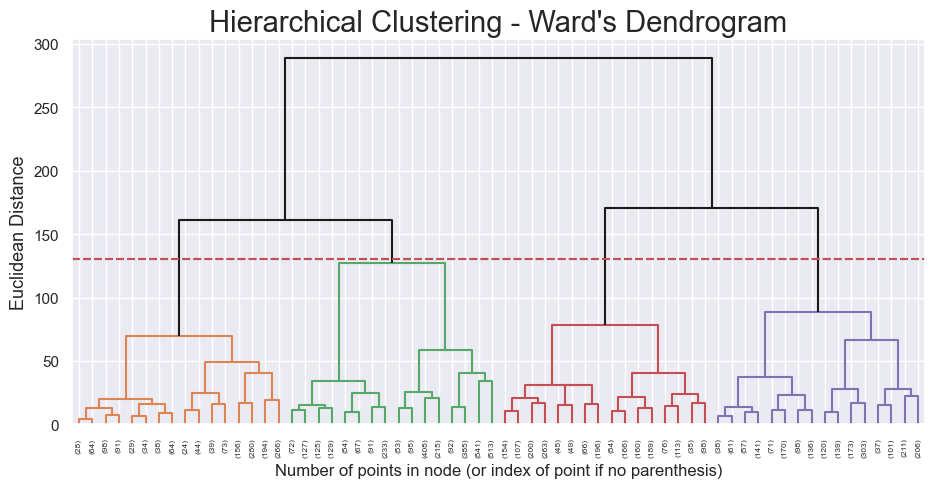

In [1168]:
best_params['n_clusters'] = None
best_params['distance_threshold'] = 0
plot_dendrogram(data=scaled_df, y_threshold=130,  **best_params)

__Agglomerative - Cluster Analysis__


In [1169]:
agglo_model = AgglomerativeClustering(affinity= 'euclidean', linkage= 'ward', n_clusters= 4)
agglo_labels = agglo_model.fit_predict(scaled_df)
agglo_labels_df = pd.DataFrame({'cluster': agglo_labels}).set_index(scaled_df.index)

In [1170]:
scaled_df_agglo= pd.concat([scaled_df, agglo_labels_df], axis=1)
scaled_df_agglo.head()

ClaimsRate  PremMotor  CustMonVal       Age  Children  AnnualProfit  \
CustID                                                                        
1        -0.909584   0.389946    0.799582 -1.039087  0.631318      0.788106   
3        -1.258821  -1.015301    1.358081 -0.276725 -1.583988      1.358342   
4         0.995347  -1.211306   -0.997189 -0.975557  0.631318     -1.004452   
5         0.709608   0.081653   -0.761418 -0.467315  0.631318     -0.749374   
6         1.027096   0.927368   -1.030329  0.612698  0.631318     -1.031372   

             PC0       PC1  cluster  
CustID                               
1       1.832240  1.415847        2  
3       2.400893 -0.422840        1  
4      -1.736257  2.200080        3  
5      -1.208779  1.034651        0  
6      -1.675273 -0.318109        0

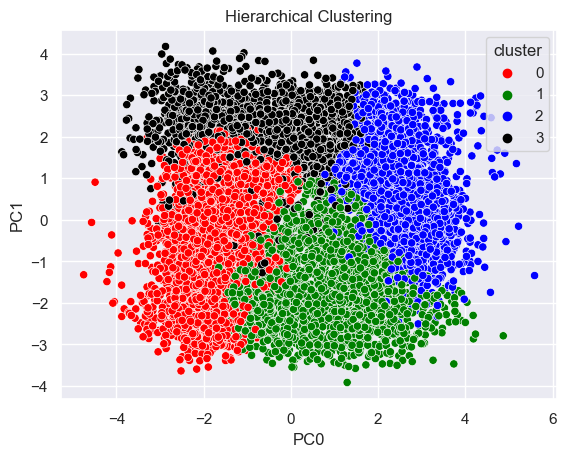

In [1171]:
# visualize the clustered dataframe with Scatter Plot
plot_scatter_plot(scaled_df_agglo, 4, "Hierarchical Clustering")

<a class="anchor" id="k-means-clustering">

### 4.2 K-Means (Centroid-based Clustering)
</a>

>k-means is a popular clustering algorithm that is used to group data points into a predetermined number of clusters. It works by iteratively assigning data points to the nearest cluster, and then updating the cluster centroids (i.e., the mean of all data points in the cluster) based on the new assignments. The process continues until the centroids converge and the assignments of data points to clusters are stable.

__Kmeans Hyperparameter Tuning__

<div class="alert alert-block alert-info">

The following are some of the parameters that can be specified when using KMeans:

- __`n_clusters`__: The number of clusters to form as well as the number of centroids to generate, Standard literature suggests we use the elbow method to determine how many clusters we need. In reality, this is only an initial guess. Well, in this example we know we have 3 clusters as elbow method shows above.
- __`init`__: The method to use for initialization of the centroids. The options are "k-means++" (default), "random", or an ndarray.
- __`n_init`__: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
- __`random_state`__: Determines random number generation for dataset creation and centroid initialization, It is useful if we want to reproduce exact clusters over and over again.
</div>

<div class="alert alert-block alert-info">

To determine the __Optimal Number Of Clusters__ for a k-means model, there are several methods that can be used.
- __`elbow method`__ involves fitting and plotting the model for a range of values for the number of clusters and selecting the number of clusters where the plot of the within-cluster sum of square errors (WCSS) starts to flatten out.
- __`silhouette method`__ involves calculating the silhouette score for a range of values for the number of clusters and selecting the number of clusters with the highest average silhouette score.
</div>

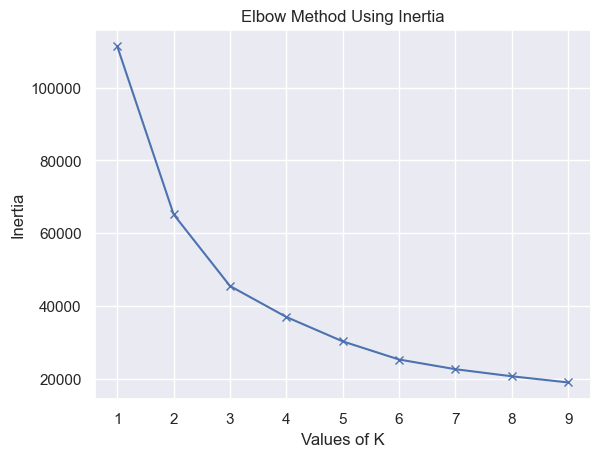

In [1172]:
plot_elbow_method(scaled_df, 'Elbow Method Using Inertia')

For n_clusters = 2, the average silhouette_score is : 0.3745064153533312
For n_clusters = 3, the average silhouette_score is : 0.38170669614048747
For n_clusters = 4, the average silhouette_score is : 0.3397534072415141
For n_clusters = 5, the average silhouette_score is : 0.33798531528264886
For n_clusters = 6, the average silhouette_score is : 0.3325803171013199
For n_clusters = 7, the average silhouette_score is : 0.34455135869477704
For n_clusters = 8, the average silhouette_score is : 0.329485309283259
For n_clusters = 9, the average silhouette_score is : 0.3223529569049171
Optimal number of clusters: 3


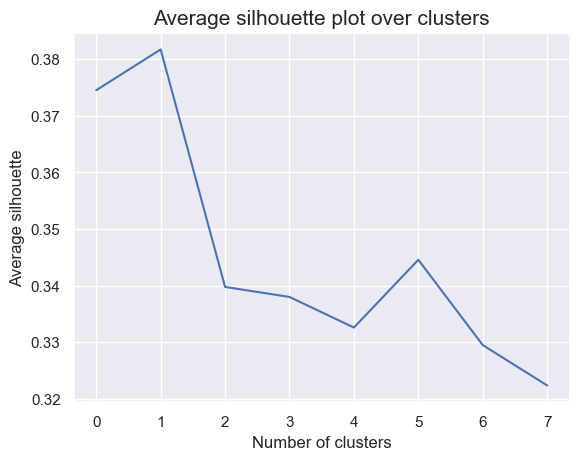

In [1173]:
optimal_k = silhouette_method(scaled_df)

__K-Means - Cluster Analysis__

In [1174]:
# Better initialization method and provide more n_init
n_clus = optimal_k
kmeans_model = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
kmeans_labels = kmeans_model.fit_predict(scaled_df)
kmeans_labels_df = pd.DataFrame({'cluster': kmeans_labels}).set_index(scaled_df.index)

In [1175]:
scaled_df_kmeans= pd.concat([scaled_df, kmeans_labels_df], axis=1)
scaled_df_kmeans.head()

ClaimsRate  PremMotor  CustMonVal       Age  Children  AnnualProfit  \
CustID                                                                        
1        -0.909584   0.389946    0.799582 -1.039087  0.631318      0.788106   
3        -1.258821  -1.015301    1.358081 -0.276725 -1.583988      1.358342   
4         0.995347  -1.211306   -0.997189 -0.975557  0.631318     -1.004452   
5         0.709608   0.081653   -0.761418 -0.467315  0.631318     -0.749374   
6         1.027096   0.927368   -1.030329  0.612698  0.631318     -1.031372   

             PC0       PC1  cluster  
CustID                               
1       1.832240  1.415847        1  
3       2.400893 -0.422840        1  
4      -1.736257  2.200080        0  
5      -1.208779  1.034651        0  
6      -1.675273 -0.318109        0

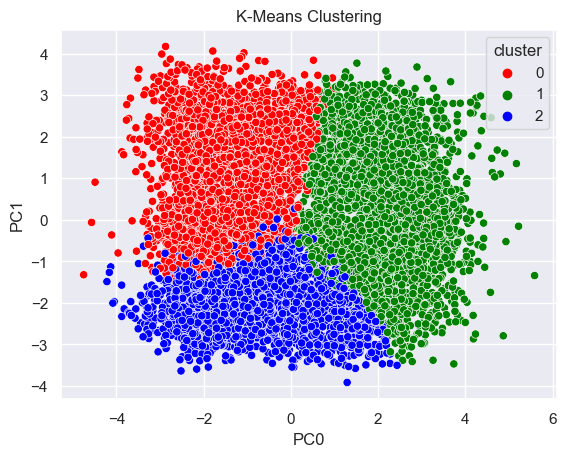

In [1176]:
# visualize the clustered dataframe with Scatter Plot
plot_scatter_plot(scaled_df_kmeans, n_clus, "K-Means Clustering")

In [1177]:
# calculate centroids
centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=scaled_df.columns)

# calculate the distances of each data point to the cluster centers
distances = kmeans_model.transform(scaled_df)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
scaled_df_kmeans_clus = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans_model.labels_}, index=scaled_df.index)

# Group by cluster and print information
for cluster, data in scaled_df_kmeans_clus.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (3448 members): 16143.77 within cluster 
Cluster 1 (3094 members): 17796.62 within cluster 
Cluster 2 (2213 members): 11528.94 within cluster 


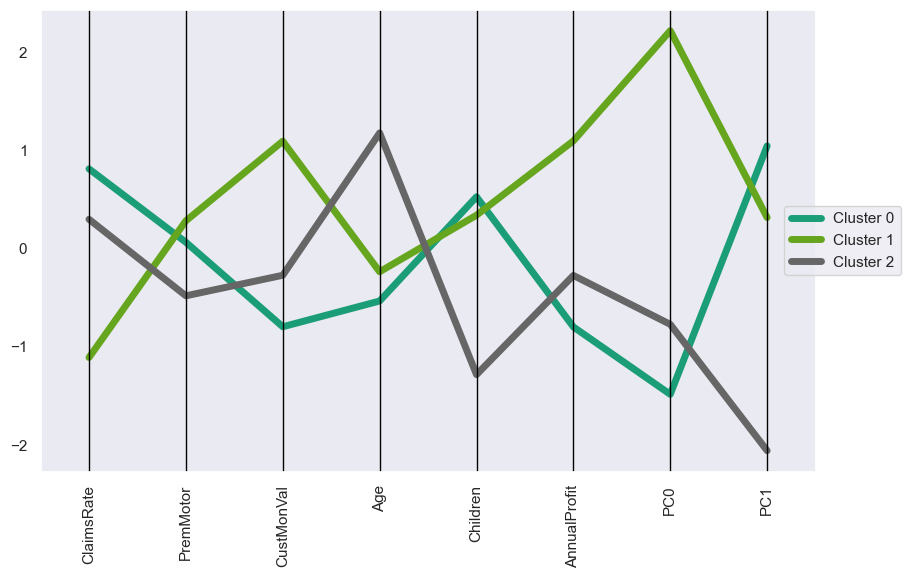

ClaimsRate  PremMotor  CustMonVal       Age  Children  AnnualProfit  \
0    0.807614   0.060843   -0.799306 -0.537252  0.523473     -0.801001   
1   -1.112131   0.278645    1.089024 -0.239782  0.336135      1.092223   
2    0.294590  -0.484421   -0.275252  1.173355 -1.286544     -0.277079   

        PC0       PC1    cluster  
0 -1.486857  1.041152  Cluster 0  
1  2.213748  0.311925  Cluster 1  
2 -0.774758 -2.060347  Cluster 2

In [1178]:
from pandas.plotting import parallel_coordinates

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.xticks(rotation=90)

plt.savefig(os.path.join(figures_path, 'kmeans_centroids_parallel_plot.png'), dpi=200)
plt.show()
centroids

<a class="anchor" id="dbscan-clustering">

### 4.3 DBScan (Density-Based Clustering)
</a>

> This is a density-based algorithm, where a cluster is defined as a high density region of points, surrounded by a low density region. The algorithm works by identifying the high-density regions, and then expanding the cluster from the seeds until the density falls below a certain threshold.

- `DBSCAN (Density-Based Spatial Clustering of Applications with Noise)` is a popular density-based clustering algorithm that works by identifying clusters of points that are densely packed together, and labeling points that are not part of any cluster as noise.

__DBScan Hyperparameter Tuning__

<div class="alert alert-block alert-info">

The following are some of the parameters that can be specified when using DBScan:
- __`Eps`__ ε (epsilon) is a parameter that determines the distance between points in a cluster. It is used to define the neighborhood around each point, and points within this neighborhood are considered to be part of the same cluster.
    - The value for ε can then be chosen by using a **k-distance graph**, plotting the distance to the kth (k = minPts - 1) nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an **"elbow"**: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. **The assumption is that for points in a cluster, their k nearest neighbors are at roughly the same distance**. Noise points have their k-th nearest neighbors at farther distance

- __`MinPts`__ which is the minimum number of points required to form a cluster.
    - As a rule of thumb, **minPts = 2 x dim** can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.
</div>

<div class="alert alert-block alert-info">

In [1179]:
# set to twice the dimension of our dataset
min_pts = scaled_df.shape[1] * 2

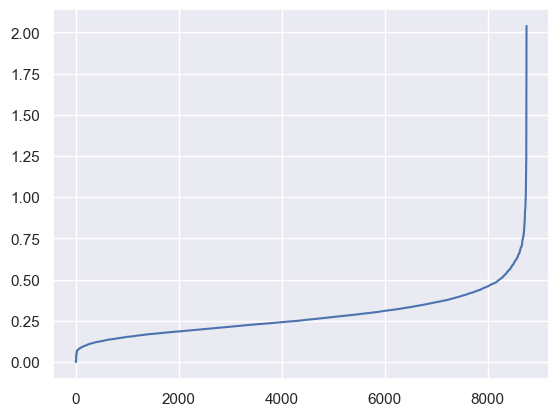

In [1180]:
from sklearn.neighbors import NearestNeighbors

# K-distance graph to find out the right eps value
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(range(distances.shape[0]), distances)
plt.show()

In [1181]:
from sklearn.cluster import DBSCAN

# Define the hyper-parameters to tune
param_grid = {'eps': [0.6], 'min_samples': [min_pts]}
grid_, best_params = hyperparameter_tuning(model_=DBSCAN(), grid_params=param_grid, data=scaled_df, scoring=silhouette_score)

best_params

{'eps': 0.6, 'min_samples': 16}

__DBScan - Cluster Analysis__

In [1182]:
dbscan_model = DBSCAN(**best_params)
dbscan_labels = dbscan_model.fit_predict(scaled_df)
dbscan_labels_df = pd.DataFrame({'cluster': dbscan_labels}).set_index(scaled_df.index)

In [1183]:
dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 3


In [1184]:
scaled_df_db_scan= pd.concat([scaled_df, dbscan_labels_df], axis=1)
scaled_df_db_scan.head()

ClaimsRate  PremMotor  CustMonVal       Age  Children  AnnualProfit  \
CustID                                                                        
1        -0.909584   0.389946    0.799582 -1.039087  0.631318      0.788106   
3        -1.258821  -1.015301    1.358081 -0.276725 -1.583988      1.358342   
4         0.995347  -1.211306   -0.997189 -0.975557  0.631318     -1.004452   
5         0.709608   0.081653   -0.761418 -0.467315  0.631318     -0.749374   
6         1.027096   0.927368   -1.030329  0.612698  0.631318     -1.031372   

             PC0       PC1  cluster  
CustID                               
1       1.832240  1.415847        0  
3       2.400893 -0.422840       -1  
4      -1.736257  2.200080        0  
5      -1.208779  1.034651        0  
6      -1.675273 -0.318109        0

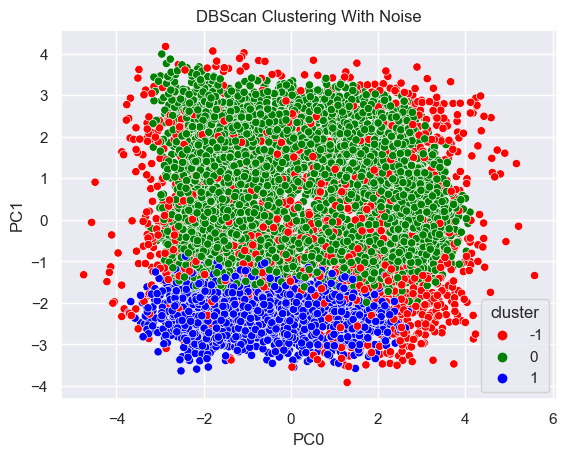

In [1185]:
# visualize the clustered dataframe with Scatter Plot
plot_scatter_plot(scaled_df_db_scan, dbscan_n_clusters, "DBScan Clustering With Noise")

In [1186]:
# Detecting noise (potential outliers)
noise_data = scaled_df_db_scan.loc[scaled_df_db_scan['cluster'] == -1]
noise_data

ClaimsRate  PremMotor  CustMonVal       Age  Children  AnnualProfit  \
CustID                                                                        
3        -1.258821  -1.015301    1.358081 -0.276725 -1.583988      1.358342   
8         1.439831  -0.666514   -1.574742 -0.530845  0.631318     -1.561448   
25        0.423868   0.758026   -0.432278  0.866819 -1.583988     -0.431339   
27       -0.941333   0.017229    1.024833  1.819772 -1.583988      1.039330   
30        0.900101   1.618481   -0.911450 -0.403785 -1.583988     -0.921823   
...            ...        ...         ...       ...       ...           ...   
10261     1.058845  -0.878171   -1.096066 -0.721436 -1.583988     -1.074867   
10263     0.106379   1.416016    0.041341 -0.022604  0.631318      0.028314   
10266    -2.147789   0.765396    2.234072 -0.149664  0.631318      2.211892   
10267    -1.354068  -0.487070    2.013788  1.819772 -1.583988      1.978929   
10278    -0.052365  -0.511913    0.126718 -1.166147 -1.583988      0.131617   

             PC0       PC1  cluster  
CustID                               
3       2.400893 -0.422840       -1  
8      -3.414170  1.278604       -1  
25     -0.894735 -1.640345       -1  
27      1.717218 -3.490803       -1  
30     -1.515413 -0.472994       -1  
...          ...       ...      ...  
10261  -2.782109  0.474267       -1  
10263  -0.066999 -0.297780       -1  
10266   4.415005 -0.078589       -1  
10267   2.986154 -2.980487       -1  
10278   0.065978  1.507447       -1  

[1321 rows x 9 columns]

In [1187]:
scaled_df_dbscan = scaled_df_db_scan[~scaled_df_db_scan.index.isin(noise_data.index)]
clus_n = len(scaled_df_dbscan['cluster'].unique())

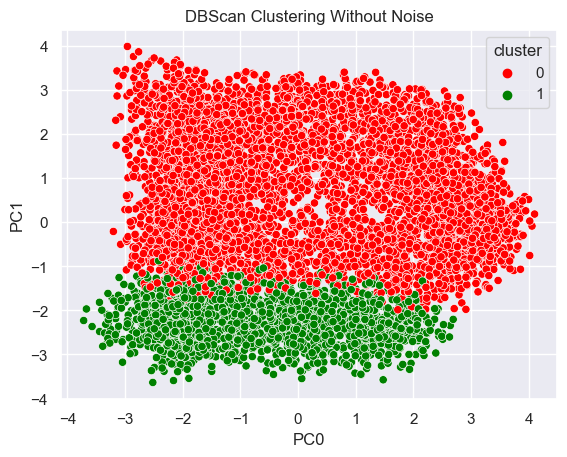

In [1188]:
# visualize the clustered dataframe with Scatter Plot
plot_scatter_plot(scaled_df_dbscan, clus_n, "DBScan Clustering Without Noise")

<div class="alert alert-block alert-warning">

<b>Noise Data !</b>

**Note: Eps determines the maximum distance between two points that are considered to be in the same cluster. If eps is too large, many points will be included in the same cluster, and if eps is too small, most points will be classified as noise.**

As the noise data is a small portion of the overall data, we can just ignore it.
</div>

In [1189]:
# dbscan dfb labels without noise
scaled_df_no_noise = scaled_df[~scaled_df.index.isin(noise_data.index)]
dbscan_labels = dbscan_labels_df[~dbscan_labels_df.index.isin(noise_data.index)]
dbscan_labels = dbscan_labels['cluster'].tolist()

<a class="anchor" id="gmm-clustering">

### 4.4 Gaussian Mixture Model (Distribution-based clustering)
</a>

> This is a Distribution-based algorithm, where a clustering involves identifying clusters based on the underlying distribution of the data..

- `Gaussian Mixture Model (GMM)` is a type of probabilistic model that assumes that the underlying data is generated from a mixture of several different Gaussian distributions. GMM is a soft clustering algorithm, meaning that each data point is assigned a probability of belonging to each cluster, rather than a hard assignment to a single cluster

__GMM Hyperparameter Tuning__

<div class="alert alert-block alert-info">

The following are some of the parameters that can be specified when using GMM:
- __`n_components`__: The optimal number of clusters can be determined using techniques such as the elbow method or silhouette score.
- __`covariance_type`__: The type of covariance matrix used to model the data. The options include "spherical", "diagonal", "tied", and "full".
- __`init_params`__: The method used to initialize the cluster means. The options include "kmeans" and "random".
- __`tol`__: The tolerance for the convergence of the algorithm.
</div>

In [1190]:
from sklearn.mixture import GaussianMixture

# Define the hyperparameter grid
param_grid = {'n_components': [optimal_k],
              'covariance_type': ['full'],
              'init_params': ['kmeans'],
              'tol': [1e-3, 1e-4, 1e-5]}
grid_, best_params = hyperparameter_tuning(model_=GaussianMixture(), grid_params=param_grid, data=scaled_df, scoring=silhouette_score)

best_params

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'n_components': 3,
 'tol': 0.001}

__GMM - Cluster Analysis__

In [1191]:
gmm_model = GaussianMixture(**best_params)
gmm_labels = gmm_model.fit_predict(scaled_df)
gmm_labels_df = pd.DataFrame({'cluster': gmm_labels}).set_index(scaled_df.index)

In [1192]:
print("Number of estimated clusters : %d" % best_params['n_components'])

Number of estimated clusters : 3


In [1193]:
scaled_df_gmm= pd.concat([scaled_df, gmm_labels_df], axis=1)
scaled_df_gmm.head()

ClaimsRate  PremMotor  CustMonVal       Age  Children  AnnualProfit  \
CustID                                                                        
1        -0.909584   0.389946    0.799582 -1.039087  0.631318      0.788106   
3        -1.258821  -1.015301    1.358081 -0.276725 -1.583988      1.358342   
4         0.995347  -1.211306   -0.997189 -0.975557  0.631318     -1.004452   
5         0.709608   0.081653   -0.761418 -0.467315  0.631318     -0.749374   
6         1.027096   0.927368   -1.030329  0.612698  0.631318     -1.031372   

             PC0       PC1  cluster  
CustID                               
1       1.832240  1.415847        1  
3       2.400893 -0.422840        2  
4      -1.736257  2.200080        1  
5      -1.208779  1.034651        1  
6      -1.675273 -0.318109        1

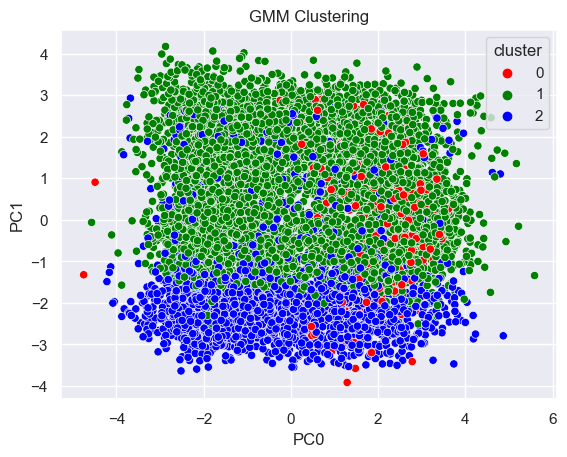

In [1194]:
# visualize the clustered dataframe with Scatter Plot
plot_scatter_plot(scaled_df_gmm, best_params['n_components'], "GMM Clustering")

<a class="anchor" id="evaluation">

### 4.5 Evaluation Of Clustering Approaches
</a>

<div class="alert alert-block alert-info">

<b>Metrics !</b>

There are several ways to evaluate the results of clustering models:

- __`Silhouette Score`__: The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with a higher score indicating a better fit.
- __`R2 Score`__: The R2 Score is a measure of proportion of the variance in the target cluster that is explained by the model. The score ranges from 0 to 1, with a higher score indicating better model performance.
- __`Davies-Bouldin Index`__: The Davies-Bouldin index is a measure of the compactness and separation of the clusters. It ranges from 0 to infinity, with a lower value indicating better clustering.
</div>

__Agglomerative Clustering Evaluation__

In [1195]:
# Calculate silhouette score for agglo model
agglo_silhouette_score = silhouette_score(scaled_df, agglo_labels)
print("Silhouette Score:", agglo_silhouette_score)

Silhouette Score: 0.2842937731964613


In [1196]:
# Calculate r2 score for agglo model
agglo_r2_score = r2_score(scaled_df, agglo_labels)
print("R² metric Score:", agglo_r2_score)

R² metric Score: 0.6217961925071077


In [1197]:
# Characterizing the final clusters
agglo_clus_chars = (df_copy.assign(cluster=scaled_df_agglo["cluster"])).groupby('cluster')
agglo_clus_chars.mean()

EducDeg     MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
cluster                                                                        
0        2.890312  2864.549219    2.722500  0.718750   -3.666878    0.973103   
1        3.009699  3416.877061    2.705141  0.376334  319.661629    0.525994   
2        2.805175  2250.642060    2.715880  0.934551  478.992831    0.262192   
3        2.507227  1524.413601    2.687911  0.881735  127.076610    0.793292   

          PremMotor  PremHousehold  PremHealth   PremLife   PremWork  \
cluster                                                                
0        364.895616     116.183062  151.333116  24.586491  24.679209   
1        282.102081     190.306644  194.181028  36.627202  35.531833   
2        393.936920     132.046296  127.292486  20.845941  21.547869   
3        231.589185     211.814028  222.392615  43.856629  43.748068   

               Age  LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
cluster                                                                      
0        54.733438     27.014375    681.677494    660.871012     20.806482   
1        65.118817     29.592629    738.748788    392.766270    345.982518   
2        43.393709     22.119229    695.669513    186.793289    508.876224   
3        30.166886     12.015112    753.400526    601.065582    152.334944   

         AcquisitionCost  
cluster                   
0              24.473360  
1              26.320888  
2              29.883393  
3              25.258334

__K-Means Evaluation__

In [1198]:
# Calculate silhouette score for k-means model
kmeans_silhouette_score = silhouette_score(scaled_df, kmeans_labels)
print("Silhouette Score:", kmeans_silhouette_score)

Silhouette Score: 0.3817892927254969


In [1199]:
# Calculate r2 score for kmeans model
kmeans_r2_score = r2_score(scaled_df, kmeans_labels)
print("R² metric Score:", kmeans_r2_score)

R² metric Score: 0.5916092115520928


In [1200]:
# Characterizing the final clusters
kmeans_clus_chars = (df_copy.assign(cluster=scaled_df_kmeans["cluster"])).groupby('cluster')
kmeans_clus_chars.describe()

EducDeg                                              MonthSal  \
          count      mean       std  min  25%  50%  75%  max    count   
cluster                                                                 
0        3448.0  2.700696  0.690000  1.0  2.0  3.0  3.0  4.0   3448.0   
1        3094.0  2.818358  0.645289  1.0  3.0  3.0  3.0  4.0   3094.0   
2        2213.0  3.058292  0.309202  1.0  3.0  3.0  3.0  4.0   2213.0   

                      ... AnnualProfit            AcquisitionCost             \
                mean  ...          75%        max           count       mean   
cluster               ...                                                      
0        2162.116009  ...     110.0628   360.6048          3448.0  24.565732   
1        2419.198772  ...     536.9819  1028.6400          3094.0  28.769774   
2        3627.814731  ...     291.2661   610.3962          2213.0  25.402373   

                                                                   
               std      min      25%      50%        75%      max  
cluster                                                            
0         3.419052 -18.1294  22.9375  24.9006  26.569275  52.9973  
1        10.157015  19.7264  23.8403  25.9985  28.120300  93.8290  
2         3.538147   8.8600  23.2760  25.0580  27.000000  64.3700  

[3 rows x 136 columns]

__DBScan Evaluation__

In [1201]:
# Calculate silhouette score for dbscan model
db_scan_silhouette_score = silhouette_score(scaled_df_dbscan, dbscan_labels)
print("Silhouette Score:", db_scan_silhouette_score)

Silhouette Score: 0.33019047040106975


In [1202]:
# Calculate r2 score for dbscan model
db_scan_r2_score = r2_score(scaled_df_dbscan, dbscan_labels)
print("R² metric Score:", db_scan_r2_score)

R² metric Score: 0.2878227390256699


In [1203]:
# Characterizing the final clusters
dbscan_clus_chars = (df_copy.assign(cluster=scaled_df_dbscan["cluster"])).groupby('cluster')
dbscan_clus_chars.describe()

EducDeg                                              MonthSal  \
          count      mean       std  min  25%  50%  75%  max    count   
cluster                                                                 
0.0      5660.0  2.783039  0.649816  1.0  2.0  3.0  3.0  4.0   5660.0   
1.0      1774.0  3.075536  0.296509  1.0  3.0  3.0  3.0  4.0   1774.0   

                      ... AnnualProfit           AcquisitionCost             \
                mean  ...          75%       max           count       mean   
cluster               ...                                                     
0.0      2301.887809  ...    419.40120  709.5648          5660.0  26.718699   
1.0      3684.807497  ...    323.01805  604.7760          1774.0  25.528537   

                                                                    
              std      min        25%      50%        75%      max  
cluster                                                             
0.0      7.829267   3.6092  23.341200  25.2357  27.296800  93.8290  
1.0      3.714384  17.2700  23.328625  25.0815  26.995275  63.7081  

[2 rows x 136 columns]

__GMM Evaluation__

In [1204]:
# Calculate silhouette score for gmm model
gmm_silhouette_score = silhouette_score(scaled_df, gmm_labels)
print("Silhouette Score:", gmm_silhouette_score)

Silhouette Score: 0.0840445551268359


In [1205]:
# Calculate r2 score for dbscan model
gmm_r2_score = r2_score(scaled_df, gmm_labels)
print("R² metric Score:", gmm_r2_score)

R² metric Score: 0.23887573627726366


In [1206]:
# Characterizing the final clusters
gmm_clus_chars = (df_copy.assign(cluster=scaled_df_gmm["cluster"])).groupby('cluster')
gmm_clus_chars.describe()

EducDeg                                              MonthSal  \
          count      mean       std  min  25%  50%  75%  max    count   
cluster                                                                 
0         376.0  3.045213  0.593816  1.0  3.0  3.0  3.0  4.0    376.0   
1        5943.0  2.750294  0.661668  1.0  2.0  3.0  3.0  4.0   5943.0   
2        2436.0  3.000821  0.431795  1.0  3.0  3.0  3.0  4.0   2436.0   

                      ... AnnualProfit            AcquisitionCost             \
                mean  ...          75%        max           count       mean   
cluster               ...                                                      
0        2605.412234  ...    488.30935   613.0000           376.0  52.774346   
1        2310.603315  ...    421.85880  1028.6400          5943.0  25.057093   
2        3389.482964  ...    374.40360   914.9364          2436.0  25.112610   

                                                                   
               std      min       25%       50%       75%     max  
cluster                                                            
0        13.863566 -18.1294  42.52185  51.28755  61.08475  93.829  
1         3.036778  -0.6400  23.19840  25.00000  26.97400  50.550  
2         2.488538   7.6114  23.21980  25.01060  26.95195  37.550  

[3 rows x 136 columns]

<a class="anchor" id="profiling">

### Cluster Interpreting And Profiling
</a>

> Interpreting the results of a clustering analysis involves examining the characteristics of the clusters that were identified and determining what they mean in the context of the problem being solved. This can involve looking at the size, shape, and distribution of the clusters, as well as the characteristics of the data points within each cluster.

> Cluster profiling is the process of examining the characteristics of the data points within each cluster in order to understand the similarities and differences between the clusters.
This can be done by analyzing the statistical properties of the data within each cluster, such as the mean, median, and standard deviation of each feature, as well as by examining the distribution of values within each cluster.


**Top scored clusters Agglomerative & Kmeans**

<a class="anchor" id="clusters-characteristics">

#### 5.1 Clustering Using Different Perspectives
</a>

In [1207]:
agglo_model_ = AgglomerativeClustering(affinity='euclidean', linkage='ward')
kmeans_model_ = KMeans(init='k-means++', n_init=15, random_state=42)

- __Demographic/Behavioral Perspective__

In [1208]:
# Obtaining the R² scores for each cluster solution on demographic variables
demo_r2_scores, demo_silhouette_scores = models_scores(demographic_df[demographic_selected_features], {'agglo': agglo_model_, 'kmeans': kmeans_model_})

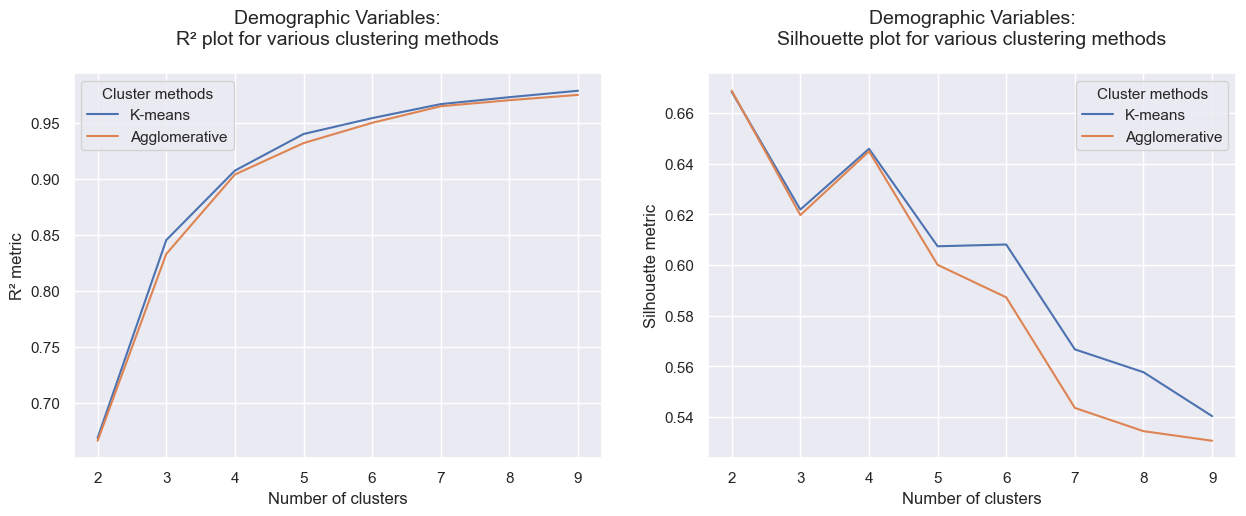

In [1209]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(demo_r2_scores, label=demo_r2_scores.columns)
ax2.plot(demo_silhouette_scores, label=demo_silhouette_scores.columns)

# customizations

ax1.set_title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=14)
ax2.set_title("Demographic Variables:\nSilhouette plot for various clustering methods\n", fontsize=14)

ax1.set_xlabel("Number of clusters")
ax2.set_xlabel("Number of clusters")

ax1.set_ylabel("R² metric")
ax2.set_ylabel("Silhouette metric")

ax1.legend(title="Cluster methods", title_fontsize=11)
ax2.legend(title="Cluster methods", title_fontsize=11)

plt.savefig(os.path.join(figures_path, 'demographics_vars_metrics.png'), dpi=200)
plt.show()

- __Insurance/Coverage Perspective__

In [1210]:
# Obtaining the R² scores for each cluster solution on coverage variables
pref_r2_scores, pref_silhouette_scores = models_scores(coverage_df[coverage_selected_features], {'agglo': agglo_model, 'kmeans': kmeans_model})

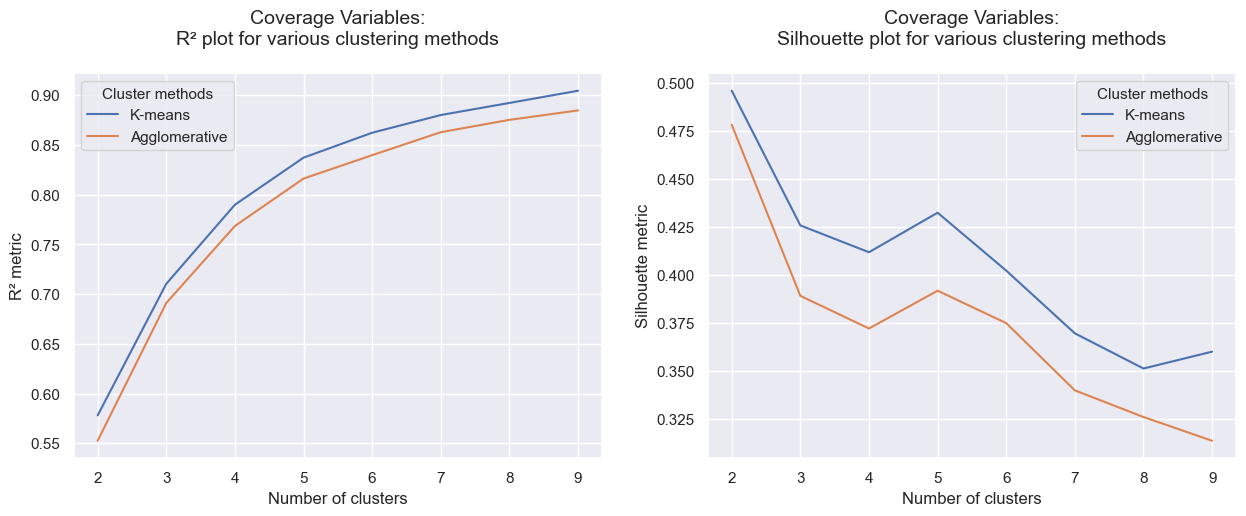

In [1211]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pref_r2_scores, label=pref_r2_scores.columns)
ax2.plot(pref_silhouette_scores, label=pref_r2_scores.columns)

# customizations

ax1.set_title("Coverage Variables:\nR² plot for various clustering methods\n", fontsize=14)
ax2.set_title("Coverage Variables:\nSilhouette plot for various clustering methods\n", fontsize=14)

ax1.set_xlabel("Number of clusters")
ax2.set_xlabel("Number of clusters")

ax1.set_ylabel("R² metric")
ax2.set_ylabel("Silhouette metric")

ax1.legend(title="Cluster methods", title_fontsize=11)
ax2.legend(title="Cluster methods", title_fontsize=11)

plt.savefig(os.path.join(figures_path, 'coverage_vars_metrics.png'), dpi=200)
plt.show()

<a class="anchor" id="clusters-characteristics">

#### 5.2 Understand Clusters Characteristics
</a>

- __Demographic/Behavioral Perspective__

In [1212]:
kmeans_demographic = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=42)
demographic_labels = kmeans_demographic.fit_predict(demographic_df[demographic_selected_features])
demographic_labels_df = pd.DataFrame({'demographic_cluster': demographic_labels}).set_index(demographic_df.index)

In [1213]:
demographic_clustered_df= pd.concat([demographic_df, demographic_labels_df], axis=1)
demographic_clustered_df

Age   EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                       
1      -1.039087 -1.353420 -0.491930   -1.352432  0.631318   
3      -0.276725 -2.978823 -0.381743    0.228520 -1.583988   
4      -0.975557  0.271984 -1.679737    1.018996  0.631318   
5      -0.467315  0.271984 -0.948100    1.018996  0.631318   
6       0.612698 -1.353420 -0.063305    1.018996  0.631318   
...          ...       ...       ...         ...       ...   
10290   1.438591  0.271984  0.963630    1.018996 -1.583988   
10292   1.057410  1.897387  0.622053   -0.561956 -1.583988   
10294  -0.657906  0.271984  0.324550   -1.352432  0.631318   
10295  -0.721436 -2.978823 -0.718913   -0.561956  0.631318   
10296  -0.975557  1.897387  0.211058   -1.352432  0.631318   

        demographic_cluster  
CustID                       
1                         0  
3                         1  
4                         0  
5                         0  
6                         2  
...                     ...  
10290                     1  
10292                     1  
10294                     0  
10295                     0  
10296                     0  

[8755 rows x 6 columns]

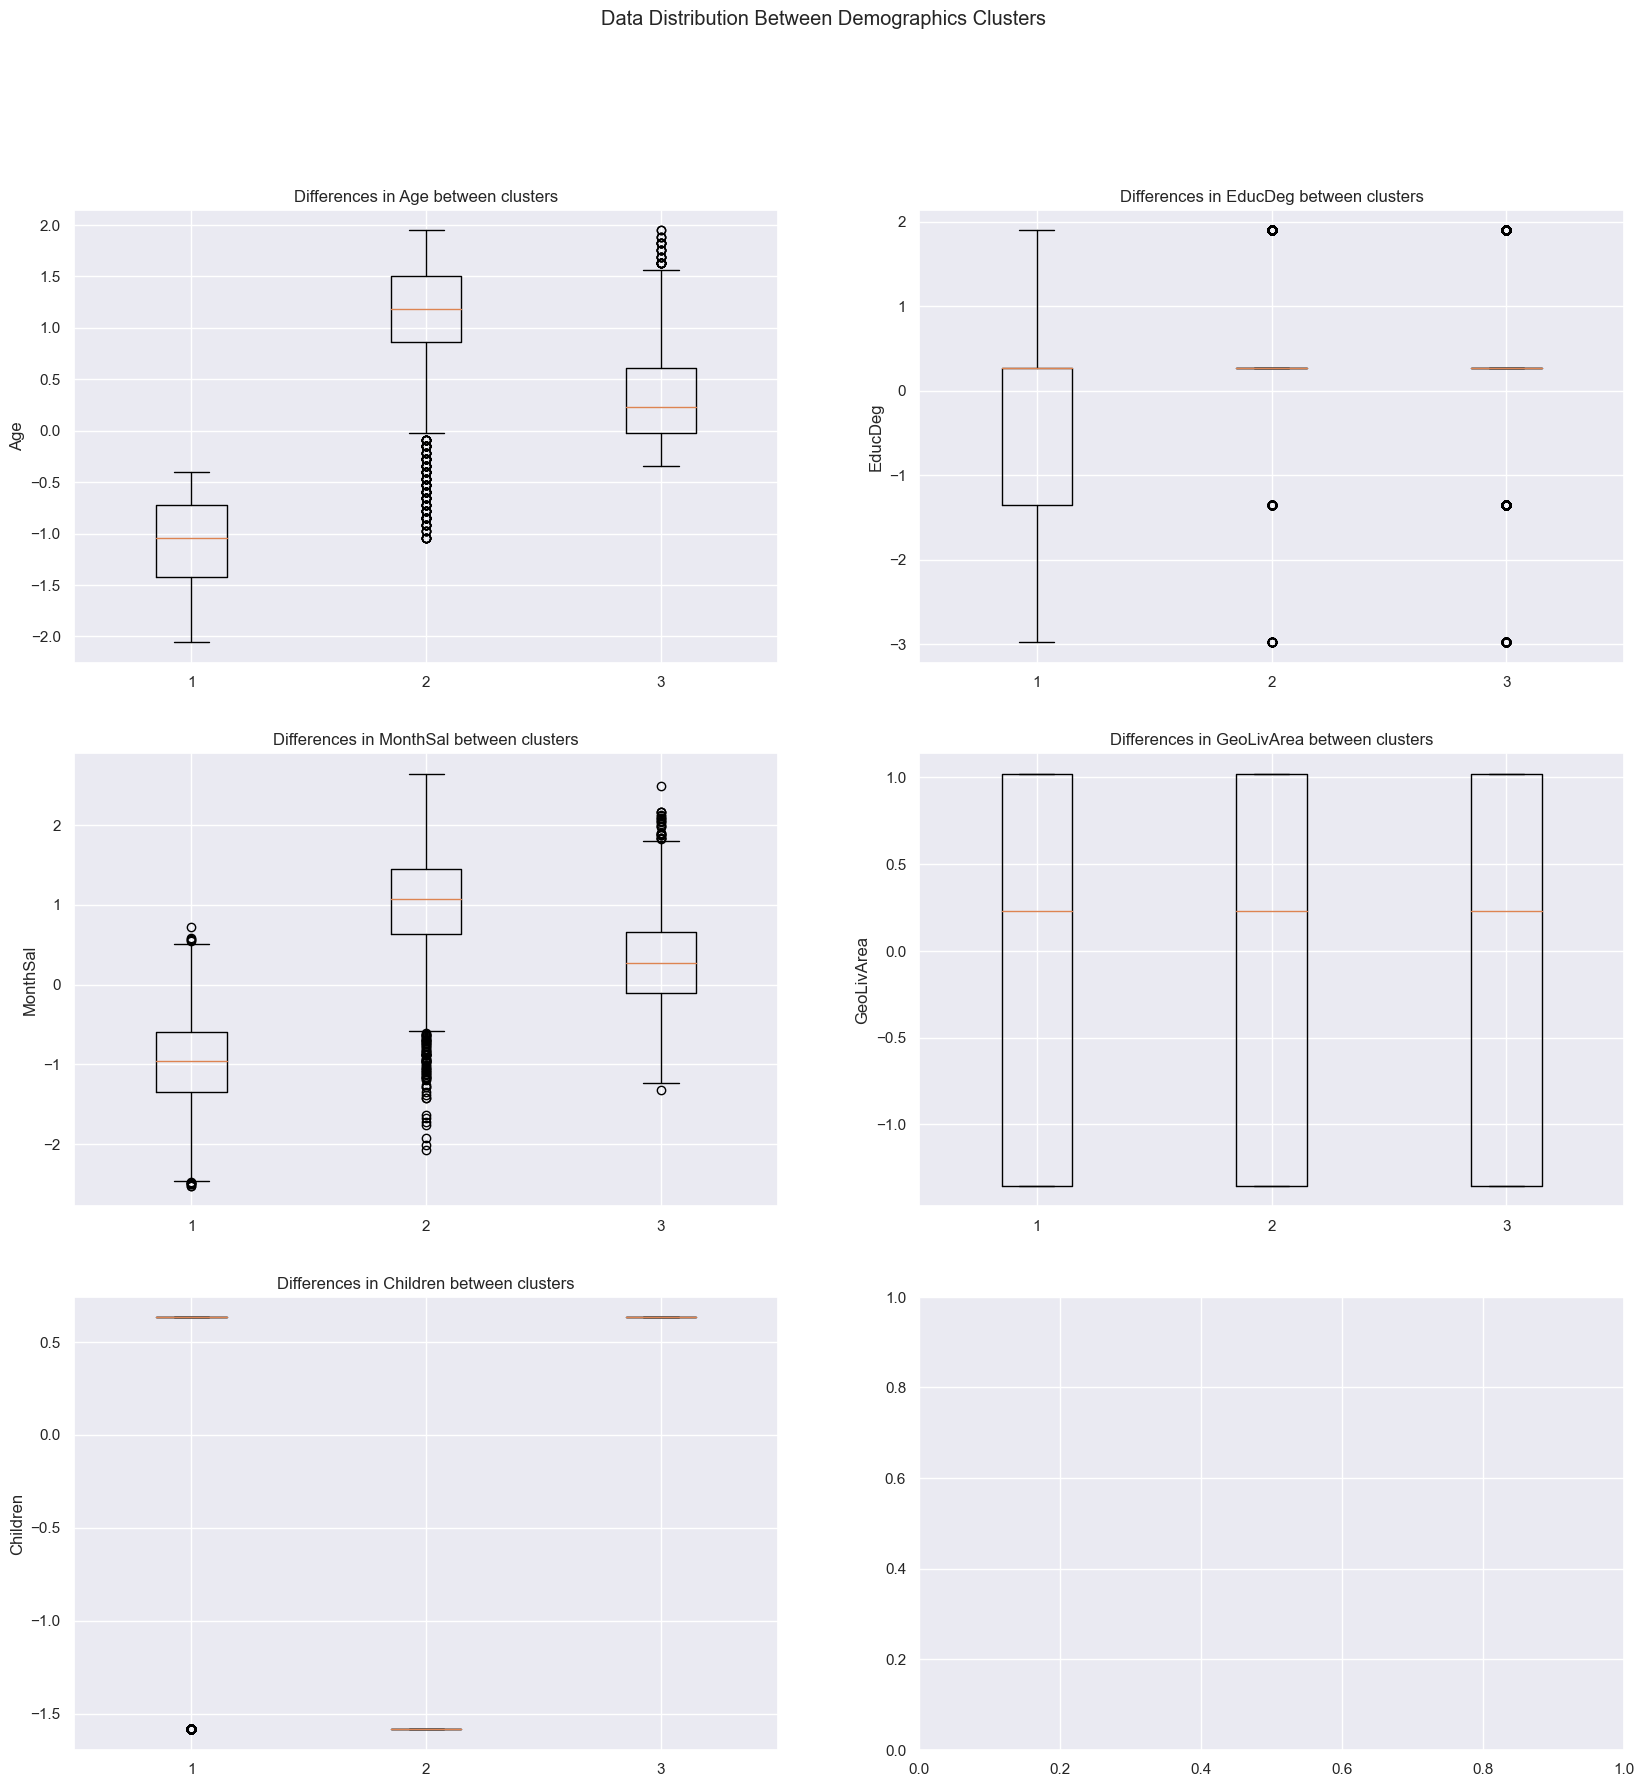

In [1214]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(demographic_clustered_df.columns) / 3), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), demographic_features): # Notice the zip() function and flatten() method
    cluster_0_values = demographic_clustered_df[demographic_clustered_df['demographic_cluster'] == 0][feat]
    cluster_1_values = demographic_clustered_df[demographic_clustered_df['demographic_cluster'] == 1][feat]
    cluster_2_values = demographic_clustered_df[demographic_clustered_df['demographic_cluster'] == 2][feat]
    # Create a box plot for each cluster.
    ax.boxplot([cluster_0_values, cluster_1_values, cluster_2_values])

    # Set the y-axis label and the title.
    ax.set_ylabel(feat)
    ax.set_title('Differences in ' + feat + ' between clusters')

# Layout
title = "Data Distribution Between Demographics Clusters"
plt.suptitle(title)
plt.savefig(os.path.join(figures_path, title.replace(" ", "_") + '_boxplots.png'), dpi=200)
plt.show()

In [1215]:
original_demographic_clustered_df = pd.concat([df_copy[demographic_features], demographic_clustered_df['demographic_cluster']], axis=1)
original_demographic_clustered_df.groupby(['demographic_cluster']).mean()

Age   EducDeg     MonthSal  GeoLivArea  Children
demographic_cluster                                                        
0                    33.629169  2.600667  1740.640085    2.697696  0.958763
1                    66.965663  3.036456  3508.693726    2.753709  0.000000
2                    55.514526  2.924467  2889.183828    2.692382  1.000000

<div class="alert alert-block alert-warning">

<b>Insights Into Customers Demographics!</b>

- The first cluster (demographic cluster 0) has a relatively young average age, lower education level, and lower monthly salary compared to the other clusters. This suggests that the customers in this cluster may be less financially secure or may have fewer resources available to them.

- The second cluster (demographic cluster 1) has a much older average age and higher education level compared to the other clusters. This suggests that the customers in this cluster may be more financially secure and may have more resources available to them.

- The third cluster (demographic cluster 2) has an average age and education level that is intermediate between the first and second clusters. This suggests that the customers in this cluster may be more financially secure than those in the first cluster, but less financially secure than those in the second cluster.
</div>

- __Insurance/Coverage Perspective__

In [1216]:
kmeans_coverage = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=42)
coverage_labels = kmeans_coverage.fit_predict(coverage_df[coverage_selected_features])
coverage_labels_df = pd.DataFrame({'coverage_cluster': coverage_labels}).set_index(coverage_df.index)

In [1217]:
coverage_clustered_df= pd.concat([coverage_df, coverage_labels_df], axis=1)
coverage_clustered_df

LoyaltyYears  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                                   
1          -0.876849    0.799582   -0.909584   0.389946      -0.509198   
3           0.120571    1.358081   -1.258821  -1.015301       0.483708   
4          -0.766024   -0.997189    0.995347  -1.211306      -0.756313   
5           0.120571   -0.761418    0.709608   0.081653      -0.725851   
6           0.674694   -1.030329    1.027096   0.927368      -0.923679   
...              ...         ...         ...        ...            ...   
10290       0.674694    0.188393   -0.020616  -0.835856       0.799274   
10292       0.896343   -0.920977    0.900101   0.538089      -0.714556   
10294      -0.211902    1.445807   -1.481063   0.619986      -0.144003   
10295      -0.322726    0.208484   -0.084114  -1.160711       0.392323   
10296      -0.766024    1.173329   -1.290570   0.706520      -0.406519   

        PremHealth  PremLife  PremWork  TotalPremium  ClaimsAmount  \
CustID                                                               
1        -0.288371  0.602970 -0.463164     -0.363640     -0.952499   
3        -0.573783  1.991797  2.473060      0.240365     -1.177447   
4         1.871355  0.190982 -0.053816     -0.885867      0.491572   
5         0.186399 -0.393639  0.414879     -0.655984      0.369372   
6        -0.701944 -0.809510 -0.792787     -0.978914      0.467642   
...            ...       ...       ...           ...           ...   
10290    -0.097572  2.478275  1.431993      0.954885      0.323529   
10292     0.071343 -0.711367 -0.538598     -0.556819      0.583035   
10294    -0.342230 -0.609341 -0.892175     -0.116693     -1.440994   
10295     0.393186  1.199241  2.969641      0.516611      0.099532   
10296    -0.355334 -0.813394 -0.606167     -0.331444     -1.292017   

        AnnualProfit  AcquisitionCost  coverage_cluster  
CustID                                                   
1           0.788106        -0.179628                 1  
3           1.358342         0.332697                 1  
4          -1.004452        -0.472633                 2  
5          -0.749374         0.207091                 2  
6          -1.031372        -0.279708                 2  
...              ...              ...               ...  
10290       0.195197         0.264699                 0  
10292      -0.916364        -0.070981                 2  
10294       1.433622        -0.048233                 1  
10295       0.184127        -0.736697                 0  
10296       1.159122        -0.178586                 1  

[8755 rows x 13 columns]

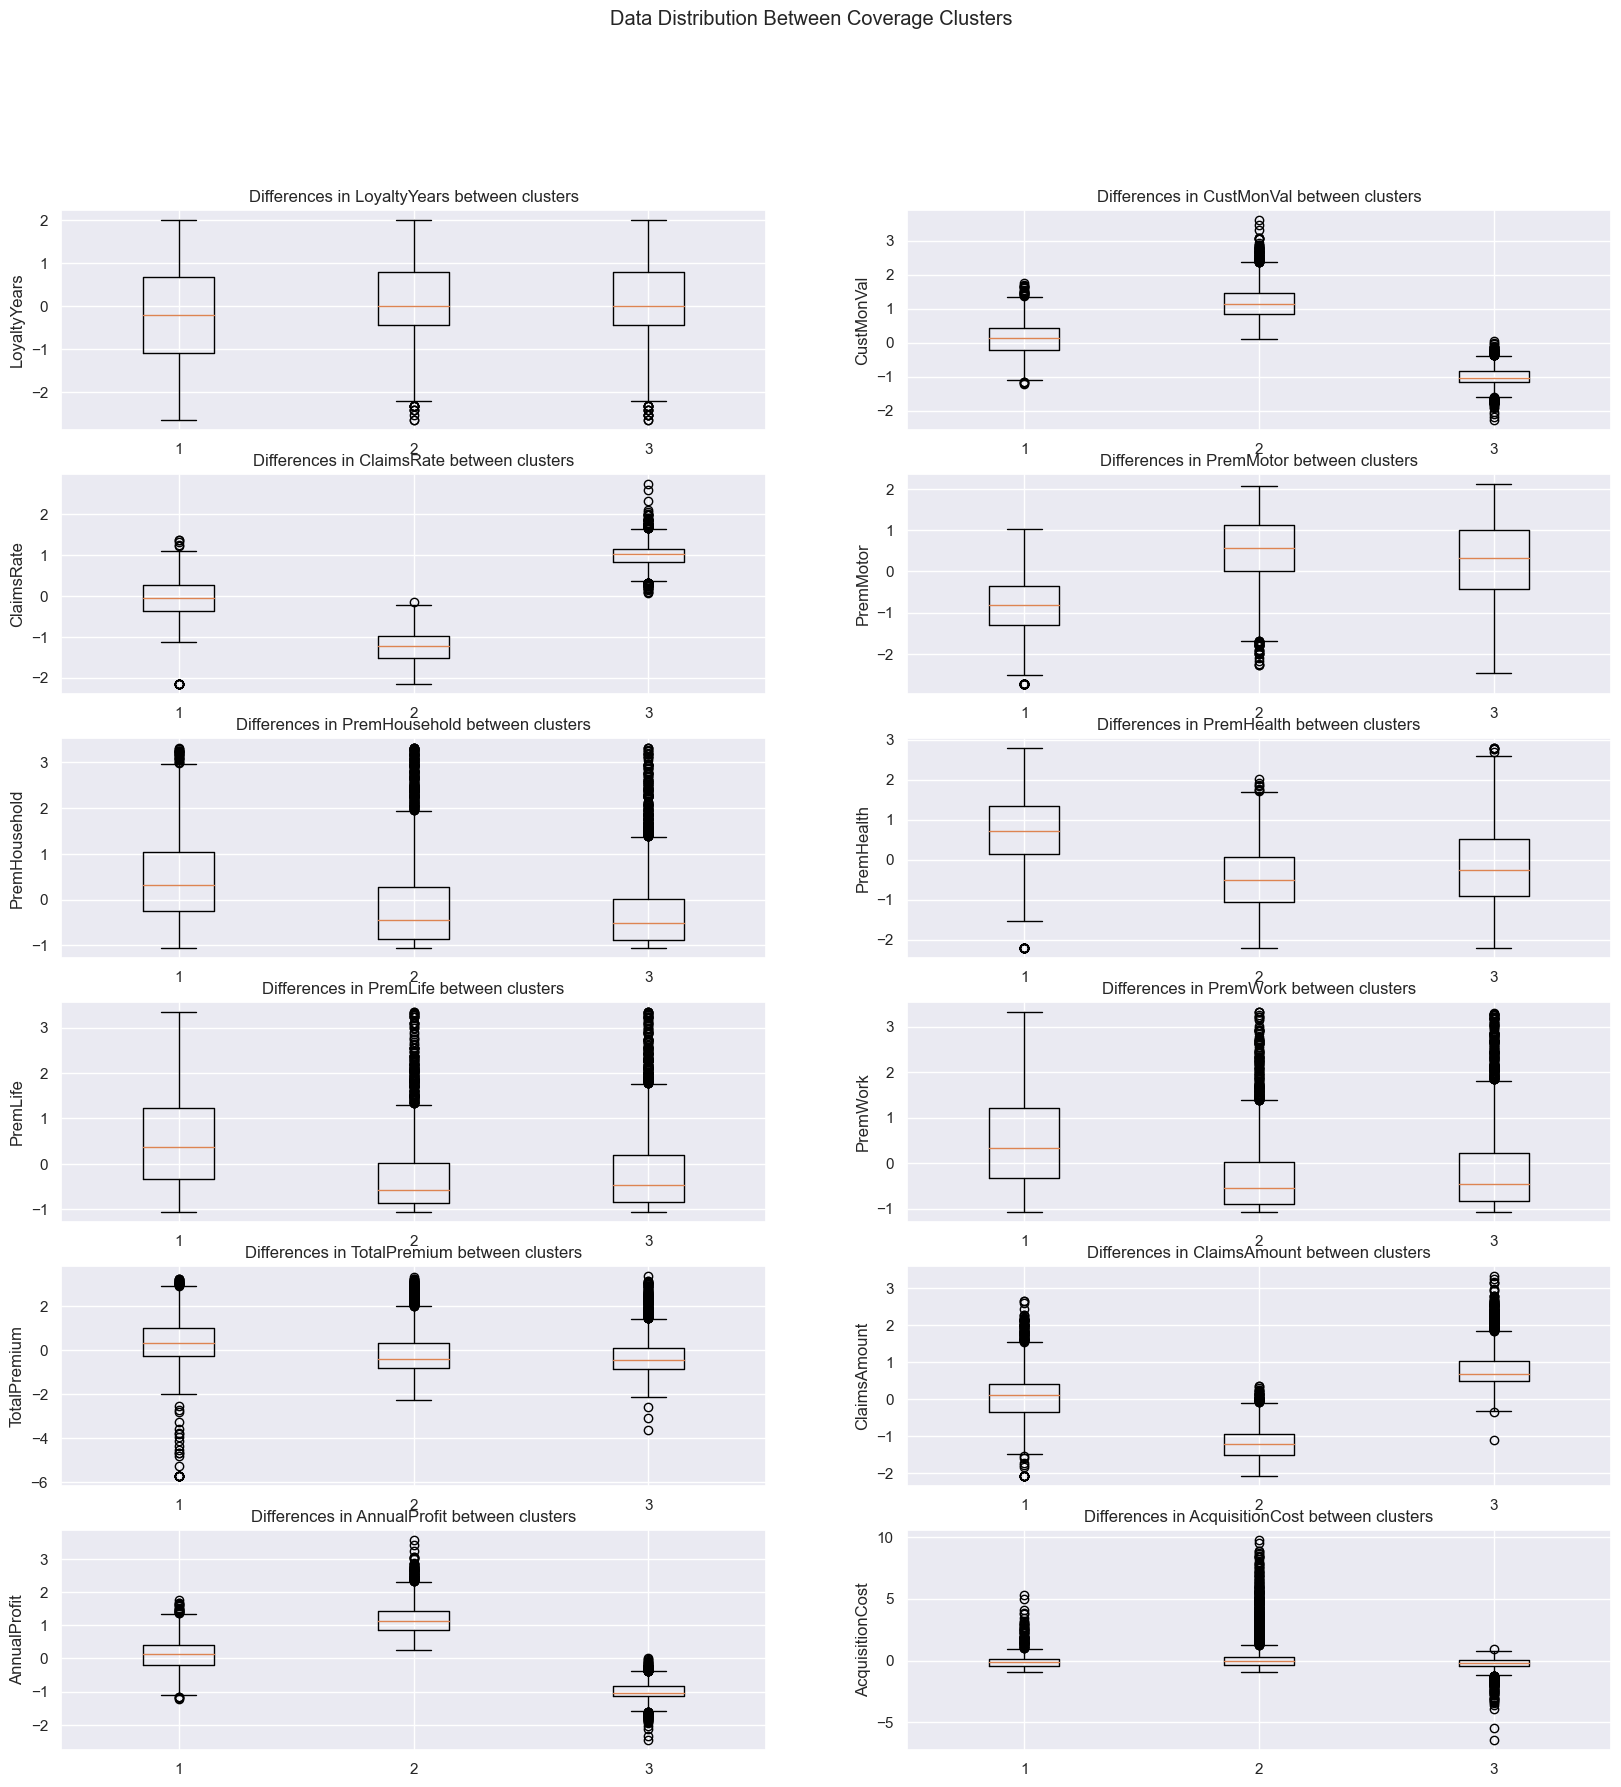

In [1218]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(6, ceil(len(coverage_clustered_df.columns) / 8), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), coverage_features): # Notice the zip() function and flatten() method
    cluster_0_values = coverage_clustered_df[coverage_clustered_df['coverage_cluster'] == 0][feat]
    cluster_1_values = coverage_clustered_df[coverage_clustered_df['coverage_cluster'] == 1][feat]
    cluster_2_values = coverage_clustered_df[coverage_clustered_df['coverage_cluster'] == 2][feat]
    # Create a box plot for each cluster.
    ax.boxplot([cluster_0_values, cluster_1_values, cluster_2_values])

    # Set the y-axis label and the title.
    ax.set_ylabel(feat)
    ax.set_title('Differences in ' + feat + ' between clusters')

# Layout
title = "Data Distribution Between Coverage Clusters"
plt.suptitle(title)
plt.savefig(os.path.join(figures_path, title.replace(" ", "_") + '_boxplots.png'), dpi=200)
plt.show()

In [1219]:
original_coverage_clustered_df = pd.concat([df_copy[coverage_features], coverage_clustered_df['coverage_cluster']], axis=1)
original_coverage_clustered_df.groupby(['coverage_cluster']).mean()

LoyaltyYears  CustMonVal  ClaimsRate   PremMotor  \
coverage_cluster                                                     
0                    22.280634  228.903788    0.658319  226.412775   
1                    24.637486  467.701455    0.285458  386.189798   
2                    24.564807  -16.431001    0.989013  360.593330   

                  PremHousehold  PremHealth   PremLife   PremWork  \
coverage_cluster                                                    
0                    221.647004  223.137078  44.970108  44.085640   
1                    138.104171  132.243808  22.081732  22.072574   
2                    115.676409  155.450352  24.800303  25.249207   

                  TotalPremium  ClaimsAmount  AnnualProfit  AcquisitionCost  
coverage_cluster                                                             
0                   760.252605    505.767327    254.485278        25.581490  
1                   700.692084    203.689023    497.003061        29.301606  
2                   681.769602    673.757322      8.012280        24.443281

<div class="alert alert-block alert-warning">

<b>Insights Into Customers Coverage!</b>

- The first cluster (coverage cluster 0) This cluster has relatively high premiums for motor, household, health, and life coverage, and relatively high claims amount and acquisition cost. This suggests that the customers in this cluster may be more likely to make claims and may be more expensive for the insurance company to cover.

- The second cluster (coverage cluster 1) This cluster has relatively high premiums for motor and work coverage, and relatively low premiums for household, health, and life coverage, as well as relatively low claims amount and acquisition cost. This suggests that the customers in this cluster may be less likely to make claims and may be less expensive for the insurance company to cover.

- The third cluster (coverage cluster 2) This cluster also has relatively high premiums for motor and work coverage, and relatively low premiums for household, health, and life coverage, as well as relatively high claims amount and acquisition cost. This suggests that the customers in this cluster may be more likely to make claims and may be more expensive for the insurance company to cover, similar to the customers in the first cluster.

**It would be useful to further investigate these characteristics and behaviors to understand the differences between the clusters and how they may impact the business. For example, understanding why customers in cluster 1 have higher customer monetary values and lower claims rates may help the business target similar customers or identify strategies to increase customer monetary values and reduce claims rates for other customers. Similarly, understanding why customers in cluster 2 have higher premiums for health and life insurance, as well as higher total premiums and claims amounts, may help the business tailor its insurance offerings or identify opportunities to upsell these customers on additional insurance products.**
</div>

<a class="anchor" id="clusters-characteristics">

#### 5.3 Merge Perspectives using Hierarchical Clustering
</a>

In [1220]:
perspectives_clustered_df = pd.concat([demographic_clustered_df, coverage_clustered_df], axis=1)
perspectives_clustered_df

Age   EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                       
1      -1.039087 -1.353420 -0.491930   -1.352432  0.631318   
3      -0.276725 -2.978823 -0.381743    0.228520 -1.583988   
4      -0.975557  0.271984 -1.679737    1.018996  0.631318   
5      -0.467315  0.271984 -0.948100    1.018996  0.631318   
6       0.612698 -1.353420 -0.063305    1.018996  0.631318   
...          ...       ...       ...         ...       ...   
10290   1.438591  0.271984  0.963630    1.018996 -1.583988   
10292   1.057410  1.897387  0.622053   -0.561956 -1.583988   
10294  -0.657906  0.271984  0.324550   -1.352432  0.631318   
10295  -0.721436 -2.978823 -0.718913   -0.561956  0.631318   
10296  -0.975557  1.897387  0.211058   -1.352432  0.631318   

        demographic_cluster  LoyaltyYears  CustMonVal  ClaimsRate  PremMotor  \
CustID                                                                         
1                         0     -0.876849    0.799582   -0.909584   0.389946   
3                         1      0.120571    1.358081   -1.258821  -1.015301   
4                         0     -0.766024   -0.997189    0.995347  -1.211306   
5                         0      0.120571   -0.761418    0.709608   0.081653   
6                         2      0.674694   -1.030329    1.027096   0.927368   
...                     ...           ...         ...         ...        ...   
10290                     1      0.674694    0.188393   -0.020616  -0.835856   
10292                     1      0.896343   -0.920977    0.900101   0.538089   
10294                     0     -0.211902    1.445807   -1.481063   0.619986   
10295                     0     -0.322726    0.208484   -0.084114  -1.160711   
10296                     0     -0.766024    1.173329   -1.290570   0.706520   

        PremHousehold  PremHealth  PremLife  PremWork  TotalPremium  \
CustID                                                                
1           -0.509198   -0.288371  0.602970 -0.463164     -0.363640   
3            0.483708   -0.573783  1.991797  2.473060      0.240365   
4           -0.756313    1.871355  0.190982 -0.053816     -0.885867   
5           -0.725851    0.186399 -0.393639  0.414879     -0.655984   
6           -0.923679   -0.701944 -0.809510 -0.792787     -0.978914   
...               ...         ...       ...       ...           ...   
10290        0.799274   -0.097572  2.478275  1.431993      0.954885   
10292       -0.714556    0.071343 -0.711367 -0.538598     -0.556819   
10294       -0.144003   -0.342230 -0.609341 -0.892175     -0.116693   
10295        0.392323    0.393186  1.199241  2.969641      0.516611   
10296       -0.406519   -0.355334 -0.813394 -0.606167     -0.331444   

        ClaimsAmount  AnnualProfit  AcquisitionCost  coverage_cluster  
CustID                                                                 
1          -0.952499      0.788106        -0.179628                 1  
3          -1.177447      1.358342         0.332697                 1  
4           0.491572     -1.004452        -0.472633                 2  
5           0.369372     -0.749374         0.207091                 2  
6           0.467642     -1.031372        -0.279708                 2  
...              ...           ...              ...               ...  
10290       0.323529      0.195197         0.264699                 0  
10292       0.583035     -0.916364        -0.070981                 2  
10294      -1.440994      1.433622        -0.048233                 1  
10295       0.099532      0.184127        -0.736697                 0  
10296      -1.292017      1.159122        -0.178586                 1  

[8755 rows x 19 columns]

In [1221]:
perspectives_clustered_df.groupby(['demographic_cluster', 'coverage_cluster'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('demographic_cluster', 'coverage_cluster', 0)

coverage_cluster        0     1     2
demographic_cluster                  
0                    1115   932  1251
1                     975   536   848
2                     497  1205  1396

In [1222]:
# Centroids of the concatenated cluster labels
perspectives_centroids = perspectives_clustered_df.groupby(['demographic_cluster', 'coverage_cluster']).mean()
perspectives_centroids

Age   EducDeg  MonthSal  \
demographic_cluster coverage_cluster                                 
0                   0                -1.225518 -0.684308 -1.144301   
                    1                -0.974398 -0.181455 -0.884111   
                    2                -0.983225 -0.249029 -0.885853   
1                   0                 1.144658  0.263648  1.043190   
                    1                 0.925371  0.393282  0.850168   
                    2                 1.034485  0.369738  0.976650   
2                   0                 0.498420  0.056135  0.442532   
                    1                 0.278598  0.218028  0.256092   
                    2                 0.309382  0.122949  0.271176   

                                      GeoLivArea  Children  LoyaltyYears  \
demographic_cluster coverage_cluster                                       
0                   0                  -0.050096  0.496214     -1.212602   
                    1                   0.020723  0.550502     -0.784693   
                    2                   0.001677  0.571110     -0.796410   
1                   0                   0.002322 -1.583988      0.600242   
                    1                   0.020578 -1.583988      0.558287   
                    2                   0.078442 -1.583988      0.587916   
2                   0                   0.018575  0.631318      0.601777   
                    1                  -0.028630  0.631318      0.536922   
                    2                  -0.014398  0.631318      0.537672   

                                      CustMonVal  ClaimsRate  PremMotor  \
demographic_cluster coverage_cluster                                      
0                   0                   0.096606   -0.041203  -0.960232   
                    1                   1.163374   -1.174169   0.270475   
                    2                  -0.996621    0.990678   0.062686   
1                   0                   0.117583   -0.067051  -0.920602   
                    1                   1.202296   -1.123118   0.093984   
                    2                  -1.010948    1.003771  -0.200819   
2                   0                   0.140841   -0.076384  -0.451228   
                    1                   1.207720   -1.346216   0.803929   
                    2                  -0.983021    0.986569   0.725779   

                                      PremHousehold  PremHealth  PremLife  \
demographic_cluster coverage_cluster                                        
0                   0                      0.504142    0.829946  0.578527   
                    1                     -0.021338   -0.228030 -0.225300   
                    2                     -0.235918    0.089045 -0.122170   
1                   0                      0.422881    0.886490  0.493789   
                    1                      0.196553   -0.131903 -0.065683   
                    2                     -0.091248    0.348407  0.040368   
2                   0                      0.455537    0.134971  0.497141   
                    1                     -0.309821   -0.814981 -0.411155   
                    2                     -0.387141   -0.715162 -0.368447   

                                      PremWork  TotalPremium  ClaimsAmount  \
demographic_cluster coverage_cluster                                         
0                   0                 0.570292      0.429515      0.140311   
                    1                -0.235474     -0.006630     -1.122707   
                    2                -0.089512     -0.209789      0.846390   
1                   0                 0.475027      0.366448      0.087177   
                    1                -0.077297      0.209077     -1.039325   
                    2                -0.016587     -0.083024      0.927344   
2                   0                 0.438691      0.392065      0.078700   
                    1                -0.399905     -0.26723

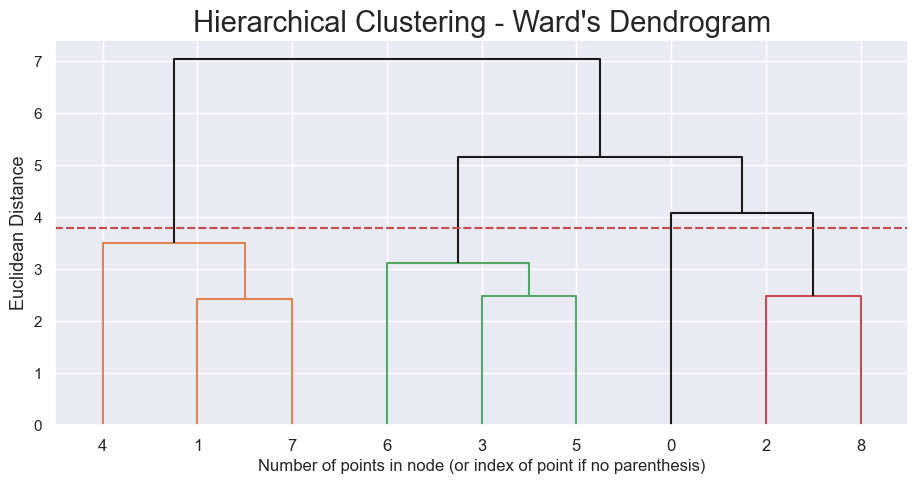

In [1223]:
plot_dendrogram(data=perspectives_centroids, y_threshold= 3.8, distance_threshold=0, n_clusters=None, linkage='ward', affinity='euclidean')

In [1224]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=4)
merged_perspectives_labels = hclust.fit_predict(perspectives_centroids)
perspectives_centroids['hclust_clusters'] = merged_perspectives_labels

perspectives_centroids

Age   EducDeg  MonthSal  \
demographic_cluster coverage_cluster                                 
0                   0                -1.225518 -0.684308 -1.144301   
                    1                -0.974398 -0.181455 -0.884111   
                    2                -0.983225 -0.249029 -0.885853   
1                   0                 1.144658  0.263648  1.043190   
                    1                 0.925371  0.393282  0.850168   
                    2                 1.034485  0.369738  0.976650   
2                   0                 0.498420  0.056135  0.442532   
                    1                 0.278598  0.218028  0.256092   
                    2                 0.309382  0.122949  0.271176   

                                      GeoLivArea  Children  LoyaltyYears  \
demographic_cluster coverage_cluster                                       
0                   0                  -0.050096  0.496214     -1.212602   
                    1                   0.020723  0.550502     -0.784693   
                    2                   0.001677  0.571110     -0.796410   
1                   0                   0.002322 -1.583988      0.600242   
                    1                   0.020578 -1.583988      0.558287   
                    2                   0.078442 -1.583988      0.587916   
2                   0                   0.018575  0.631318      0.601777   
                    1                  -0.028630  0.631318      0.536922   
                    2                  -0.014398  0.631318      0.537672   

                                      CustMonVal  ClaimsRate  PremMotor  \
demographic_cluster coverage_cluster                                      
0                   0                   0.096606   -0.041203  -0.960232   
                    1                   1.163374   -1.174169   0.270475   
                    2                  -0.996621    0.990678   0.062686   
1                   0                   0.117583   -0.067051  -0.920602   
                    1                   1.202296   -1.123118   0.093984   
                    2                  -1.010948    1.003771  -0.200819   
2                   0                   0.140841   -0.076384  -0.451228   
                    1                   1.207720   -1.346216   0.803929   
                    2                  -0.983021    0.986569   0.725779   

                                      PremHousehold  PremHealth  PremLife  \
demographic_cluster coverage_cluster                                        
0                   0                      0.504142    0.829946  0.578527   
                    1                     -0.021338   -0.228030 -0.225300   
                    2                     -0.235918    0.089045 -0.122170   
1                   0                      0.422881    0.886490  0.493789   
                    1                      0.196553   -0.131903 -0.065683   
                    2                     -0.091248    0.348407  0.040368   
2                   0                      0.455537    0.134971  0.497141   
                    1                     -0.309821   -0.814981 -0.411155   
                    2                     -0.387141   -0.715162 -0.368447   

                                      PremWork  TotalPremium  ClaimsAmount  \
demographic_cluster coverage_cluster                                         
0                   0                 0.570292      0.429515      0.140311   
                    1                -0.235474     -0.006630     -1.122707   
                    2                -0.089512     -0.209789      0.846390   
1                   0                 0.475027      0.366448      0.087177   
                    1                -0.077297      0.209077     -1.039325   
                    2                -0.016587     -0.083024      0.927344   
2                   0                 0.438691      0.392065      0.078700   
                    1                -0.399905     -0.26723

In [1225]:
cluster_mapper = perspectives_centroids['hclust_clusters'].to_dict()
cluster_mapper

{(0, 0): 3,
 (0, 1): 0,
 (0, 2): 1,
 (1, 0): 2,
 (1, 1): 0,
 (1, 2): 2,
 (2, 0): 2,
 (2, 1): 0,
 (2, 2): 1}

In [1226]:
perspectives_clustered_df['cluster'] = perspectives_clustered_df.apply(
    lambda row: cluster_mapper[
        (row['demographic_cluster'], row['coverage_cluster'])
    ], axis=1
)

In [1227]:
perspectives_clustered_df.drop(columns=['demographic_cluster', 'coverage_cluster'], inplace=True)

In [1228]:
perspectives_clustered_df

Age   EducDeg  MonthSal  GeoLivArea  Children  LoyaltyYears  \
CustID                                                                     
1      -1.039087 -1.353420 -0.491930   -1.352432  0.631318     -0.876849   
3      -0.276725 -2.978823 -0.381743    0.228520 -1.583988      0.120571   
4      -0.975557  0.271984 -1.679737    1.018996  0.631318     -0.766024   
5      -0.467315  0.271984 -0.948100    1.018996  0.631318      0.120571   
6       0.612698 -1.353420 -0.063305    1.018996  0.631318      0.674694   
...          ...       ...       ...         ...       ...           ...   
10290   1.438591  0.271984  0.963630    1.018996 -1.583988      0.674694   
10292   1.057410  1.897387  0.622053   -0.561956 -1.583988      0.896343   
10294  -0.657906  0.271984  0.324550   -1.352432  0.631318     -0.211902   
10295  -0.721436 -2.978823 -0.718913   -0.561956  0.631318     -0.322726   
10296  -0.975557  1.897387  0.211058   -1.352432  0.631318     -0.766024   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
1         0.799582   -0.909584   0.389946      -0.509198   -0.288371   
3         1.358081   -1.258821  -1.015301       0.483708   -0.573783   
4        -0.997189    0.995347  -1.211306      -0.756313    1.871355   
5        -0.761418    0.709608   0.081653      -0.725851    0.186399   
6        -1.030329    1.027096   0.927368      -0.923679   -0.701944   
...            ...         ...        ...            ...         ...   
10290     0.188393   -0.020616  -0.835856       0.799274   -0.097572   
10292    -0.920977    0.900101   0.538089      -0.714556    0.071343   
10294     1.445807   -1.481063   0.619986      -0.144003   -0.342230   
10295     0.208484   -0.084114  -1.160711       0.392323    0.393186   
10296     1.173329   -1.290570   0.706520      -0.406519   -0.355334   

        PremLife  PremWork  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                                 
1       0.602970 -0.463164     -0.363640     -0.952499      0.788106   
3       1.991797  2.473060      0.240365     -1.177447      1.358342   
4       0.190982 -0.053816     -0.885867      0.491572     -1.004452   
5      -0.393639  0.414879     -0.655984      0.369372     -0.749374   
6      -0.809510 -0.792787     -0.978914      0.467642     -1.031372   
...          ...       ...           ...           ...           ...   
10290   2.478275  1.431993      0.954885      0.323529      0.195197   
10292  -0.711367 -0.538598     -0.556819      0.583035     -0.916364   
10294  -0.609341 -0.892175     -0.116693     -1.440994      1.433622   
10295   1.199241  2.969641      0.516611      0.099532      0.184127   
10296  -0.813394 -0.606167     -0.331444     -1.292017      1.159122   

        AcquisitionCost  cluster  
CustID                            
1             -0.179628        0  
3              0.332697        0  
4             -0.472633        1  
5              0.207091        1  
6             -0.279708        1  
...                 ...      ...  
10290          0.264699        2  
10292         -0.070981        2  
10294         -0.048233        0  
10295         -0.736697        3  
10296         -0.178586        0  

[8755 rows x 18 columns]

In [1229]:
original_clustered_df = pd.concat([df_copy, perspectives_clustered_df['cluster']], axis=1)
original_clustered_df

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                    
1             2    2177.0           1         1      380.97        0.39   
3             1    2277.0           3         0      504.67        0.28   
4             3    1099.0           4         1      -16.99        0.99   
5             3    1763.0           4         1       35.23        0.90   
6             2    2566.0           4         1      -24.33        1.00   
...         ...       ...         ...       ...         ...         ...   
10290         3    3498.0           4         0      245.60        0.67   
10292         4    3188.0           2         0       -0.11        0.96   
10294         3    2918.0           1         1      524.10        0.21   
10295         1    1971.0           2         1      250.05        0.65   
10296         4    2815.0           1         1      463.75        0.27   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork  Age  \
CustID                                                                  
1          375.85          79.45      146.36     47.01     16.89   34   
3          206.15         224.50      124.58     86.35     99.02   46   
4          182.48          43.35      311.17     35.34     28.34   35   
5          338.62          47.80      182.59     18.78     41.45   43   
6          440.75          18.90      114.80      7.00      7.67   60   
...           ...            ...         ...       ...       ...  ...   
10290      227.82         270.60      160.92    100.13     69.90   73   
10292      393.74          49.45      173.81      9.78     14.78   67   
10294      403.63         132.80      142.25     12.67      4.89   40   
10295      188.59         211.15      198.37     63.90    112.91   39   
10296      414.08          94.45      141.25      6.89     12.89   35   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
1                 16        665.56      259.5684      405.9916   
3                 25        740.60      207.3680      533.2320   
4                 17        600.68      594.6732        6.0068   
5                 25        629.24      566.3160       62.9240   
6                 30        589.12      589.1200        0.0000   
...              ...           ...           ...           ...   
10290             30        829.37      555.6779      273.6921   
10292             32        641.56      615.8976       25.6624   
10294             22        696.24      146.2104      550.0296   
10295             21        774.92      503.6980      271.2220   
10296             17        669.56      180.7812      488.7788   

        AcquisitionCost  cluster  
CustID                            
1               25.0216        0  
3               28.5620        0  
4               22.9968        1  
5               27.6940        1  
6               24.3300        1  
...                 ...      ...  
10290           28.0921        2  
10292           25.7724        2  
10294           25.9296        0  
10295           21.1720        3  
10296           25.0288        0  

[8755 rows x 18 columns]

In [1230]:
original_clustered_df.groupby(['cluster']).mean()

EducDeg     MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
cluster                                                                        
0        2.902731  2603.179386    2.708941  0.786756  467.701455    0.285458   
1        2.800151  2373.287117    2.702304  0.987155  -15.275603    0.987847   
2        2.991379  3431.351940    2.753448  0.214224  139.657616    0.778026   
3        2.411659  1584.937220    2.647534  0.939013  225.270493    0.663516   

          PremMotor  PremHousehold  PremHealth   PremLife   PremWork  \
cluster                                                                
0        386.189798     138.104171  132.243808  22.081732  22.072574   
1        378.560918     107.721666  142.795202  22.790536  23.925433   
2        261.500276     189.183060  208.720172  39.243112  37.888422   
3        212.800135     227.485112  231.699462  46.317632  45.797103   

               Age  LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
cluster                                                                      
0        49.905724     24.637486    700.692084    203.689023    497.003061   
1        45.609747     23.074424    675.793755    666.696827      9.096929   
2        65.560345     29.290517    736.535043    571.672793    164.862251   
3        31.065471     12.970404    764.099444    513.161021    250.938423   

         AcquisitionCost  
cluster                   
0              29.301606  
1              24.372531  
2              25.204634  
3              25.667930

<a class="anchor" id="tsne">

### 5.4 Cluster visualization using t-SNE
</a>

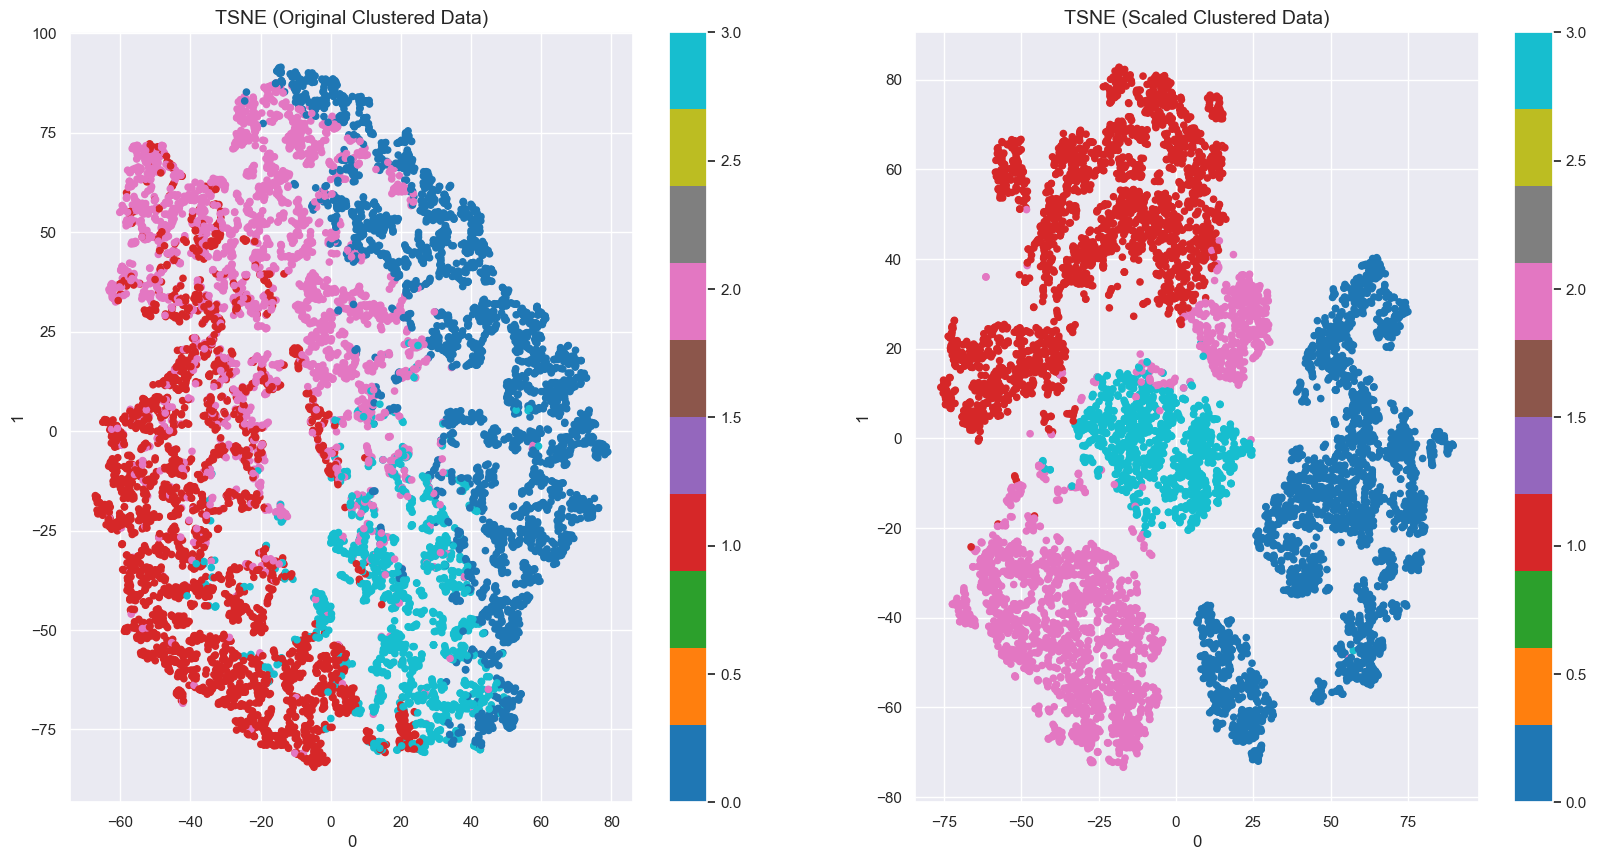

In [1231]:
from sklearn.manifold import TSNE

# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Cluster Visualization using t-SNE
original_clustered_data = TSNE(random_state=42).fit_transform(original_clustered_df)
scaled_clustered_data = TSNE(random_state=42).fit_transform(perspectives_clustered_df)

# t-SNE visualization
pd.DataFrame(original_clustered_data).plot.scatter(x=0, y=1, c=original_clustered_df['cluster'], colormap='tab10', ax=ax1)
pd.DataFrame(scaled_clustered_data).plot.scatter(x=0, y=1, c=perspectives_clustered_df['cluster'], colormap='tab10', ax=ax2)

# customizations
ax1.set_title("TSNE (Original Clustered Data)", fontsize=14)
ax2.set_title("TSNE (Scaled Clustered Data)", fontsize=14)

plt.savefig(os.path.join(figures_path, 'tsne.png'), dpi=200)
plt.show()

__Assess feature importance__

In [1244]:
original_clustered_df

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                    
1             2    2177.0           1         1      380.97        0.39   
3             1    2277.0           3         0      504.67        0.28   
4             3    1099.0           4         1      -16.99        0.99   
5             3    1763.0           4         1       35.23        0.90   
6             2    2566.0           4         1      -24.33        1.00   
...         ...       ...         ...       ...         ...         ...   
10290         3    3498.0           4         0      245.60        0.67   
10292         4    3188.0           2         0       -0.11        0.96   
10294         3    2918.0           1         1      524.10        0.21   
10295         1    1971.0           2         1      250.05        0.65   
10296         4    2815.0           1         1      463.75        0.27   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork  Age  \
CustID                                                                  
1          375.85          79.45      146.36     47.01     16.89   34   
3          206.15         224.50      124.58     86.35     99.02   46   
4          182.48          43.35      311.17     35.34     28.34   35   
5          338.62          47.80      182.59     18.78     41.45   43   
6          440.75          18.90      114.80      7.00      7.67   60   
...           ...            ...         ...       ...       ...  ...   
10290      227.82         270.60      160.92    100.13     69.90   73   
10292      393.74          49.45      173.81      9.78     14.78   67   
10294      403.63         132.80      142.25     12.67      4.89   40   
10295      188.59         211.15      198.37     63.90    112.91   39   
10296      414.08          94.45      141.25      6.89     12.89   35   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
1                 16        665.56      259.5684      405.9916   
3                 25        740.60      207.3680      533.2320   
4                 17        600.68      594.6732        6.0068   
5                 25        629.24      566.3160       62.9240   
6                 30        589.12      589.1200        0.0000   
...              ...           ...           ...           ...   
10290             30        829.37      555.6779      273.6921   
10292             32        641.56      615.8976       25.6624   
10294             22        696.24      146.2104      550.0296   
10295             21        774.92      503.6980      271.2220   
10296             17        669.56      180.7812      488.7788   

        AcquisitionCost  cluster  
CustID                            
1               25.0216        0  
3               28.5620        0  
4               22.9968        1  
5               27.6940        1  
6               24.3300        1  
...                 ...      ...  
10290           28.0921        2  
10292           25.7724        2  
10294           25.9296        0  
10295           21.1720        3  
10296           25.0288        0  

[8755 rows x 18 columns]

<a class="anchor" id="predictive-analysis">

### 6. Predictive Analysis
</a>

__Decision Tree__

In [1261]:
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Preparing the data
X = original_clustered_df.drop(columns=['cluster'])
y = original_clustered_df['cluster']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_dist = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12,None],
              "min_samples_split": sp_randint(3, 30),
              "min_samples_leaf": sp_randint(1, 40),
              "criterion": ["entropy", "gini"],
              "splitter": ["best", "random"]}

clf = DecisionTreeClassifier()
best_params = grid_search(clf, param_dist, X_train, y_train)

                                               params  accuracy  f1_score
37  {'criterion': 'gini', 'max_depth': 12, 'min_sa...  0.963306  0.937745
29  {'criterion': 'gini', 'max_depth': 7, 'min_sam...  0.961308  0.913699
20  {'criterion': 'entropy', 'max_depth': None, 'm...  0.959451  0.931645
14  {'criterion': 'gini', 'max_depth': 8, 'min_sam...  0.959165  0.737756
19  {'criterion': 'gini', 'max_depth': 7, 'min_sam...  0.958880  0.922086


In [1284]:
dt = DecisionTreeClassifier(**best_params)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 97.49% of the customers correctly


In [1287]:
# Print model report:
generate_classification_report(y_test, y_pred)

_______________________Begin Classification Report______________________
Confusion Matrix: 
[[530   0   6   6]
 [  0 529   3   1]
 [ 12   6 439   2]
 [  3   3   2 209]]
Metrics Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       542
           1       0.98      0.99      0.99       533
           2       0.98      0.96      0.97       459
           3       0.96      0.96      0.96       217

    accuracy                           0.97      1751
   macro avg       0.97      0.97      0.97      1751
weighted avg       0.97      0.97      0.97      1751

_______________________________END Report___________________________


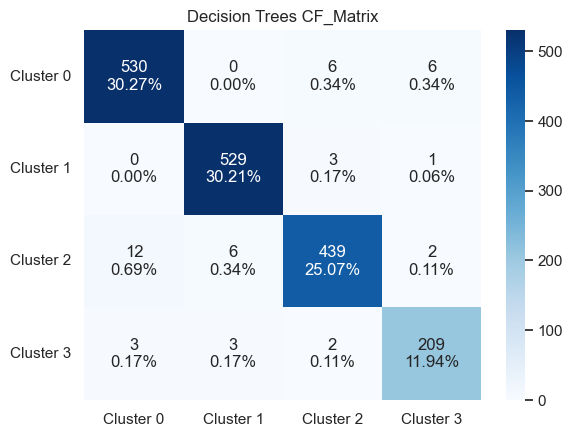

In [1310]:
# Plot Confusion Matrix
generate_confusion_matrix(confusion_matrix(y_test, y_pred), "Decision Trees")

In [1264]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

EducDeg            0.000000
MonthSal           0.003330
GeoLivArea         0.000000
Children           0.225210
CustMonVal         0.030003
ClaimsRate         0.365706
PremMotor          0.065179
PremHousehold      0.000528
PremHealth         0.009532
PremLife           0.000132
PremWork           0.003092
Age                0.114925
LoyaltyYears       0.000000
TotalPremium       0.000119
ClaimsAmount       0.000000
AnnualProfit       0.182242
AcquisitionCost    0.000000
dtype: float64

In [1263]:
# Predicting the cluster labels of the outliers
outliers_df['cluster'] = dt.predict(outliers_df)
outliers_df.head()

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                    
2             2     677.0         4.0       1.0     -131.13        1.12   
17            2    2437.0         1.0       1.0      100.58        0.89   
41            2    1177.0         4.0       1.0      121.36        0.84   
45            3    1065.0         1.0       1.0     -128.68        1.19   
52            3    3234.0         4.0       1.0   -14714.08       25.36   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork   Age  \
CustID                                                                   
2           77.46         416.20      116.69    194.48    106.13  21.0   
17         119.80         647.35      168.92    125.58     37.23  27.0   
41          52.01         455.65      135.47    146.36    148.03  21.0   
45         111.80           0.00      208.26    224.71     44.23  26.0   
52         557.44          20.00       29.56      5.00      0.00  50.0   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
2                3.0        910.96     1020.2752     -109.3152   
17               9.0       1098.88      978.0032      120.8768   
41               3.0        937.52      787.5168      150.0032   
45               8.0        589.00      700.9100     -111.9100   
52              32.0        612.00    15520.3200   -14908.3200   

        AcquisitionCost  cluster  
CustID                            
2               21.8148        1  
17              20.2968        3  
41              28.6432        3  
45              16.7700        1  
52            -194.2400        1

EducDeg  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                                     
2       0.382785 -0.511929    1.018625  0.737478    0.002893   -0.028308   
17      0.382785  0.248854   -1.342272  0.737478    0.039032   -0.052230   
41      0.382785 -0.295797    1.018625  0.737478    0.042273   -0.057430   
45      1.785329 -0.344211   -1.342272  0.737478    0.003275   -0.021028   
52      1.785329  0.593368    1.018625  0.737478   -2.271539    2.492827   
...          ...       ...         ...       ...         ...         ...   
10153  -1.019758 -0.048110   -1.342272  0.737478    0.069069   -0.081352   
10189  -1.019758 -0.386572    0.231659  0.737478    0.168316   -0.109434   
10217  -1.019758 -0.385276    1.018625  0.737478    0.164018   -0.107354   
10245  -1.019758 -0.243926   -1.342272  0.737478    0.108553   -0.102153   
10289   0.382785 -0.171305   -1.342272  0.737478    0.147361   -0.108394   

        PremMotor  PremHousehold  PremHealth  PremLife  PremWork       Age  \
CustID                                                                       
2       -0.123625      -0.149424   -0.082554  1.006313 -0.058350 -0.831488   
17      -0.046731       0.098902   -0.027775  0.129265 -0.720304 -0.506082   
41      -0.169845      -0.107043   -0.062858  0.393780  0.344202 -0.831488   
45      -0.061260      -0.596550    0.013484  1.391120 -0.653052 -0.560316   
52       0.748067      -0.575064   -0.173935 -1.405633 -1.077990  0.741311   
...           ...            ...         ...       ...       ...       ...   
10153   -0.027354      -0.305252   -0.094678  1.978194 -0.623173  0.090497   
10189   -0.228977       0.569287   -0.117521 -0.631819  0.809683 -0.723019   
10217   -0.193055       0.553172   -0.104002  0.853562 -0.472624 -0.885723   
10245   -0.189622      -0.084966   -0.031037  0.993584 -0.133096 -0.777254   
10289   -0.141187       0.284542   -0.097824  0.853562 -0.247329 -0.723019   

        LoyaltyYears  TotalPremium  ClaimsAmount  AnnualProfit  \
CustID                                                           
2          -0.919587     -0.148274     -0.035395      0.002729   
17         -0.395967     -0.017393     -0.041889      0.038566   
41         -0.919587     -0.129776     -0.071149      0.043100   
45         -0.483237     -0.372511     -0.084452      0.002326   
52          1.611242     -0.356492      2.191934     -2.301183   
...              ...           ...           ...           ...   
10153       0.389463     -0.208199     -0.114822      0.069833   
10189      -0.745047      0.227341     -0.116375      0.168761   
10217      -1.006857      0.227961     -0.111870      0.164335   
10245      -0.832317     -0.103700     -0.130716      0.109299   
10289      -0.745047      0.094134     -0.124430      0.147150   

        AcquisitionCost  
CustID                   
2             -0.017691  
17            -0.044064  
41             0.100942  
45            -0.105337  
52            -3.771325  
...                 ...  
10153          0.099302  
10189          0.084003  
10217          0.068787  
10245          0.105341  
10289          0.006488  

[1865 rows x 17 columns]

Defining classification labels


Customer monthly value: The average customer monthly value of the customers in the different clusters could potentially be indicative of their loyalty to the insurance company and the value they place on their insurance coverage. This information could be useful for understanding the value of different customer segments to the company and for identifying opportunities for cross-selling or upselling additional insurance products.

__Results Interruption__

<div class="alert alert-block alert-info">

<b>Follow Up action !</b>

We can consider several follow-up actions after modeling and evaluation steps.

- Analyze the characteristics of each cluster by calculating summary statistics for each cluster.
- Investigate the cluster labels by examining the cluster labels and trying to understand what they represent.
    - Patterns and trends
    - Customer segments
- Incorporate the results of the clustering analysis into our business or research.
    - Implications
    - Further analysis
</div>

@TODO Reintroducing the Outliers or New Observations
@TODO Going from clustering into classification
@TODO Cluster analysis -> Partitioning Methods (kmeans and k-meadoids)
@TODO profiling clusters -> size part-to-whole mini-pie charts
@TODO profiling clusters -> Profiling (comparing variables not used)
Consolidation of two solutions
assocation rules